<a href="https://colab.research.google.com/github/algotraders8055-bot/Algo_Trading_Breakout/blob/main/Data_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data download


In [1]:
# @title
!pip install kiteconnect pandas_market_calendars
from google.colab import drive
drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: toolz
    Found existing installation: toolz 0.12.1
    Uninstalling toolz-0.12.1:
      Successfully uninstalled toolz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source 

In [3]:
# @title
!pip install kiteconnect pandas pandas_market_calendars

In [ ]:
'''import os
import time
import pandas as pd
from datetime import datetime
from kiteconnect import KiteConnect
import pandas_market_calendars as mcal

# =========================
# 🔑 KITE API CONFIGURATION
# =========================
api_key = "54gdd7un96eoq38q"
access_token = "kDkEToPCE5GkBXruT2NOs7WpGK1PLtfi"   # your valid token

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# =========================
# 📄 LOAD STOCK LIST
# =========================
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()

# =========================
# 🎯 GET INSTRUMENT TOKENS
# =========================
print("Fetching instrument list from Kite...")
instruments_df = pd.DataFrame(kite.instruments("NSE"))
selected = instruments_df[instruments_df["tradingsymbol"].isin(symbols)]
print(f"✅ Found {len(selected)} tradable symbols in Kite instrument list")

instruments = selected.to_dict('records')

# =========================
# 🗓️ SET DATE RANGE
# =========================
start_date = "2025-10-27"
end_date   = "2025-10-27"

nse = mcal.get_calendar('NSE')
schedule = nse.schedule(start_date=start_date, end_date=end_date)
dates = schedule.index.strftime("%Y-%m-%d")

# =========================
# 💾 OUTPUT FOLDER (GOOGLE DRIVE)
# =========================
base_path = "/content/drive/MyDrive/kite_1min_data"   # ✅ Save inside Google Drive
os.makedirs(base_path, exist_ok=True)

# =========================
# ⚙️ FETCH & SAVE FUNCTION
# =========================
def fetch_and_save_1min(symbol, token, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)
    file_path = f"{folder}/{symbol}_{date_str}.csv"

    # Skip if already downloaded
    if os.path.exists(file_path):
        print(f"⏭️ Skipping {symbol} ({date_str}) — already exists")
        return

    try:
        candles = kite.historical_data(
            instrument_token=token,
            from_date=date_str,
            to_date=date_str,
            interval="minute"
        )
        if candles:
            df = pd.DataFrame(candles)
            df.to_csv(file_path, index=False)
            #print(f"✅ Saved {symbol} — {date_str}")
        else:
            print(f"⚠️ No data for {symbol} — {date_str}")
    except Exception as e:
        print(f"❌ Error fetching {symbol} — {e}")

# =========================
# 🚀 MAIN DOWNLOAD LOOP
# =========================
start_time = time.time()

for date_str in dates:
    print(f"\n📅 Fetching data for {date_str}")
    for s in instruments:
        fetch_and_save_1min(s['tradingsymbol'], s['instrument_token'], date_str)
        time.sleep(0.35)  # 3 req/sec safe limit

print(f"\n✅ Completed all downloads.")
print(f"⏱️ Total time: {round((time.time() - start_time)/60, 2)} minutes")
'''

'import os\nimport time\nimport pandas as pd\nfrom datetime import datetime\nfrom kiteconnect import KiteConnect\nimport pandas_market_calendars as mcal\n\n# =========================\n# 🔑 KITE API CONFIGURATION\n# =========================\napi_key = "54gdd7un96eoq38q"\naccess_token = "kDkEToPCE5GkBXruT2NOs7WpGK1PLtfi"   # your valid token\n\nkite = KiteConnect(api_key=api_key)\nkite.set_access_token(access_token)\n\n# =========================\n# 📄 LOAD STOCK LIST\n# =========================\ndf = pd.read_csv("/content/stocks_above_6kcr.csv")\ndf = df[df[" SERIES"].str.strip() == "EQ"]\nsymbols = df["SYMBOL"].str.strip().tolist()\n\n# =========================\n# 🎯 GET INSTRUMENT TOKENS\n# =========================\nprint("Fetching instrument list from Kite...")\ninstruments_df = pd.DataFrame(kite.instruments("NSE"))\nselected = instruments_df[instruments_df["tradingsymbol"].isin(symbols)]\nprint(f"✅ Found {len(selected)} tradable symbols in Kite instrument list")\n\ninstruments = s

In [3]:
import os
import time
import pandas as pd
from datetime import datetime
from kiteconnect import KiteConnect
import pandas_market_calendars as mcal

# =========================
# 🔑 KITE API CONFIGURATION
# =========================
api_key = "54gdd7un96eoq38q"
access_token = "pRd6rFenPyb4MAwoiFhueHG7HQeKl5WP"

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# =========================
# 📄 LOAD STOCK LIST
# =========================
df = pd.read_csv("/content/stocks_above_1kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()

# =========================
# 🎯 GET INSTRUMENT TOKENS
# =========================
print("Fetching instrument list from Kite...")
instruments_df = pd.DataFrame(kite.instruments("NSE"))
selected = instruments_df[instruments_df["tradingsymbol"].isin(symbols)]
print(f"✅ Found {len(selected)} tradable symbols in Kite instrument list")

instruments = selected.to_dict('records')

# =========================
# 🗓️ GET ALL TRADING DAYS FOR RANGE
# =========================
# Define your “from” and “to” dates
from_date = "2025-12-26"
to_date   = "2025-12-26"

nse = mcal.get_calendar('NSE')
schedule = nse.schedule(start_date=from_date, end_date=to_date)

# schedule.index gives the actual trading days
trading_days = schedule.index.strftime("%Y-%m-%d").tolist()
print("Trading days in the range:", trading_days)

# =========================
# 💾 OUTPUT FOLDER (GOOGLE DRIVE)
# =========================
base_path = "/content/drive/MyDrive/kite_1min_data"  # because drive is mounted
os.makedirs(base_path, exist_ok=True)

# =========================
# ⚙️ FETCH & SAVE FUNCTION
# =========================
def fetch_and_save_1min(symbol, token, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)
    file_path = f"{folder}/{symbol}_{date_str}.csv"

    if os.path.exists(file_path):
        print(f"⏭️ Skipping {symbol} ({date_str}) — already exists")
        return

    try:
        candles = kite.historical_data(
            instrument_token=token,
            from_date=date_str,
            to_date=date_str,
            interval="minute"
        )
        if candles:
            df2 = pd.DataFrame(candles)
            df2.to_csv(file_path, index=False)
            #print(f"✅ Saved {symbol} — {date_str}")
        else:
            print(f"⚠️ No data for {symbol} — {date_str}")
    except Exception as e:
        print(f"❌ Error fetching {symbol} on {date_str} — {e}")

# =========================
# 🚀 MAIN DOWNLOAD LOOP (ONLY ON TRADING DAYS)
# =========================
start_time = time.time()

for date_str in trading_days:
    print(f"\n📅 Fetching data for trading day {date_str}")
    for s in instruments:
        fetch_and_save_1min(s['tradingsymbol'], s['instrument_token'], date_str)
        time.sleep(0.35)  # rate-limit

print(f"\n✅ Completed all downloads.")
print(f"⏱️ Total time: {round((time.time() - start_time)/60, 2)} minutes")


Fetching instrument list from Kite...
✅ Found 1238 tradable symbols in Kite instrument list
Trading days in the range: ['2025-12-26']

📅 Fetching data for trading day 2025-12-26

✅ Completed all downloads.
⏱️ Total time: 13.08 minutes


In [ ]:
import os
import time
import pandas as pd
from datetime import datetime
from kiteconnect import KiteConnect
import pandas_market_calendars as mcal

# =========================
# 🔑 KITE API CONFIGURATION
# =========================
api_key = "54gdd7un96eoq38q"
access_token = "pRd6rFenPyb4MAwoiFhueHG7HQeKl5WP"

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# =========================
# 📄 LOAD STOCK LIST
# =========================
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()

# =========================
# 🎯 GET INSTRUMENT TOKENS
# =========================
print("Fetching instrument list from Kite...")
instruments_df = pd.DataFrame(kite.instruments("NSE"))
selected = instruments_df[instruments_df["tradingsymbol"].isin(symbols)]
print(f"✅ Found {len(selected)} tradable symbols in Kite instrument list")

instruments = selected.to_dict('records')

# =========================
# 🗓️ GET ALL TRADING DAYS FOR RANGE
# =========================
# Define your “from” and “to” dates
from_date = "2025-12-26"
to_date   = "2025-12-26"

nse = mcal.get_calendar('NSE')
schedule = nse.schedule(start_date=from_date, end_date=to_date)

# schedule.index gives the actual trading days
trading_days = schedule.index.strftime("%Y-%m-%d").tolist()
print("Trading days in the range:", trading_days)

# =========================
# 💾 OUTPUT FOLDER (GOOGLE DRIVE)
# =========================
base_path = "/content/drive/MyDrive/kite_1min_data"  # because drive is mounted
os.makedirs(base_path, exist_ok=True)

# =========================
# ⚙️ FETCH & SAVE FUNCTION
# =========================
def fetch_and_save_1min(symbol, token, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)
    file_path = f"{folder}/{symbol}_{date_str}.csv"

    if os.path.exists(file_path):
        print(f"⏭️ Skipping {symbol} ({date_str}) — already exists")
        return

    try:
        candles = kite.historical_data(
            instrument_token=token,
            from_date=date_str,
            to_date=date_str,
            interval="minute"
        )
        if candles:
            df2 = pd.DataFrame(candles)
            df2.to_csv(file_path, index=False)
            #print(f"✅ Saved {symbol} — {date_str}")
        else:
            print(f"⚠️ No data for {symbol} — {date_str}")
    except Exception as e:
        print(f"❌ Error fetching {symbol} on {date_str} — {e}")

# =========================
# 🚀 MAIN DOWNLOAD LOOP (ONLY ON TRADING DAYS)
# =========================
start_time = time.time()

for date_str in trading_days:
    print(f"\n📅 Fetching data for trading day {date_str}")
    for s in instruments:
        fetch_and_save_1min(s['tradingsymbol'], s['instrument_token'], date_str)
        time.sleep(0.35)  # rate-limit

print(f"\n✅ Completed all downloads.")
print(f"⏱️ Total time: {round((time.time() - start_time)/60, 2)} minutes")

Fetching instrument list from Kite...
✅ Found 673 tradable symbols in Kite instrument list
Trading days in the range: ['2025-12-26']

📅 Fetching data for trading day 2025-12-26


In [ ]:
import os
import shutil
from datetime import datetime

# Path to your downloaded data
base_path = "/content/drive/MyDrive/kite_1min_data"

# Iterate through all folders inside kite_1min_data
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        try:
            # Parse folder name (expects YYYY-MM-DD)
            date_obj = datetime.strptime(folder, "%Y-%m-%d")
            month_name = date_obj.strftime("%B")  # e.g. "April"

            # Destination folder (e.g. "May")
            dest_folder = os.path.join(base_path, month_name)
            os.makedirs(dest_folder, exist_ok=True)

            # Move the folder
            shutil.move(folder_path, os.path.join(dest_folder, folder))
            print(f"✅ Moved {folder} → {month_name}/")
        except ValueError:
            # Skip non-date folders (like "May" itself)
            print(f"⏭️ Skipping non-date folder: {folder}")

print("\n✅ All folders organized by month!")


✅ Moved 2025-09-09 → September/
✅ Moved 2025-09-10 → September/
✅ Moved 2025-09-16 → September/
✅ Moved 2025-09-17 → September/
✅ Moved 2025-09-23 → September/
✅ Moved 2025-09-29 → September/
✅ Moved 2025-09-30 → September/
✅ Moved 2025-08-01 → August/
✅ Moved 2025-08-04 → August/
✅ Moved 2025-08-05 → August/
✅ Moved 2025-08-06 → August/
✅ Moved 2025-08-07 → August/
✅ Moved 2025-08-08 → August/
✅ Moved 2025-08-11 → August/
✅ Moved 2025-08-12 → August/
✅ Moved 2025-08-13 → August/
✅ Moved 2025-08-14 → August/
✅ Moved 2025-08-18 → August/
✅ Moved 2025-08-19 → August/
✅ Moved 2025-08-20 → August/
✅ Moved 2025-08-21 → August/
✅ Moved 2025-08-22 → August/
✅ Moved 2025-08-25 → August/
✅ Moved 2025-08-26 → August/
✅ Moved 2025-08-28 → August/
✅ Moved 2025-08-29 → August/
✅ Moved 2025-07-01 → July/
✅ Moved 2025-07-02 → July/
✅ Moved 2025-07-03 → July/
✅ Moved 2025-07-04 → July/
✅ Moved 2025-07-07 → July/
✅ Moved 2025-07-08 → July/
✅ Moved 2025-07-09 → July/
✅ Moved 2025-07-10 → July/
✅ Moved 2

In [ ]:
import pandas_market_calendars as mcal

# Define NSE (National Stock Exchange of India) calendar
nse = mcal.get_calendar('NSE')

# Get the trading schedule for 2025
schedule = nse.schedule(start_date='2025-01-01', end_date='2025-12-31')

# Convert index to list of strings (dates)
trading_days = [str(d.date()) for d in schedule.index]

print(trading_days)
print(f"\nTotal trading days in 2025: {len(trading_days)}")



In [ ]:
file_path = "/content/nifty 2025 till oct dates.csv"  # change this to your actual path
pd.read_csv(file_path)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-OCT-2025,25863.80,25953.75,25711.20,25722.10,334384400,28788.40
1,30-OCT-2025,25984.40,26032.05,25845.25,25877.85,257373001,24180.46
2,29-OCT-2025,25982.00,26097.85,25960.30,26053.90,321880610,26309.32
3,28-OCT-2025,25939.95,26041.70,25810.05,25936.20,395231207,37023.32
4,27-OCT-2025,25843.20,26005.95,25827.00,25966.05,266337274,23989.06
...,...,...,...,...,...,...,...
203,07-JAN-2025,23679.90,23795.20,23637.80,23707.90,262337253,22485.65
204,06-JAN-2025,24045.80,24089.95,23551.90,23616.05,278061806,25853.64
205,03-JAN-2025,24196.40,24196.45,23976.00,24004.75,312279515,29411.99
206,02-JAN-2025,23783.00,24226.70,23751.55,24188.65,283200811,32237.25


In [ ]:
import pandas as pd

file_path = "/content/nifty 2025 till oct dates.csv"

# Read CSV
df = pd.read_csv(file_path)

# Check what the actual column names are
print("Column names:", df.columns.tolist())

# Then try:
date_col = [col for col in df.columns if "date" in col.lower()][0]

# Convert to dd-mm-yyyy
df[date_col] = pd.to_datetime(df[date_col], format="%d-%b-%Y").dt.strftime("%Y-%m-%d")

# Convert to list
date_list = df[date_col].tolist()

# (Optional) Reverse chronological order
# date_list = date_list[::-1]

print(date_list[:10])
print(f"\n✅ Total trading days: {len(date_list)}")


Column names: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']
['2025-10-31', '2025-10-30', '2025-10-29', '2025-10-28', '2025-10-27', '2025-10-24', '2025-10-23', '2025-10-21', '2025-10-20', '2025-10-17']

✅ Total trading days: 208


In [ ]:
#a=['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-28', '2025-04-29', '2025-04-30', '2025-05-01', '2025-05-02', '2025-05-05', '2025-05-06', '2025-05-07', '2025-05-08', '2025-05-09', '2025-05-12', '2025-05-13', '2025-05-14', '2025-05-15', '2025-05-16', '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23', '2025-05-26', '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30', '2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05', '2025-06-06', '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20', '2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17', '2025-07-18', '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-04', '2025-08-05', '2025-08-06', '2025-08-07', '2025-08-08', '2025-08-11', '2025-08-12', '2025-08-13', '2025-08-14', '2025-08-15', '2025-08-18', '2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22', '2025-08-25', '2025-08-26', '2025-08-27', '2025-08-28', '2025-08-29', '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-15', '2025-09-16', '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26', '2025-09-29', '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-03', '2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-10', '2025-11-11', '2025-11-12', '2025-11-13', '2025-11-14', '2025-11-17', '2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21', '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27', '2025-11-28', '2025-12-01', '2025-12-02', '2025-12-03', '2025-12-04', '2025-12-05', '2025-12-08', '2025-12-09', '2025-12-10', '2025-12-11', '2025-12-12', '2025-12-15', '2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19', '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26', '2025-12-29', '2025-12-30', '2025-12-31']


In [ ]:
date_list.sort()
date_list

['2025-01-01',
 '2025-01-02',
 '2025-01-03',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-20',
 '2025-01-21',
 '2025-01-22',
 '2025-01-23',
 '2025-01-24',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29',
 '2025-01-30',
 '2025-01-31',
 '2025-02-01',
 '2025-02-03',
 '2025-02-04',
 '2025-02-05',
 '2025-02-06',
 '2025-02-07',
 '2025-02-10',
 '2025-02-11',
 '2025-02-12',
 '2025-02-13',
 '2025-02-14',
 '2025-02-17',
 '2025-02-18',
 '2025-02-19',
 '2025-02-20',
 '2025-02-21',
 '2025-02-24',
 '2025-02-25',
 '2025-02-27',
 '2025-02-28',
 '2025-03-03',
 '2025-03-04',
 '2025-03-05',
 '2025-03-06',
 '2025-03-07',
 '2025-03-10',
 '2025-03-11',
 '2025-03-12',
 '2025-03-13',
 '2025-03-17',
 '2025-03-18',
 '2025-03-19',
 '2025-03-20',
 '2025-03-21',
 '2025-03-24',
 '2025-03-25',
 '2025-03-26',
 '2025-03-27',
 '2025-03-28',
 '2025-04-01',
 '2025-04-02',
 '2025-04-03',
 '2025-04-04',
 '2025-04-

In [ ]:
import os
base_path = "/content/drive/MyDrive/kite_1min_data"

# ✅ Get all folder names in that directory
existing_folders = [
    name for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name))
]

# ✅ Compare
existing_set = set(existing_folders)
date_set = set(date_list)

missing = sorted(list(date_set - existing_set))
extra = sorted(list(existing_set - date_set))

print(f"✅ Found {len(existing_set & date_set)} matching folders.")
print(f"❌ Missing ({len(missing)}): {missing}")
print(f"⚠️ Extra ({len(extra)}): {extra}")


✅ Found 208 matching folders.
❌ Missing (0): []
⚠️ Extra (0): []


In [ ]:
import os
import shutil
base_path = "/content/drive/MyDrive/kite_1min_data"

# ✅ Get all folder names in that directory
existing_folders = [
    name for name in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, name))
]

# ✅ Identify extra folders
extra_folders = sorted(list(set(existing_folders) - set(date_list)))

print(f"⚠️ Found {len(extra_folders)} extra folders.")
print(extra_folders)

# ✅ Delete confirmation (safety)
for folder in extra_folders:
    folder_path = os.path.join(base_path, folder)
    print(f"🗑️ Deleting: {folder_path}")
    shutil.rmtree(folder_path)

print("✅ Cleanup complete.")


⚠️ Found 12 extra folders.
['2025-02-26', '2025-03-14', '2025-03-31', '2025-04-10', '2025-04-14', '2025-04-18', '2025-05-01', '2025-08-15', '2025-08-27', '2025-10-02', '2025-10-22', 'Sept']
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-02-26
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-03-14
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-03-31
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-04-10
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-04-14
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-04-18
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-05-01
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-08-15
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-08-27
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-10-02
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/2025-10-22
🗑️ Deleting: /content/drive/MyDrive/kite_1min_data/Sept
✅ Cleanup complete.


In [ ]:
import os
import time
import pandas as pd
from kiteconnect import KiteConnect

# =========================
# 🔑 KITE API CONFIGURATION
# =========================
api_key = "54gdd7un96eoq38q"
access_token = "29UO1Fku7WXrXmz2pNPqWaRpVGAgfR6d"

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# =========================
# 📄 LOAD STOCK LIST
# =========================
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()

# =========================
# 🎯 GET INSTRUMENT TOKENS
# =========================
print("Fetching instrument list from Kite...")
instruments_df = pd.DataFrame(kite.instruments("NSE"))
selected = instruments_df[instruments_df["tradingsymbol"].isin(symbols)]
print(f"✅ Found {len(selected)} tradable symbols in Kite instrument list")

instruments = selected.to_dict('records')

# =========================
# 📅 CUSTOM LIST OF DATES
# =========================
# 👇 Replace with your own trading date list (YYYY-MM-DD)
trading_days = ['2025-02-01', '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-11', '2025-09-12', '2025-09-18', '2025-09-19', '2025-09-24', '2025-09-25', '2025-09-26', '2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31']
print(f"📅 Total trading days provided: {len(trading_days)}")

# =========================
# 💾 OUTPUT FOLDER (GOOGLE DRIVE)
# =========================
base_path = "/content/drive/MyDrive/kite_1min_data"
os.makedirs(base_path, exist_ok=True)

# =========================
# ⚙️ FETCH & SAVE FUNCTION
# =========================
def fetch_and_save_1min(symbol, token, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)
    file_path = f"{folder}/{symbol}_{date_str}.csv"

    # Skip if already downloaded
    if os.path.exists(file_path):
        print(f"⏭️ Skipping {symbol} ({date_str}) — already exists")
        return

    try:
        candles = kite.historical_data(
            instrument_token=token,
            from_date=date_str,
            to_date=date_str,
            interval="minute"
        )
        if candles:
            df2 = pd.DataFrame(candles)
            df2.to_csv(file_path, index=False)
            #print(f"✅ Saved {symbol} — {date_str}")
        else:
            print(f"⚠️ No data for {symbol} — {date_str}")
    except Exception as e:
        print(f"❌ Error fetching {symbol} on {date_str} — {e}")

# =========================
# 🚀 MAIN DOWNLOAD LOOP (ONLY SPECIFIED DATES)
# =========================
start_time = time.time()

for date_str in trading_days:
    print(f"\n📅 Fetching data for {date_str}")
    for s in instruments:
        fetch_and_save_1min(s['tradingsymbol'], s['instrument_token'], date_str)
        time.sleep(0.35)  # respect rate limit

print(f"\n✅ Completed all downloads.")
print(f"⏱️ Total time: {round((time.time() - start_time)/60, 2)} minutes")


Fetching instrument list from Kite...
✅ Found 670 tradable symbols in Kite instrument list
📅 Total trading days provided: 17

📅 Fetching data for 2025-02-01
⚠️ No data for BEML — 2025-02-01
⚠️ No data for AGARWALEYE — 2025-02-01
⚠️ No data for AJAXENGG — 2025-02-01
⚠️ No data for HEXT — 2025-02-01
⚠️ No data for WAAREERTL — 2025-02-01
⚠️ No data for OSWALPUMPS — 2025-02-01
⚠️ No data for THELEELA — 2025-02-01
⚠️ No data for BELRISE — 2025-02-01
⚠️ No data for AEGISVOPAK — 2025-02-01
⚠️ No data for ATHERENERG — 2025-02-01

📅 Fetching data for 2025-09-01
⚠️ No data for BEML — 2025-09-01

📅 Fetching data for 2025-09-02
⚠️ No data for BEML — 2025-09-02

📅 Fetching data for 2025-09-03
⚠️ No data for BEML — 2025-09-03

📅 Fetching data for 2025-09-04
⚠️ No data for BEML — 2025-09-04

📅 Fetching data for 2025-09-05
⚠️ No data for BEML — 2025-09-05

📅 Fetching data for 2025-09-11
⚠️ No data for BEML — 2025-09-11

📅 Fetching data for 2025-09-12
⚠️ No data for BEML — 2025-09-12

📅 Fetching data f

In [ ]:
['2025-02-01', '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-11', '2025-09-12', '2025-09-18', '2025-09-19', '2025-09-24', '2025-09-25', '2025-09-26', '2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31']

In [ ]:
import pandas as pd
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()
symbols
fyers_symbols_filtered = [f"NSE:{sym}-EQ" for sym in symbols]
print(fyers_symbols_filtered[:10])

['NSE:TVSSCS-EQ', 'NSE:BANSALWIRE-EQ', 'NSE:PILANIINVS-EQ', 'NSE:GULFOILLUB-EQ', 'NSE:GREENLAM-EQ', 'NSE:SUBROS-EQ', 'NSE:EMUDHRA-EQ', 'NSE:JKPAPER-EQ', 'NSE:KNRCON-EQ', 'NSE:RESPONIND-EQ']


# backtesting

In [3]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
#months = ["April2024","May2024"]
months=["temp_folder"]
base_root = "/content/drive/MyDrive/kite_1min_data"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075 #
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    # Normalize column names
    df.columns = [c.lower() for c in df.columns]
    required_cols = {'date','open','high','low','close','volume'}
    if not required_cols.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # 5-min resample
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():
        # Stop checking after 15:15
        if row.name.time() >= exit_cutoff:
            final_price = row['close']
            return row.name, final_price, ((final_price - entry_price) / entry_price) * 100, '15:15 Exit'

        # SL Hit BEFORE 15:15
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    # If no SL hit & no candle at/after 15:15
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'


def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                        symbol_key = symbol.split('_')[0]

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason
                        })
                        return trades
    return trades


# === RUN FOR JANUARY → JULY ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []
        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        # Daily summary
        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)
        date_key = f"{month}-{date_folder}"

        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades
        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")


# === SUMMARY ===
print("\n📊 SUMMARY (January → July):")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")


📆 Running for Month: temp_folder
📅 temp_folder-2025-12-24 — Trades: 5, Return: -1.64%

📊 SUMMARY (January → July):
🗓️ temp_folder: Trades = 5, Return = -1.64%

💼 Final Portfolio Value: ₹98360.0


In [4]:
df1 = pd.DataFrame(daily_trades)
df1

,date,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason
0,2025-12-24,GALAXYSURF_2025-12-24,2025-12-24 13:00:00+05:30,2048.89,2025-12-24 15:15:00+05:30,2070.00,1.03,15:15 Exit
1,2025-12-24,SUNDARMFIN_2025-12-24,2025-12-24 14:05:00+05:30,5171.00,2025-12-24 15:15:00+05:30,5175.10,0.08,15:15 Exit
2,2025-12-24,CAMPUS_2025-12-24,2025-12-24 11:55:00+05:30,262.04,2025-12-24 15:15:00+05:30,260.75,-0.49,15:15 Exit
3,2025-12-24,RESPONIND_2025-12-24,2025-12-24 12:40:00+05:30,202.19,2025-12-24 15:15:00+05:30,200.61,-0.78,15:15 Exit
4,2025-12-24,IXIGO_2025-12-24,2025-12-24 14:15:00+05:30,267.45,2025-12-24 15:15:00+05:30,263.50,-1.48,15:15 Exit


In [5]:
# EMA FOR MONTHS — STRICT VERSION (FULL TRADEBOOK)

import os
import pandas as pd
import numpy as np
from collections import defaultdict

# ================= CONFIG =================
months = ["temp_folder"]
#months = ["July2025","August2025","September2025","October2025","Nov2025"]

base_root = "/content/drive/MyDrive/kite_1min_data"

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# ================= LOAD MARKET CAP =================
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# ================= DATA LOADER =================
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)

    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    req = {'date','open','high','low','close','volume'}
    if not req.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    return (
        df.resample('5min')
          .agg({
              'open':'first',
              'high':'max',
              'low':'min',
              'close':'last',
              'volume':'sum'
          })
          .dropna()
    )

# ================= EXIT LOGIC =================
def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():
        if row.name.time() >= exit_cutoff:
            price = row['close']
            return row.name, price, ((price-entry_price)/entry_price)*100, '15:15 Exit'

        if row['low'] <= sl:
            return row.name, sl, ((sl-entry_price)/entry_price)*100, 'SL Hit'

    price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], price, ((price-entry_price)/entry_price)*100, 'End of Day Exit'

# ================= STRATEGY =================
def dynamic_range_breakout(df, symbol, date):
    trades = []

    if df.empty or len(df) < window_size + 10:
        return trades

    # EMA calculation
    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i+window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        if r_width >= max_range_pct:
            continue

        breakout = df.iloc[i+window_size]

        # Time filter
        if breakout.name.time() > pd.to_datetime("14:30").time():
            continue

        # STRICT EMA FILTER
        if breakout['ema20'] <= breakout['ema50']:
            continue

        body = breakout['close'] - breakout['open']
        if body <= 0:
            continue

        upper_wick = breakout['high'] - breakout['close']
        if upper_wick > 0.4 * abs(body):
            continue

        body_pct = body / breakout['open']
        mean_vol = range_df['volume'].mean()

        if (
            breakout['high'] > r_high and
            body_pct >= min_body_pct and
            breakout['volume'] > volume_multiplier * mean_vol
        ):
            target_price = r_high * (1 + confirmation_breakout_pct)
            candles_after = df.iloc[i+window_size+1:]

            for j in range(len(candles_after)):
                row = candles_after.iloc[j]

                if row.name.time() > pd.to_datetime("14:30").time():
                    break

                if row['high'] >= target_price:
                    entry_price = target_price
                    sl = entry_price * 0.99

                    remaining = candles_after.iloc[j+1:]
                    if remaining.empty:
                        break

                    exit_time, exit_price, pnl, reason = simulate_exit(
                        entry_price, sl, remaining
                    )

                    trades.append({
                        'date': date,
                        'symbol': symbol,
                        'entry_time': row.name,
                        'entry_price': round(entry_price,2),
                        'ema20_entry': round(breakout['ema20'],2),   # ✅ EMA20
                        'ema50_entry': round(breakout['ema50'],2),   # ✅ EMA50
                        'exit_time': exit_time,
                        'exit_price': round(exit_price,2),
                        'pnl_%': round(pnl,2),
                        'reason': reason
                    })

                    return trades   # ONE TRADE / SYMBOL / DAY

    return trades

# ================= MAIN LOOP =================
portfolio_value = 100000

all_trades = []   # 🔥 MASTER TRADEBOOK

monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            df = load_and_resample_5min(os.path.join(date_path, file))
            if df.empty:
                continue

            daily_trades.extend(
                dynamic_range_breakout(
                    df,
                    file.replace(".csv",""),
                    date_folder
                )
            )

        if daily_trades:
            all_trades.extend(daily_trades)   # ✅ STORE ALL TRADES
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return/100)

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# ================= SUMMARY =================
print("\n📊 SUMMARY:")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value,2)}")

# ================= FULL TRADEBOOK =================
if all_trades:
    trades_df = pd.DataFrame(all_trades).sort_values('entry_time')
    print("\n📒 FULL TRADEBOOK:")
    print(trades_df)
    #trades_df.to_csv("/content/full_tradebook.csv", index=False)
else:
    print("\n⚠️ No trades generated.")



📆 Running for Month: temp_folder
📅 temp_folder-2025-12-24 — Trades: 2, Return: 1.11%

📊 SUMMARY:
🗓️ temp_folder: Trades = 2, Return = 1.11%

💼 Final Portfolio Value: ₹101110.0

📒 FULL TRADEBOOK:
         date                 symbol                entry_time  entry_price  \
0  2025-12-24  GALAXYSURF_2025-12-24 2025-12-24 13:00:00+05:30      2048.89   
1  2025-12-24  SUNDARMFIN_2025-12-24 2025-12-24 14:05:00+05:30      5171.00   

   ema20_entry  ema50_entry                 exit_time  exit_price  pnl_%  \
0      2025.97      2025.24 2025-12-24 15:15:00+05:30      2070.0   1.03   
1      5088.79      5082.03 2025-12-24 15:15:00+05:30      5175.1   0.08   

       reason  
0  15:15 Exit  
1  15:15 Exit  


In [6]:
dfema = pd.DataFrame(all_trades)
dfema

,date,symbol,entry_time,entry_price,ema20_entry,ema50_entry,exit_time,exit_price,pnl_%,reason
0,2025-12-24,GALAXYSURF_2025-12-24,2025-12-24 13:00:00+05:30,2048.89,2025.97,2025.24,2025-12-24 15:15:00+05:30,2070.0,1.03,15:15 Exit
1,2025-12-24,SUNDARMFIN_2025-12-24,2025-12-24 14:05:00+05:30,5171.00,5088.79,5082.03,2025-12-24 15:15:00+05:30,5175.1,0.08,15:15 Exit


In [7]:
# EMA FOR MONTHS

####### NOTING THE EMA VALUES

import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
months = ["temp_folder"]
#months = ["June2024","July2024","August2024"]
base_root = "/content/drive/MyDrive/kite_1min_data"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min


def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():
        if row.name.time() >= exit_cutoff:
            final_price = row['close']
            return row.name, final_price, ((final_price - entry_price) / entry_price) * 100, '15:15 Exit'

        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'



def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    # === EMA Trend Filter ===
    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    if df['ema20'].iloc[-1] <= df['ema50'].iloc[-1]:
        return trades

    # === Breakout Logic ===
    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:

            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    if row['high'] >= target_entry_price:

                        entry_price = target_entry_price
                        sl = entry_price * 0.99

                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break

                        exit_time, exit_price, pnl_pct, reason = simulate_exit(
                            entry_price, sl, remaining_candles
                        )

                        # ================================
                        # 🔥 NEW: Store EMA20 & EMA50 at entry
                        # ================================
                        ema20_entry = row['ema20']
                        ema50_entry = row['ema50']

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason,
                            'ema20_at_entry': round(ema20_entry, 2),
                            'ema50_at_entry': round(ema50_entry, 2)
                        })

                        return trades

    return trades

### split the amt and check the new code

# === MAIN LOOP ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)

        date_key = f"{month}-{date_folder}"
        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")


# === SUMMARY ===
print("\n📊 SUMMARY:")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")



📆 Running for Month: temp_folder
📅 temp_folder-2025-12-24 — Trades: 5, Return: -1.64%

📊 SUMMARY:
🗓️ temp_folder: Trades = 5, Return = -1.64%

💼 Final Portfolio Value: ₹98360.0


In [8]:
df_ema = pd.DataFrame(daily_trades)
df_ema

,date,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason,ema20_at_entry,ema50_at_entry
0,2025-12-24,GALAXYSURF_2025-12-24,2025-12-24 13:00:00+05:30,2048.89,2025-12-24 15:15:00+05:30,2070.00,1.03,15:15 Exit,2028.28,2026.21
1,2025-12-24,SUNDARMFIN_2025-12-24,2025-12-24 14:05:00+05:30,5171.00,2025-12-24 15:15:00+05:30,5175.10,0.08,15:15 Exit,5144.15,5124.07
2,2025-12-24,CAMPUS_2025-12-24,2025-12-24 11:55:00+05:30,262.04,2025-12-24 15:15:00+05:30,260.75,-0.49,15:15 Exit,259.61,259.24
3,2025-12-24,RESPONIND_2025-12-24,2025-12-24 12:40:00+05:30,202.19,2025-12-24 15:15:00+05:30,200.61,-0.78,15:15 Exit,200.44,200.28
4,2025-12-24,IXIGO_2025-12-24,2025-12-24 14:15:00+05:30,267.45,2025-12-24 15:15:00+05:30,263.50,-1.48,15:15 Exit,264.93,264.60


In [11]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
months = ["temp_folder"]
# months = ["June2024","July2024","August2024"]
base_root = "/content/drive/MyDrive/kite_1min_data"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min


def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():
        if row.name.time() >= exit_cutoff:
            final_price = row['close']
            return row.name, final_price, ((final_price - entry_price) / entry_price) * 100, '15:15 Exit'

        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'


def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    # === Compute EMAs ===
    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    # DO NOT FILTER BASED ON END-OF-DAY EMA — BUG FIX

    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:

            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open'] if breakout_candle['open'] != 0 else 0

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):

                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    # === ENTRY LOGIC ===
                    if row['high'] >= target_entry_price:

                        ema20_entry = row['ema20']
                        ema50_entry = row['ema50']

                        # === IMPORTANT: EMA FILTER AT ENTRY ===
                        if pd.isna(ema20_entry) or pd.isna(ema50_entry):
                            continue
                        if ema20_entry <= ema50_entry:
                            continue

                        entry_price = target_entry_price
                        sl = entry_price * 0.99

                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break

                        exit_time, exit_price, pnl_pct, reason = simulate_exit(
                            entry_price, sl, remaining_candles
                        )

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason,
                            'ema20_at_entry': round(ema20_entry, 2),
                            'ema50_at_entry': round(ema50_entry, 2)
                        })

                        return trades

    return trades

# === MAIN LOOP ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)

        date_key = f"{month}-{date_folder}"
        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# === SUMMARY ===
print("\n📊 SUMMARY:")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")


📆 Running for Month: temp_folder
📅 temp_folder-2025-12-10 — Trades: 4, Return: 2.39%

📊 SUMMARY:
🗓️ temp_folder: Trades = 4, Return = 2.39%

💼 Final Portfolio Value: ₹102390.0


In [13]:
df_a = pd.DataFrame(daily_trades)
df_a

,date,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason,ema20_at_entry,ema50_at_entry
0,2025-12-10,IPCALAB_2025-12-10,2025-12-10 14:00:00+05:30,1454.40,2025-12-10 15:15:00+05:30,1471.60,1.18,15:15 Exit,1440.80,1439.31
1,2025-12-10,ETHOSLTD_2025-12-10,2025-12-10 12:45:00+05:30,3045.76,2025-12-10 15:15:00+05:30,3079.30,1.10,15:15 Exit,3019.86,3016.60
2,2025-12-10,HCG_2025-12-10,2025-12-10 12:55:00+05:30,719.12,2025-12-10 14:20:00+05:30,711.93,-1.00,SL Hit,711.61,710.35
3,2025-12-10,ONESOURCE_2025-12-10,2025-12-10 13:55:00+05:30,1674.88,2025-12-10 15:15:00+05:30,1693.50,1.11,15:15 Exit,1657.41,1653.38


In [ ]:
symbol,entry_time,entry_price,sl,exit_time,exit_price,reason,p_l,qty
KTKBANK,2025-12-10 13:42:43.656531,208.97,206.88,2025-12-10 13:47:58.949664,206.65,PAPER_SL_HIT,-1.11,1
RATNAMANI,2025-12-10 14:17:45.687044,2448.95,2424.46,2025-12-10 14:26:31.884422,2421.7,PAPER_SL_HIT,-1.11,1

HCG,2025-12-10 12:51:50.974227,719.12,711.93,2025-12-10 14:21:24.662325,710.55,PAPER_SL_HIT,-1.19,1
ETHOSLTD,2025-12-10 12:27:40.165404,3045.76,3015.3,2025-12-10 15:15:00,3075.3,PAPER_EOD_FORCED,0.97,1
ONESOURCE,2025-12-10 13:52:02.226773,1674.88,1658.13,2025-12-10 15:15:00,1693.4,PAPER_EOD_FORCED,1.11,1
IPCALAB,2025-12-10 13:52:03.182586,1454.4,1439.86,2025-12-10 15:15:00,1476.2,PAPER_EOD_FORCED,1.5,1


In [15]:
import pandas as pd
import numpy as np
import os

# ---------------------------------------
# CONFIG
# ---------------------------------------
folder = "/content/drive/MyDrive/kite_1min_data/temp_folder/2025-12-10"
symbols = ["KTKBANK", "RATNAMANI"]

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01     # 1% confirmation breakout
entry_confirmation_pct = 0.01        # price must exceed range by 1%
max_entry_time = pd.to_datetime("14:30:00").time()

# ---------------------------------------
def reason(symbol):
    print("\n" + "="*80)
    print(f"Analyzing: {symbol}")
    print("="*80)

    path = os.path.join(folder, f"{symbol}_2025-12-10.csv")
    if not os.path.exists(path):
        print("❌ File not found:", path)
        return

    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)

    # Compute EMAs
    df["ema20"] = df["close"].ewm(span=20).mean()
    df["ema50"] = df["close"].ewm(span=50).mean()

    # ---------------------------------------
    # 1. COMPUTE RANGE WINDOW (first 24 mins)
    # ---------------------------------------
    if len(df) < window_size:
        print("❌ Not enough data for range window")
        return

    w = df.iloc[:window_size]
    r_high = w["high"].max()
    r_low = w["low"].min()
    r_width = (r_high - r_low) / r_low

    print(f"Range High = {r_high}, Range Low = {r_low}, Width = {r_width*100:.2f}%")

    if r_width > max_range_pct:
        print("❌ REJECTED: Range width too large (> 1%)")
        return

    # ---------------------------------------
    # 2. FIND BREAKOUT CANDLE
    # ---------------------------------------
    breakout = None
    for ts, row in df.iloc[window_size:].iterrows():
        if ts.time() > max_entry_time:
            print("❌ REJECTED: Breakout happened after 14:30")
            return

        if row["close"] >= r_high * (1 + confirmation_breakout_pct):
            breakout = (ts, row)
            print(f"Breakout detected at {ts}")
            break

    if breakout is None:
        print("❌ REJECTED: No breakout candle found")
        return

    ts, candle = breakout

    # ---------------------------------------
    # 3. CHECK BREAKOUT CANDLE QUALITY
    # ---------------------------------------
    body = abs(candle["close"] - candle["open"])
    body_pct = body / candle["open"]
    upper_wick = candle["high"] - max(candle["close"], candle["open"])

    mean_vol = df.iloc[:window_size]["volume"].mean()

    print(f"Breakout candle body% = {body_pct*100:.2f}%, upper_wick={upper_wick}, volume={candle['volume']}")

    if body_pct < min_body_pct:
        print("❌ REJECTED: Breakout body too small")
        return

    if upper_wick > body * 0.4:
        print("❌ REJECTED: Upper wick too large")
        return

    if candle["volume"] < volume_multiplier * mean_vol:
        print("❌ REJECTED: Volume too low for breakout")
        return

    # ---------------------------------------
    # 4. FIND ENTRY TRIGGER
    # ---------------------------------------
    target_entry_price = r_high * (1 + entry_confirmation_pct)
    print(f"Target entry price = {target_entry_price}")

    entry_row = None
    for ts, row in df.loc[ts:].iterrows():
        if ts.time() > max_entry_time:
            print("❌ REJECTED: Entry happened after 14:30")
            return

        if row["high"] >= target_entry_price:
            entry_row = (ts, row)
            print(f"Entry trigger at {ts}")
            break

    if entry_row is None:
        print("❌ REJECTED: Price never hit entry level")
        return

    ts_e, row_e = entry_row

    # ---------------------------------------
    # 5. EMA CHECK AT ENTRY
    # ---------------------------------------
    print(f"EMA20 = {row_e['ema20']}, EMA50 = {row_e['ema50']}")

    if row_e["ema20"] <= row_e["ema50"]:
        print("❌ REJECTED: EMA20 <= EMA50 at entry (TREND FILTER FAILED)")
        return

    # ---------------------------------------
    print("✅ ACCEPTED: This trade SHOULD have been taken by backtest.")
    print("If your backtest rejected it, the reason is elsewhere (timing mismatch).")

# -----------------------------------------------------
# RUN FOR BOTH SYMBOLS
# -----------------------------------------------------
for s in symbols:
    reason(s)



Analyzing: KTKBANK
Range High = 207.24, Range Low = 203.78, Width = 1.70%
❌ REJECTED: Range width too large (> 1%)

Analyzing: RATNAMANI
Range High = 2429.0, Range Low = 2411.1, Width = 0.74%
❌ REJECTED: Breakout happened after 14:30


In [ ]:
==============================
📆 Running for Month: Nov
==============================
📅 Nov-2025-11-03 — Trades: 8, Return: 4.70%
📅 Nov-2025-11-04 — Trades: 3, Return: 0.19%
📅 Nov-2025-11-06 — Trades: 4, Return: 4.89%
📅 Nov-2025-11-06 (1) — Trades: 0, Return: 0.00%
📅 Nov-2025-11-07 — Trades: 5, Return: 0.12%
📅 Nov-2025-11-10 — Trades: 1, Return: 1.11%
📅 Nov-2025-11-11 — Trades: 7, Return: 0.02%
📅 Nov-2025-11-12 — Trades: 10, Return: 5.63%
📅 Nov-2025-11-13 — Trades: 2, Return: 1.04%
📅 Nov-2025-11-14 — Trades: 6, Return: 6.29%
📅 Nov-2025-11-17 — Trades: 9, Return: 1.47%
📅 Nov-2025-11-18 — Trades: 3, Return: 0.99%
📅 Nov-2025-11-19 — Trades: 7, Return: -1.05%
📅 Nov-2025-11-20 — Trades: 8, Return: 5.63%
📅 Nov-2025-11-21 — Trades: 2, Return: 0.80%

📊 SUMMARY:
🗓️ Nov: Trades = 75, Return = 31.83%

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
months = ["new_nov2025"]
base_root = "/content/drive/MyDrive/kite_1min_data"

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === GLOBAL TRADE LOG ===
all_trades_log = []


# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min


# === Exit Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'


# === Strategy Logic ===
def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    # === EMA Trend Filter ===
    df["ema20"] = df["close"].ewm(span=20, adjust=False).mean()
    df["ema50"] = df["close"].ewm(span=50, adjust=False).mean()

    # Only bullish trend allowed
    if df["ema20"].iloc[-1] <= df["ema50"].iloc[-1]:
        return trades

    # === Breakout Logic ===
    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:

            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    if row['high'] >= target_entry_price:

                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        entry_time = row.name

                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break

                        exit_time, exit_price, pnl_pct, reason = simulate_exit(
                            entry_price, sl, remaining_candles
                        )

                        # ===== TRADE DETAILS =====
                        trade_details = {
                            'date': date,
                            'symbol': symbol,
                            'entry_time': entry_time,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason
                        }

                        # Save trade in both places
                        trades.append(trade_details)
                        all_trades_log.append(trade_details)

                        return trades

    return trades


# === MAIN LOOP ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)

        date_key = f"{month}-{date_folder}"
        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")


# === SUMMARY ===
print("\n📊 SUMMARY:")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")


# === PRINT TRADE LOG DF ===
if len(all_trades_log) > 0:
    trade_log_df = pd.DataFrame(all_trades_log)
    print("\n============================")
    print("📄 MASTER TRADE LOG")
    print("============================")
    print(trade_log_df)
else:
    print("\n❌ No trades generated.")



📆 Running for Month: new_nov2025
📅 new_nov2025-2025-11-27 — Trades: 2, Return: -1.24%

📊 SUMMARY:
🗓️ new_nov2025: Trades = 2, Return = -1.24%

💼 Final Portfolio Value: ₹98760.0

📄 MASTER TRADE LOG
         date                 symbol                entry_time  entry_price  \
0  2025-11-27  CUMMINSIND_2025-11-27 2025-11-27 12:45:00+05:30      4447.43   
1  2025-11-27      NETWEB_2025-11-27 2025-11-27 12:35:00+05:30      3363.80   

                  exit_time  exit_price  pnl_%           reason  
0 2025-11-27 15:25:00+05:30     4436.90  -0.24  End of Day Exit  
1 2025-11-27 15:15:00+05:30     3330.17  -1.00           SL Hit  


In [ ]:
help(df.ewm)

In [ ]:
trade_log_df.tail(50)


,date,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason
0,2025-11-27,CUMMINSIND_2025-11-27,2025-11-27 12:45:00+05:30,4447.43,2025-11-27 15:25:00+05:30,4436.90,-0.24,End of Day Exit
1,2025-11-27,NETWEB_2025-11-27,2025-11-27 12:35:00+05:30,3363.80,2025-11-27 15:15:00+05:30,3330.17,-1.00,SL Hit


In [ ]:
## GENERAL ONE__________________________________________________________________
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/August"  # <-- Only January folder
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    # Normalize column names
    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    # Parse time & set index
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # Resample to 5-min candles
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                        symbol_key = symbol.split('_')[0]
                        market_cap = market_cap_dict.get(symbol_key, np.nan)
                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason
                        })
                        return trades
    return trades

# === Run for all days in January ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []
    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue
        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)
        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)
    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-08"] += day_return
    monthly_trades["2025-08"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

print("\n📊 August Summary:")
print(f"🗓️ 2025-08 — Trades: {monthly_trades['2025-08']}, Return: {monthly_returns['2025-08']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")


📅 .ipynb_checkpoints — Trades: 0, Return: 0.00%
📅 2025-08-01 — Trades: 3, Return: 5.30%
📅 2025-08-01 (1) — Trades: 3, Return: 5.30%
📅 2025-08-04 — Trades: 10, Return: 12.54%
📅 2025-08-04 (1) — Trades: 10, Return: 12.54%
📅 2025-08-05 — Trades: 2, Return: 2.44%
📅 2025-08-05 (1) — Trades: 2, Return: 2.44%
📅 2025-08-06 — Trades: 3, Return: 0.16%
📅 2025-08-06 (1) — Trades: 3, Return: 0.16%
📅 2025-08-07 — Trades: 1, Return: 0.39%
📅 2025-08-07 (1) — Trades: 1, Return: 0.39%
📅 2025-08-08 — Trades: 3, Return: 1.71%
📅 2025-08-08 (1) — Trades: 0, Return: 0.00%
📅 2025-08-11 — Trades: 8, Return: -0.97%
📅 2025-08-11 (1) — Trades: 0, Return: 0.00%
📅 2025-08-12 — Trades: 7, Return: -2.51%
📅 2025-08-12 (1) — Trades: 0, Return: 0.00%
📅 2025-08-13 — Trades: 9, Return: -2.51%
📅 2025-08-13 (1) — Trades: 0, Return: 0.00%
📅 2025-08-14 — Trades: 9, Return: 0.91%
📅 2025-08-14 (1) — Trades: 0, Return: 0.00%
📅 2025-08-15 — Trades: 0, Return: 0.00%
📅 2025-08-18 — Trades: 6, Return: 4.88%
📅 2025-08-18 (1) — Trades

In [ ]:
### trying ema



import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/October"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'


def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    # === 📌 EMA Trend Filter Added Here ===
    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    # Only continue if in a bullish trend
    if df['ema20'].iloc[-1] <= df['ema50'].iloc[-1]:
        return trades

    # === Continue With Your Strategy ===
    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99

                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break

                        exit_time, exit_price, pnl_pct, reason = simulate_exit(
                            entry_price, sl, remaining_candles
                        )

                        symbol_key = symbol.split('_')[0]
                        market_cap = market_cap_dict.get(symbol_key, np.nan)

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason
                        })
                        return trades

    return trades


# === RUN FOR ALL DAYS ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []

    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue

        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)

        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)

    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-10"] += day_return
    monthly_trades["2025-10"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

print("\n📊 October Summary:")
print(f"🗓️ 2025-10 — Trades: {monthly_trades['2025-10']}, Return: {monthly_returns['2025-10']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")


📅 2025-10-01 — Trades: 14, Return: 14.33%
📅 2025-10-03 — Trades: 8, Return: 2.23%
📅 2025-10-06 — Trades: 8, Return: 0.29%
📅 2025-10-07 — Trades: 10, Return: 6.27%
📅 2025-10-08 — Trades: 5, Return: 0.31%
📅 2025-10-09 — Trades: 6, Return: 5.50%
📅 2025-10-10 — Trades: 9, Return: 0.42%
📅 2025-10-13 — Trades: 5, Return: 3.91%
📅 2025-10-14 — Trades: 3, Return: -0.39%
📅 2025-10-15 — Trades: 3, Return: 2.15%
📅 2025-10-16 — Trades: 5, Return: -0.40%
📅 2025-10-17 — Trades: 10, Return: -2.28%
📅 2025-10-20 — Trades: 7, Return: 4.14%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 4, Return: -0.61%
📅 2025-10-24 — Trades: 1, Return: -0.12%
📅 2025-10-27 — Trades: 6, Return: 20.34%
📅 2025-10-28 — Trades: 3, Return: 5.45%
📅 2025-10-29 — Trades: 11, Return: 14.73%
📅 2025-10-30 — Trades: 6, Return: 2.27%
📅 2025-10-31 — Trades: 5, Return: -4.85%

📊 October Summary:
🗓️ 2025-10 — Trades: 129, Return: 73.69%
💼 Final Portfolio Value: ₹199523.78


In [ ]:
📅 2025-08-01 — Trades: 3, Return: 5.30%
📅 2025-08-04 — Trades: 10, Return: 12.54%
📅 2025-08-05 — Trades: 2, Return: 2.44%
📅 2025-08-06 — Trades: 3, Return: 0.16%
📅 2025-08-07 — Trades: 1, Return: 0.39%
📅 2025-08-08 — Trades: 3, Return: 1.71%
📅 2025-08-11 — Trades: 8, Return: -0.97%
📅 2025-08-12 — Trades: 7, Return: -2.51%
📅 2025-08-13 — Trades: 9, Return: -2.51%
📅 2025-08-14 — Trades: 9, Return: 0.91%
📅 2025-08-15 — Trades: 0, Return: 0.00%
📅 2025-08-18 — Trades: 6, Return: 4.88%
📅 2025-08-19 — Trades: 7, Return: 4.09%
📅 2025-08-20 — Trades: 9, Return: -4.07%
📅 2025-08-21 — Trades: 5, Return: 6.24%
📅 2025-08-22 — Trades: 6, Return: 5.00%
📅 2025-08-25 — Trades: 5, Return: 2.73%
📅 2025-08-26 — Trades: 8, Return: -4.93%
📅 2025-08-27 — Trades: 0, Return: 0.00%
📅 2025-08-28 — Trades: 0, Return: 0.00%
📅 2025-08-29 — Trades: 2, Return: -2.00%

📊 August Summary:
🗓️ 2025-08 — Trades: 122, Return: 50.23%

## with EMA filter
📅 2025-08-01 — Trades: 2, Return: 6.30%
📅 2025-08-04 — Trades: 10, Return: 12.54%
📅 2025-08-05 — Trades: 2, Return: 2.44%
📅 2025-08-06 — Trades: 2, Return: 1.16%
📅 2025-08-07 — Trades: 1, Return: 0.39%
📅 2025-08-08 — Trades: 3, Return: 1.71%
📅 2025-08-11 — Trades: 7, Return: 0.03%
📅 2025-08-12 — Trades: 7, Return: -2.51%
📅 2025-08-13 — Trades: 9, Return: -2.51%
📅 2025-08-14 — Trades: 8, Return: 1.91%
📅 2025-08-15 — Trades: 0, Return: 0.00%
📅 2025-08-18 — Trades: 6, Return: 4.88%
📅 2025-08-19 — Trades: 7, Return: 4.09%
📅 2025-08-20 — Trades: 6, Return: -1.07%
📅 2025-08-21 — Trades: 5, Return: 6.24%
📅 2025-08-22 — Trades: 5, Return: 6.00%
📅 2025-08-25 — Trades: 4, Return: 3.73%
📅 2025-08-26 — Trades: 2, Return: 1.07%
📅 2025-08-27 — Trades: 0, Return: 0.00%
📅 2025-08-28 — Trades: 0, Return: 0.00%
📅 2025-08-29 — Trades: 2, Return: -2.00%

📊 August Summary:
🗓️ 2025-08 — Trades: 105, Return: 67.23%
💼 Final Portfolio Value: ₹190732.74


In [ ]:
📅 2025-10-01 — Trades: 14, Return: 14.33%
📅 2025-10-03 — Trades: 8, Return: 2.23%
📅 2025-10-06 — Trades: 8, Return: 0.29%
📅 2025-10-07 — Trades: 11, Return: 5.27%
📅 2025-10-08 — Trades: 5, Return: 0.31%
📅 2025-10-09 — Trades: 6, Return: 5.50%
📅 2025-10-10 — Trades: 9, Return: 0.42%
📅 2025-10-13 — Trades: 6, Return: 2.92%
📅 2025-10-14 — Trades: 3, Return: -0.39%
📅 2025-10-15 — Trades: 4, Return: 1.72%
📅 2025-10-16 — Trades: 6, Return: -1.40%
📅 2025-10-17 — Trades: 11, Return: -3.28%
📅 2025-10-20 — Trades: 7, Return: 4.14%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 7, Return: -3.61%
📅 2025-10-24 — Trades: 1, Return: -0.12%
📅 2025-10-27 — Trades: 6, Return: 20.34%
📅 2025-10-28 — Trades: 5, Return: 3.45%
📅 2025-10-29 — Trades: 11, Return: 14.73%
📅 2025-10-30 — Trades: 7, Return: 1.27%
📅 2025-10-31 — Trades: 10, Return: -9.85%

📊 October Summary:
🗓️ 2025-10 — Trades: 145, Return: 58.27%
💼 Final Portfolio Value: ₹170495.19

### ema filter_________________________________________________
📅 2025-10-01 — Trades: 14, Return: 14.33%
📅 2025-10-03 — Trades: 8, Return: 2.23%
📅 2025-10-06 — Trades: 8, Return: 0.29%
📅 2025-10-07 — Trades: 10, Return: 6.27%
📅 2025-10-08 — Trades: 5, Return: 0.31%
📅 2025-10-09 — Trades: 6, Return: 5.50%
📅 2025-10-10 — Trades: 9, Return: 0.42%
📅 2025-10-13 — Trades: 5, Return: 3.91%
📅 2025-10-14 — Trades: 3, Return: -0.39%
📅 2025-10-15 — Trades: 3, Return: 2.15%
📅 2025-10-16 — Trades: 5, Return: -0.40%
📅 2025-10-17 — Trades: 10, Return: -2.28%
📅 2025-10-20 — Trades: 7, Return: 4.14%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 4, Return: -0.61%
📅 2025-10-24 — Trades: 1, Return: -0.12%
📅 2025-10-27 — Trades: 6, Return: 20.34%
📅 2025-10-28 — Trades: 3, Return: 5.45%
📅 2025-10-29 — Trades: 11, Return: 14.73%
📅 2025-10-30 — Trades: 6, Return: 2.27%
📅 2025-10-31 — Trades: 5, Return: -4.85%

📊 October Summary:
🗓️ 2025-10 — Trades: 129, Return: 73.69%
💼 Final Portfolio Value: ₹199523.78

In [ ]:
# ema filter
📅 2025-09-01 — Trades: 11, Return: -2.07%
📅 2025-09-02 — Trades: 3, Return: -1.30%
📅 2025-09-03 — Trades: 4, Return: -0.10%
📅 2025-09-04 — Trades: 0, Return: 0.00%
📅 2025-09-05 — Trades: 2, Return: -0.83%
📅 2025-09-08 — Trades: 4, Return: 1.52%
📅 2025-09-09 — Trades: 6, Return: 2.10%
📅 2025-09-10 — Trades: 2, Return: 1.76%
📅 2025-09-11 — Trades: 1, Return: 1.17%
📅 2025-09-12 — Trades: 5, Return: 3.49%
📅 2025-09-15 — Trades: 9, Return: -4.40%
📅 2025-09-16 — Trades: 6, Return: 0.12%
📅 2025-09-17 — Trades: 5, Return: 8.06%
📅 2025-09-18 — Trades: 2, Return: 2.86%
📅 2025-09-19 — Trades: 4, Return: 0.72%
📅 2025-09-22 — Trades: 1, Return: 2.71%
📅 2025-09-23 — Trades: 5, Return: 2.22%
📅 2025-09-24 — Trades: 3, Return: 1.48%
📅 2025-09-25 — Trades: 3, Return: 0.39%
📅 2025-09-26 — Trades: 2, Return: 0.74%
📅 2025-09-29 — Trades: 3, Return: -2.42%
📅 2025-09-30 — Trades: 0, Return: 0.00%

📊 September Summary:
🗓️ 2025-09 — Trades: 81, Return: 18.22%
💼 Final Portfolio Value: ₹119143.82
____________________________________________________________


📅 2025-09-01 — Trades: 11, Return: -2.07%
📅 2025-09-02 — Trades: 4, Return: -2.30%
📅 2025-09-03 — Trades: 4, Return: -0.10%
📅 2025-09-04 — Trades: 0, Return: 0.00%
📅 2025-09-05 — Trades: 2, Return: -0.83%
📅 2025-09-08 — Trades: 4, Return: 1.52%
📅 2025-09-09 — Trades: 7, Return: 1.10%
📅 2025-09-10 — Trades: 3, Return: 0.76%
📅 2025-09-11 — Trades: 1, Return: 1.17%
📅 2025-09-12 — Trades: 5, Return: 3.49%
📅 2025-09-15 — Trades: 11, Return: -6.40%
📅 2025-09-16 — Trades: 6, Return: 0.12%
📅 2025-09-17 — Trades: 5, Return: 8.06%
📅 2025-09-18 — Trades: 2, Return: 2.86%
📅 2025-09-19 — Trades: 4, Return: 0.72%
📅 2025-09-22 — Trades: 3, Return: 0.71%
📅 2025-09-23 — Trades: 5, Return: 2.22%
📅 2025-09-24 — Trades: 3, Return: 1.48%
📅 2025-09-25 — Trades: 4, Return: -0.61%
📅 2025-09-26 — Trades: 3, Return: -0.26%
📅 2025-09-29 — Trades: 3, Return: -2.42%
📅 2025-09-30 — Trades: 1, Return: -1.00%

📊 September Summary:
🗓️ 2025-09 — Trades: 91, Return: 8.22%
💼 Final Portfolio Value: ₹107725.39

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/October"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01
default_qty = 100  # per-trade quantity

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_1kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # Resample to 5-minute candles
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'sl': round(sl, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'reason': reason,
                            'pnl_%': round(pnl_pct, 2),
                            'qty': default_qty
                        })
                        return trades
    return trades


# === Run for February ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)
trade_log = []

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []
    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue
        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)
        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)

    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        trade_log.extend(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-10"] += day_return
    monthly_trades["2025-10"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# === Summary ===
print("\n📊 October Summary:")
print(f"🗓️ 2025-02 — Trades: {monthly_trades['2025-10']}, Return: {monthly_returns['2025-10']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# === Trade Log ===
if trade_log:
    df_trades = pd.DataFrame(trade_log)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 180)
    print("\n📘 Detailed Trade Log:")
    print(df_trades[['symbol', 'entry_time', 'entry_price', 'sl', 'exit_time', 'exit_price', 'reason', 'pnl_%', 'qty']])
else:
    print("\n⚠️ No trades generated.")


📅 2025-10-01 — Trades: 14, Return: 14.33%
📅 2025-10-03 — Trades: 8, Return: 2.23%
📅 2025-10-06 — Trades: 8, Return: 0.29%
📅 2025-10-07 — Trades: 11, Return: 5.27%
📅 2025-10-08 — Trades: 5, Return: 0.31%
📅 2025-10-09 — Trades: 6, Return: 5.50%
📅 2025-10-10 — Trades: 9, Return: 0.42%
📅 2025-10-13 — Trades: 6, Return: 2.92%
📅 2025-10-14 — Trades: 3, Return: -0.39%
📅 2025-10-15 — Trades: 4, Return: 1.72%
📅 2025-10-16 — Trades: 6, Return: -1.40%
📅 2025-10-17 — Trades: 11, Return: -3.28%
📅 2025-10-20 — Trades: 7, Return: 4.14%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 7, Return: -3.61%
📅 2025-10-24 — Trades: 1, Return: -0.12%
📅 2025-10-27 — Trades: 6, Return: 20.34%
📅 2025-10-28 — Trades: 5, Return: 3.45%
📅 2025-10-29 — Trades: 11, Return: 14.73%
📅 2025-10-30 — Trades: 7, Return: 1.27%
📅 2025-10-31 — Trades: 10, Return: -9.85%

📊 October Summary:
🗓️ 2025-02 — Trades: 145, Return: 58.27%
💼 Final Portfolio Value: ₹170495.19

📘 Detailed Trade Log:
                    symbol

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/September"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01
default_qty = 100  # per-trade quantity

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_1kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # Resample to 5-minute candles
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'sl': round(sl, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'reason': reason,
                            'pnl_%': round(pnl_pct, 2),
                            'qty': default_qty
                        })
                        return trades
    return trades


# === Run for February ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)
trade_log = []

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []
    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue
        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)
        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)

    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        trade_log.extend(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-09"] += day_return
    monthly_trades["2025-09"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# === Summary ===
print("\n📊 August Summary:")
print(f"🗓️ 2025-09 — Trades: {monthly_trades['2025-09']}, Return: {monthly_returns['2025-09']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# === Trade Log ===
if trade_log:
    df_trades = pd.DataFrame(trade_log)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 180)
    print("\n📘 Detailed Trade Log:")
    print(df_trades[['symbol', 'entry_time', 'entry_price', 'sl', 'exit_time', 'exit_price', 'reason', 'pnl_%', 'qty']])
else:
    print("\n⚠️ No trades generated.")

📅 2025-09-01 — Trades: 11, Return: -2.07%
📅 2025-09-02 — Trades: 4, Return: -2.30%
📅 2025-09-03 — Trades: 4, Return: -0.10%
📅 2025-09-04 — Trades: 0, Return: 0.00%
📅 2025-09-05 — Trades: 2, Return: -0.83%
📅 2025-09-08 — Trades: 4, Return: 1.52%
📅 2025-09-09 — Trades: 7, Return: 1.10%
📅 2025-09-10 — Trades: 3, Return: 0.76%
📅 2025-09-11 — Trades: 1, Return: 1.17%
📅 2025-09-12 — Trades: 5, Return: 3.49%
📅 2025-09-15 — Trades: 11, Return: -6.40%
📅 2025-09-16 — Trades: 6, Return: 0.12%
📅 2025-09-17 — Trades: 5, Return: 8.06%
📅 2025-09-18 — Trades: 2, Return: 2.86%
📅 2025-09-19 — Trades: 4, Return: 0.72%
📅 2025-09-22 — Trades: 3, Return: 0.71%
📅 2025-09-23 — Trades: 5, Return: 2.22%
📅 2025-09-24 — Trades: 3, Return: 1.48%
📅 2025-09-25 — Trades: 4, Return: -0.61%
📅 2025-09-26 — Trades: 3, Return: -0.26%
📅 2025-09-29 — Trades: 3, Return: -2.42%
📅 2025-09-30 — Trades: 1, Return: -1.00%

📊 August Summary:
🗓️ 2025-09 — Trades: 91, Return: 8.22%
💼 Final Portfolio Value: ₹107725.39

📘 Detailed Tra

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/October"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.015
default_qty = 100  # per-trade quantity

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_1kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # Resample to 5-minute candles
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'sl': round(sl, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'reason': reason,
                            'pnl_%': round(pnl_pct, 2),
                            'qty': default_qty
                        })
                        return trades
    return trades


# === Run for February ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)
trade_log = []

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []
    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue
        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)
        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)

    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        trade_log.extend(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-10"] += day_return
    monthly_trades["2025-10"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# === Summary ===
print("\n📊 October Summary:")
print(f"🗓️ 2025-10 — Trades: {monthly_trades['2025-10']}, Return: {monthly_returns['2025-10']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# === Trade Log ===
if trade_log:
    df_trades = pd.DataFrame(trade_log)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 180)
    print("\n📘 Detailed Trade Log:")
    print(df_trades[['symbol', 'entry_time', 'entry_price', 'sl', 'exit_time', 'exit_price', 'reason', 'pnl_%', 'qty']])
else:
    print("\n⚠️ No trades generated.")


📅 2025-10-01 — Trades: 12, Return: 8.38%
📅 2025-10-03 — Trades: 5, Return: 1.23%
📅 2025-10-06 — Trades: 5, Return: -0.88%
📅 2025-10-07 — Trades: 6, Return: -2.16%
📅 2025-10-08 — Trades: 4, Return: -0.18%
📅 2025-10-09 — Trades: 5, Return: 2.66%
📅 2025-10-10 — Trades: 6, Return: -0.03%
📅 2025-10-13 — Trades: 5, Return: 0.87%
📅 2025-10-14 — Trades: 3, Return: -1.39%
📅 2025-10-15 — Trades: 2, Return: 0.29%
📅 2025-10-16 — Trades: 4, Return: -2.61%
📅 2025-10-17 — Trades: 6, Return: -2.02%
📅 2025-10-20 — Trades: 5, Return: -0.83%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 2, Return: -2.00%
📅 2025-10-24 — Trades: 1, Return: -1.00%
📅 2025-10-27 — Trades: 5, Return: 16.92%
📅 2025-10-28 — Trades: 2, Return: 5.92%
📅 2025-10-29 — Trades: 8, Return: 10.79%
📅 2025-10-30 — Trades: 6, Return: -4.15%
📅 2025-10-31 — Trades: 6, Return: -4.63%

📊 October Summary:
🗓️ 2025-10 — Trades: 98, Return: 25.18%
💼 Final Portfolio Value: ₹125207.36

📘 Detailed Trade Log:
                   symbol 

In [ ]:
📅 2025-10-01 — Trades: 14, Return: 14.33%
📅 2025-10-03 — Trades: 8, Return: 2.23%
📅 2025-10-06 — Trades: 8, Return: 0.29%
📅 2025-10-07 — Trades: 11, Return: 5.27%
📅 2025-10-08 — Trades: 5, Return: 0.31%
📅 2025-10-09 — Trades: 6, Return: 5.50%
📅 2025-10-10 — Trades: 9, Return: 0.42%
📅 2025-10-13 — Trades: 6, Return: 2.92%
📅 2025-10-14 — Trades: 3, Return: -0.39%
📅 2025-10-15 — Trades: 4, Return: 1.72%
📅 2025-10-16 — Trades: 6, Return: -1.40%
📅 2025-10-17 — Trades: 11, Return: -3.28%
📅 2025-10-20 — Trades: 7, Return: 4.14%
📅 2025-10-21 — Trades: 0, Return: 0.00%
📅 2025-10-23 — Trades: 7, Return: -3.61%
📅 2025-10-24 — Trades: 1, Return: -0.12%
📅 2025-10-27 — Trades: 6, Return: 20.34%
📅 2025-10-28 — Trades: 5, Return: 3.45%
📅 2025-10-29 — Trades: 11, Return: 14.73%
📅 2025-10-30 — Trades: 7, Return: 1.27%
📅 2025-10-31 — Trades: 10, Return: -9.85%

📊 October Summary:
🗓️ 2025-02 — Trades: 145, Return: 58.27%
💼 Final Portfolio Value: ₹170495.19

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/September"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.015
default_qty = 100  # per-trade quantity

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_1kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    # Resample to 5-minute candles
    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Strategy Logic ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'sl': round(sl, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'reason': reason,
                            'pnl_%': round(pnl_pct, 2),
                            'qty': default_qty
                        })
                        return trades
    return trades


# === Run for February ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)
trade_log = []

for date_folder in sorted(os.listdir(base_path)):
    date_path = os.path.join(base_path, date_folder)
    if not os.path.isdir(date_path):
        continue

    daily_trades = []
    for file in os.listdir(date_path):
        if not file.endswith(".csv"):
            continue
        csv_path = os.path.join(date_path, file)
        df = load_and_resample_5min(csv_path)
        if not df.empty:
            trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
            daily_trades.extend(trades)

    if daily_trades:
        df_day = pd.DataFrame(daily_trades)
        trade_log.extend(daily_trades)
        day_return = df_day['pnl_%'].sum()
        num_trades = len(df_day)
    else:
        day_return = 0
        num_trades = 0

    portfolio_value *= (1 + day_return / 100)
    date_to_returns[date_folder] = day_return
    date_to_trades[date_folder] = num_trades
    monthly_returns["2025-09"] += day_return
    monthly_trades["2025-09"] += num_trades

    print(f"📅 {date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")

# === Summary ===
print("\n📊 August Summary:")
print(f"🗓️ 2025-09 — Trades: {monthly_trades['2025-09']}, Return: {monthly_returns['2025-09']:.2f}%")
print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# === Trade Log ===
if trade_log:
    df_trades = pd.DataFrame(trade_log)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 180)
    print("\n📘 Detailed Trade Log:")
    print(df_trades[['symbol', 'entry_time', 'entry_price', 'sl', 'exit_time', 'exit_price', 'reason', 'pnl_%', 'qty']])
else:
    print("\n⚠️ No trades generated.")


📅 2025-09-01 — Trades: 8, Return: -3.01%
📅 2025-09-02 — Trades: 3, Return: -3.00%
📅 2025-09-03 — Trades: 2, Return: -0.10%
📅 2025-09-04 — Trades: 0, Return: 0.00%
📅 2025-09-05 — Trades: 0, Return: 0.00%
📅 2025-09-08 — Trades: 4, Return: -2.18%
📅 2025-09-09 — Trades: 2, Return: 0.67%
📅 2025-09-10 — Trades: 2, Return: 0.76%
📅 2025-09-11 — Trades: 0, Return: 0.00%
📅 2025-09-12 — Trades: 5, Return: 1.02%
📅 2025-09-15 — Trades: 2, Return: -1.32%
📅 2025-09-16 — Trades: 2, Return: 2.01%
📅 2025-09-17 — Trades: 3, Return: 7.19%
📅 2025-09-18 — Trades: 1, Return: -0.10%
📅 2025-09-19 — Trades: 2, Return: 0.25%
📅 2025-09-22 — Trades: 2, Return: 1.20%
📅 2025-09-23 — Trades: 4, Return: 0.00%
📅 2025-09-24 — Trades: 0, Return: 0.00%
📅 2025-09-25 — Trades: 2, Return: -0.16%
📅 2025-09-26 — Trades: 3, Return: -1.90%
📅 2025-09-29 — Trades: 1, Return: -1.00%
📅 2025-09-30 — Trades: 1, Return: -1.00%

📊 August Summary:
🗓️ 2025-09 — Trades: 49, Return: -0.67%
💼 Final Portfolio Value: ₹98898.1

📘 Detailed Trade

# capital growth and risk


=========== Running: June2024 ===========
📅 June2024-2024-06-03 — Return: 1.18%
📅 June2024-2024-06-04 — Return: 0.00%
📅 June2024-2024-06-05 — Return: 5.74%
📅 June2024-2024-06-06 — Return: 1.43%
📅 June2024-2024-06-07 — Return: 5.75%
📅 June2024-2024-06-10 — Return: -1.81%
📅 June2024-2024-06-11 — Return: 3.67%
📅 June2024-2024-06-12 — Return: -0.31%
📅 June2024-2024-06-13 — Return: 22.81%
📅 June2024-2024-06-14 — Return: -1.76%
📅 June2024-2024-06-18 — Return: 13.54%
📅 June2024-2024-06-19 — Return: -3.15%
📅 June2024-2024-06-20 — Return: 4.31%
📅 June2024-2024-06-21 — Return: -1.99%
📅 June2024-2024-06-24 — Return: 0.22%
📅 June2024-2024-06-25 — Return: -1.85%
📅 June2024-2024-06-26 — Return: -6.40%
📅 June2024-2024-06-27 — Return: -0.64%
📅 June2024-2024-06-28 — Return: -2.67%

=========== Running: July2024 ===========
📅 July2024-2024-07-01 — Return: 9.02%
📅 July2024-2024-07-02 — Return: -1.17%
📅 July2024-2024-07-03 — Return: -0.77%
📅 July2024-2024-07-04 — Return: 17.98%
📅 July2024-2024-07-05 — Re

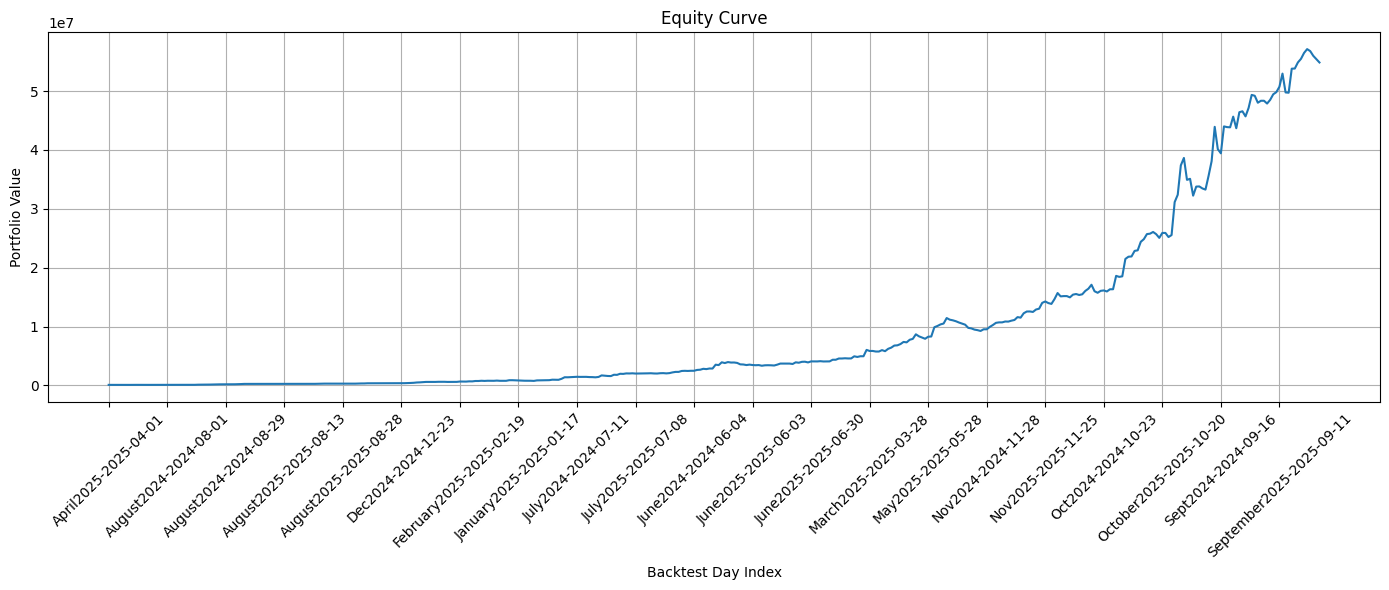

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from collections import defaultdict

# ============================================================
# ====================== CONFIG ==============================
# ============================================================

months = ["June2024","July2024","August2024","Sept2024","Oct2024","Nov2024","Dec2024","January2025","February2025","March2025","April2025","May2025","June2025","July2025","August2025","September2025","October2025","Nov2025"]
base_root = "/content/drive/MyDrive/kite_1min_data"

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))


# ============================================================
# ========== DATA LOADING + 5 MIN RESAMPLE ===================
# ============================================================

def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]

    required = {'date','open','high','low','close','volume'}
    if not required.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5 = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5


# ============================================================
# ========================= STRATEGY =========================
# ============================================================

def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():

        if row.name.time() >= exit_cutoff:  # Exit at 15:15
            final_price = row['close']
            return row.name, final_price, ((final_price-entry_price)/entry_price)*100, "15:15 Exit"

        if row['low'] <= sl:  # SL hit
            return row.name, sl, ((sl-entry_price)/entry_price)*100, "SL Hit"

    # End-of-day exit
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price-entry_price)/entry_price)*100, "End of Day Exit"


def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    for i in range(len(df)-window_size-6):

        range_df = df.iloc[i:i+window_size]
        r_high = range_df['high'].max()
        r_low  = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_vol = range_df['volume'].mean()

        if r_width < max_range_pct:

            breakout = df.iloc[i+window_size]

            if breakout.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout['close'] - breakout['open']
            upper_wick = breakout['high'] - breakout['close']
            body_pct = body / breakout['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout['close'] > breakout['open'] and
                breakout['high'] > r_high and
                body_pct >= min_body_pct and
                breakout['volume'] > volume_multiplier * mean_vol
            ):
                target = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    if row['high'] >= target:

                        entry_price = target
                        sl = entry_price * 0.99
                        remain = candles_after.iloc[j+1:]

                        if len(remain)==0:
                            break

                        exit_time, exit_price, pnl, reason = simulate_exit(entry_price, sl, remain)

                        trades.append({
                            "date": date,
                            "symbol": symbol,
                            "entry_time": row.name,
                            "entry_price": round(entry_price,2),
                            "exit_time": exit_time,
                            "exit_price": round(exit_price,2),
                            "pnl_%": round(pnl,2),
                            "reason": reason
                        })
                        return trades

    return trades


# ============================================================
# ===================== RUN STRATEGY =========================
# ============================================================

portfolio_value = 100000
date_to_returns = {}
monthly_returns = defaultdict(float)

for month in months:

    month_path = os.path.join(base_root, month)
    if not os.path.isdir(month_path):
        print("❌ Missing:", month)
        continue

    print(f"\n=========== Running: {month} ===========")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            df = load_and_resample_5min(os.path.join(date_path,file))
            if df.empty:
                continue

            trades = dynamic_range_breakout(df, file.replace(".csv",""), date_folder)
            daily_trades.extend(trades)

        # Compute daily PnL %
        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
        else:
            day_return = 0

        # Update portfolio
        portfolio_value *= (1 + day_return/100)

        key = f"{month}-{date_folder}"
        date_to_returns[key] = day_return
        monthly_returns[month] += day_return

        print(f"📅 {key} — Return: {day_return:.2f}%")


# ============================================================
# ===================== PERFORMANCE ANALYSIS =================
# ============================================================

def count_trading_days(month_list, base):
    total = 0
    for m in month_list:
        path = os.path.join(base, m)
        if not os.path.isdir(path):
            continue

        days = [
            f for f in os.listdir(path)
            if os.path.isdir(os.path.join(path,f))
        ]
        total += len(days)
    return total

# Build equity curve
equity = []
cap = 100000
labels = []

for d in sorted(date_to_returns.keys()):
    cap *= (1 + date_to_returns[d]/100)
    labels.append(d)
    equity.append(cap)

eq = pd.DataFrame({
    "index": range(len(equity)),
    "label": labels,
    "equity": equity
})

# Drawdown
eq["peak"] = eq["equity"].cummax()
eq["drawdown"] = (eq["equity"] - eq["peak"]) / eq["peak"] * 100
max_dd = eq["drawdown"].min()

# CAGR based on folder count
days = count_trading_days(months, base_root)
years = days / 252 if days > 0 else 1

CAGR = ((equity[-1] / equity[0])**(1/years) - 1) * 100

# Print Summary
print("\n========== ANALYTICS ==========")
print("Trading Days:", days)
print("CAGR:", round(CAGR,2), "%")
print("Max Drawdown:", round(max_dd,2), "%")
print("Final Portfolio:", round(equity[-1],2))
print("================================")


# ============================================================
# ======================= EQUITY PLOT ========================
# ============================================================

plt.figure(figsize=(14,6))
plt.plot(eq["index"], eq["equity"])
plt.title("Equity Curve")
plt.xlabel("Backtest Day Index")
plt.ylabel("Portfolio Value")
plt.grid(True)

# Simplify x-axis labels
step = max(1, len(eq)//20)
plt.xticks(eq["index"][::step], eq["label"][::step], rotation=45)

plt.tight_layout()
plt.show()



===== Monthly Performance Metrics =====
            Month  Monthly Return (%)  Average Daily Return (%)  \
0        June2024               38.07                  2.003684   
1        July2024               76.72                  3.487273   
2      August2024               71.60                  3.409524   
3        Sept2024               38.16                  1.817143   
4         Oct2024               25.10                  1.140909   
5         Nov2024                1.45                  0.080556   
6         Dec2024               55.63                  2.649048   
7     January2025               19.08                  0.829565   
8    February2025               42.47                  2.123500   
9       March2025               38.83                  2.043684   
10      April2025               -2.48                 -0.130526   
11        May2025               55.61                  2.648095   
12       June2025               17.38                  0.827619   
13       July2025    

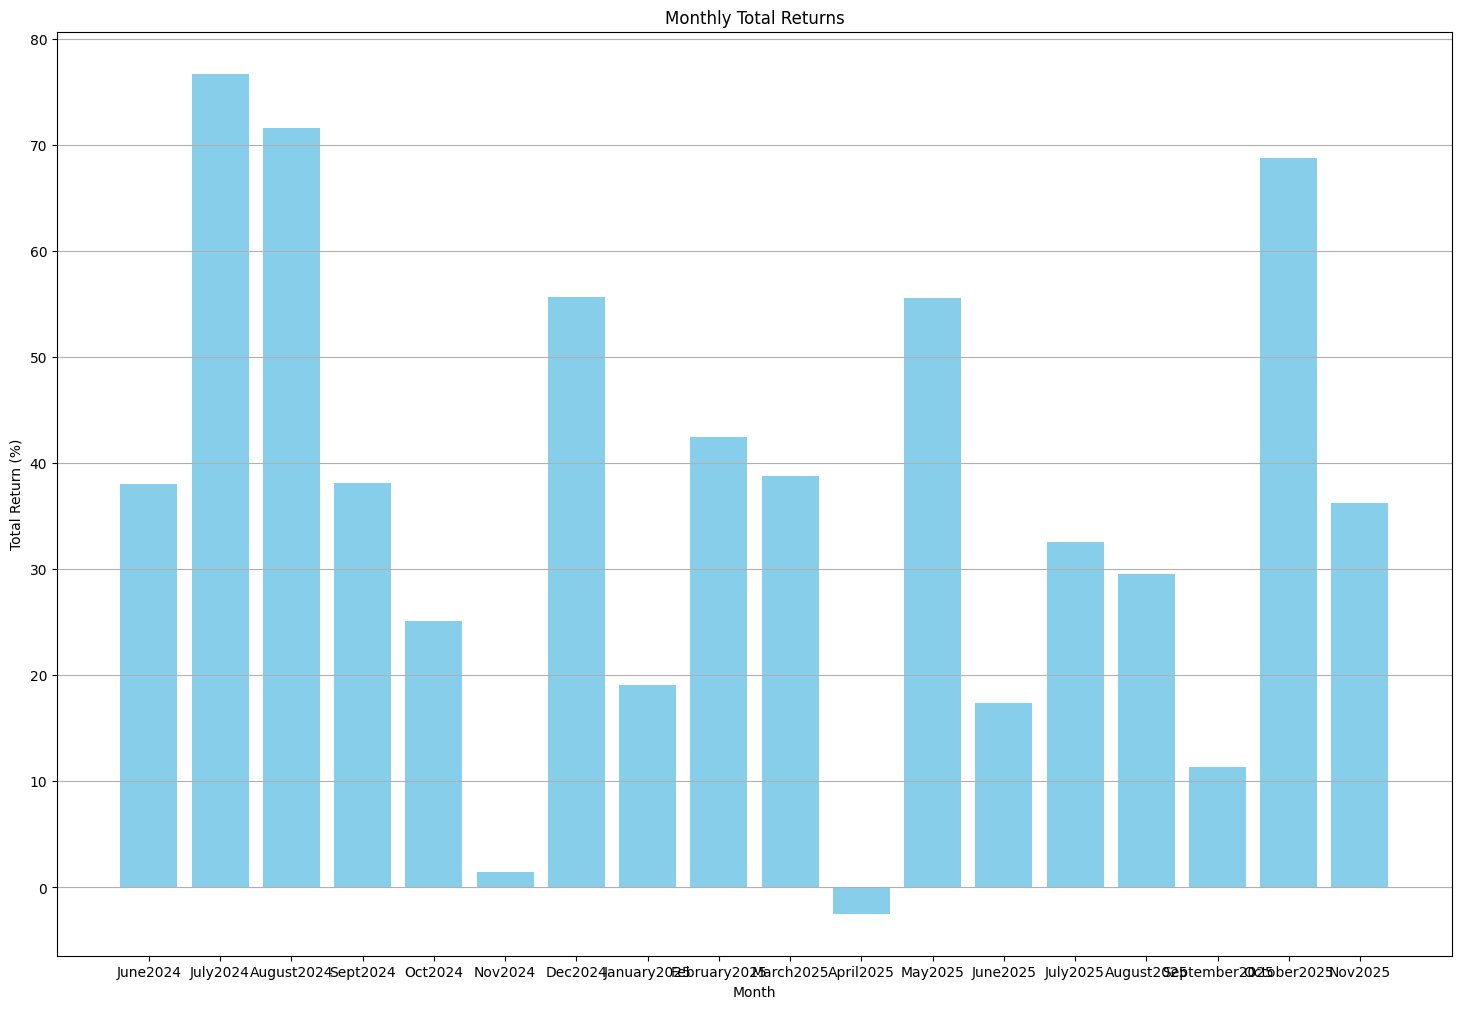

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ====== PASTE YOUR OUTPUT HERE ======
raw_text = """
=========== Running: June2024 ===========
📅 June2024-2024-06-03 — Return: 1.18%
📅 June2024-2024-06-04 — Return: 0.00%
📅 June2024-2024-06-05 — Return: 5.74%
📅 June2024-2024-06-06 — Return: 1.43%
📅 June2024-2024-06-07 — Return: 5.75%
📅 June2024-2024-06-10 — Return: -1.81%
📅 June2024-2024-06-11 — Return: 3.67%
📅 June2024-2024-06-12 — Return: -0.31%
📅 June2024-2024-06-13 — Return: 22.81%
📅 June2024-2024-06-14 — Return: -1.76%
📅 June2024-2024-06-18 — Return: 13.54%
📅 June2024-2024-06-19 — Return: -3.15%
📅 June2024-2024-06-20 — Return: 4.31%
📅 June2024-2024-06-21 — Return: -1.99%
📅 June2024-2024-06-24 — Return: 0.22%
📅 June2024-2024-06-25 — Return: -1.85%
📅 June2024-2024-06-26 — Return: -6.40%
📅 June2024-2024-06-27 — Return: -0.64%
📅 June2024-2024-06-28 — Return: -2.67%

=========== Running: July2024 ===========
📅 July2024-2024-07-01 — Return: 9.02%
📅 July2024-2024-07-02 — Return: -1.17%
📅 July2024-2024-07-03 — Return: -0.77%
📅 July2024-2024-07-04 — Return: 17.98%
📅 July2024-2024-07-05 — Return: 23.25%
📅 July2024-2024-07-08 — Return: -0.53%
📅 July2024-2024-07-09 — Return: 2.09%
📅 July2024-2024-07-10 — Return: 0.89%
📅 July2024-2024-07-11 — Return: 2.95%
📅 July2024-2024-07-12 — Return: -1.07%
📅 July2024-2024-07-15 — Return: 0.29%
📅 July2024-2024-07-16 — Return: 0.13%
📅 July2024-2024-07-18 — Return: -2.50%
📅 July2024-2024-07-19 — Return: -0.58%
📅 July2024-2024-07-22 — Return: -2.32%
📅 July2024-2024-07-23 — Return: 4.56%
📅 July2024-2024-07-24 — Return: 18.09%
📅 July2024-2024-07-25 — Return: -3.01%
📅 July2024-2024-07-26 — Return: -2.79%
📅 July2024-2024-07-29 — Return: -1.15%
📅 July2024-2024-07-30 — Return: 14.27%
📅 July2024-2024-07-31 — Return: -0.91%

=========== Running: August2024 ===========
📅 August2024-2024-08-01 — Return: -1.00%
📅 August2024-2024-08-02 — Return: 4.01%
📅 August2024-2024-08-05 — Return: 0.34%
📅 August2024-2024-08-06 — Return: 0.00%
📅 August2024-2024-08-07 — Return: 3.63%
📅 August2024-2024-08-08 — Return: 1.68%
📅 August2024-2024-08-09 — Return: -2.36%
📅 August2024-2024-08-12 — Return: 4.93%
📅 August2024-2024-08-13 — Return: -1.00%
📅 August2024-2024-08-14 — Return: 0.26%
📅 August2024-2024-08-16 — Return: 20.68%
📅 August2024-2024-08-19 — Return: 1.53%
📅 August2024-2024-08-20 — Return: 5.89%
📅 August2024-2024-08-21 — Return: 8.64%
📅 August2024-2024-08-22 — Return: -0.03%
📅 August2024-2024-08-23 — Return: 10.10%
📅 August2024-2024-08-26 — Return: 4.68%
📅 August2024-2024-08-27 — Return: 7.82%
📅 August2024-2024-08-28 — Return: 0.15%
📅 August2024-2024-08-29 — Return: -2.00%
📅 August2024-2024-08-30 — Return: 3.65%

=========== Running: Sept2024 ===========
📅 Sept2024-2024-09-02 — Return: 0.51%
📅 Sept2024-2024-09-03 — Return: -8.15%
📅 Sept2024-2024-09-04 — Return: 4.77%
📅 Sept2024-2024-09-05 — Return: 0.08%
📅 Sept2024-2024-09-06 — Return: -1.00%
📅 Sept2024-2024-09-09 — Return: -0.60%
📅 Sept2024-2024-09-10 — Return: 6.96%
📅 Sept2024-2024-09-11 — Return: 7.09%
📅 Sept2024-2024-09-12 — Return: 15.29%
📅 Sept2024-2024-09-13 — Return: -8.61%
📅 Sept2024-2024-09-16 — Return: -1.79%
📅 Sept2024-2024-09-17 — Return: 11.60%
📅 Sept2024-2024-09-18 — Return: -0.27%
📅 Sept2024-2024-09-19 — Return: -0.08%
📅 Sept2024-2024-09-20 — Return: 4.13%
📅 Sept2024-2024-09-23 — Return: -4.31%
📅 Sept2024-2024-09-24 — Return: 6.22%
📅 Sept2024-2024-09-25 — Return: 0.35%
📅 Sept2024-2024-09-26 — Return: -1.86%
📅 Sept2024-2024-09-27 — Return: 3.14%
📅 Sept2024-2024-09-30 — Return: 4.69%

=========== Running: Oct2024 ===========
📅 Oct2024-2024-10-01 — Return: 6.99%
📅 Oct2024-2024-10-03 — Return: -3.61%
📅 Oct2024-2024-10-04 — Return: 0.32%
📅 Oct2024-2024-10-07 — Return: 0.00%
📅 Oct2024-2024-10-08 — Return: -1.42%
📅 Oct2024-2024-10-09 — Return: 3.09%
📅 Oct2024-2024-10-10 — Return: 0.68%
📅 Oct2024-2024-10-11 — Return: -1.05%
📅 Oct2024-2024-10-14 — Return: 0.74%
📅 Oct2024-2024-10-15 — Return: 3.72%
📅 Oct2024-2024-10-16 — Return: 2.35%
📅 Oct2024-2024-10-17 — Return: 4.07%
📅 Oct2024-2024-10-18 — Return: -6.46%
📅 Oct2024-2024-10-21 — Return: -1.60%
📅 Oct2024-2024-10-22 — Return: 2.10%
📅 Oct2024-2024-10-23 — Return: 0.40%
📅 Oct2024-2024-10-24 — Return: -1.08%
📅 Oct2024-2024-10-25 — Return: 2.33%
📅 Oct2024-2024-10-28 — Return: 0.04%
📅 Oct2024-2024-10-29 — Return: 13.90%
📅 Oct2024-2024-10-30 — Return: -0.91%
📅 Oct2024-2024-10-31 — Return: 0.50%

=========== Running: Nov2024 ===========
📅 Nov2024-2024-11-04 — Return: 2.15%
📅 Nov2024-2024-11-05 — Return: 2.67%
📅 Nov2024-2024-11-06 — Return: 1.42%
📅 Nov2024-2024-11-07 — Return: 8.85%
📅 Nov2024-2024-11-08 — Return: -2.39%
📅 Nov2024-2024-11-11 — Return: -1.00%
📅 Nov2024-2024-11-12 — Return: -1.43%
📅 Nov2024-2024-11-13 — Return: -2.00%
📅 Nov2024-2024-11-14 — Return: -1.69%
📅 Nov2024-2024-11-18 — Return: -1.75%
📅 Nov2024-2024-11-19 — Return: -5.21%
📅 Nov2024-2024-11-21 — Return: -0.95%
📅 Nov2024-2024-11-22 — Return: -2.08%
📅 Nov2024-2024-11-25 — Return: -1.00%
📅 Nov2024-2024-11-26 — Return: -1.48%
📅 Nov2024-2024-11-27 — Return: 3.07%
📅 Nov2024-2024-11-28 — Return: -0.04%
📅 Nov2024-2024-11-29 — Return: 4.31%

=========== Running: Dec2024 ===========
📅 Dec2024-2024-12-02 — Return: 4.18%
📅 Dec2024-2024-12-03 — Return: 8.21%
📅 Dec2024-2024-12-04 — Return: 1.98%
📅 Dec2024-2024-12-05 — Return: 0.91%
📅 Dec2024-2024-12-06 — Return: 7.22%
📅 Dec2024-2024-12-09 — Return: -0.03%
📅 Dec2024-2024-12-10 — Return: -0.23%
📅 Dec2024-2024-12-11 — Return: 0.26%
📅 Dec2024-2024-12-12 — Return: -0.57%
📅 Dec2024-2024-12-13 — Return: -0.05%
📅 Dec2024-2024-12-16 — Return: 3.50%
📅 Dec2024-2024-12-17 — Return: 0.00%
📅 Dec2024-2024-12-18 — Return: -2.08%
📅 Dec2024-2024-12-19 — Return: -1.42%
📅 Dec2024-2024-12-20 — Return: 0.00%
📅 Dec2024-2024-12-23 — Return: 0.90%
📅 Dec2024-2024-12-24 — Return: 4.59%
📅 Dec2024-2024-12-26 — Return: 4.16%
📅 Dec2024-2024-12-27 — Return: 6.02%
📅 Dec2024-2024-12-30 — Return: 6.42%
📅 Dec2024-2024-12-31 — Return: 11.66%

=========== Running: January2025 ===========
📅 January2025-2025-01-01 — Return: 5.16%
📅 January2025-2025-01-02 — Return: -3.25%
📅 January2025-2025-01-03 — Return: 3.68%
📅 January2025-2025-01-06 — Return: 0.00%
📅 January2025-2025-01-07 — Return: -1.23%
📅 January2025-2025-01-08 — Return: 4.61%
📅 January2025-2025-01-09 — Return: -4.43%
📅 January2025-2025-01-10 — Return: 0.00%
📅 January2025-2025-01-13 — Return: 0.00%
📅 January2025-2025-01-14 — Return: 12.68%
📅 January2025-2025-01-15 — Return: 0.37%
📅 January2025-2025-01-16 — Return: -2.68%
📅 January2025-2025-01-17 — Return: -4.29%
📅 January2025-2025-01-20 — Return: -3.43%
📅 January2025-2025-01-21 — Return: 0.06%
📅 January2025-2025-01-22 — Return: 0.00%
📅 January2025-2025-01-23 — Return: -0.77%
📅 January2025-2025-01-24 — Return: -3.00%
📅 January2025-2025-01-27 — Return: 11.03%
📅 January2025-2025-01-28 — Return: 0.83%
📅 January2025-2025-01-29 — Return: 2.00%
📅 January2025-2025-01-30 — Return: -2.35%
📅 January2025-2025-01-31 — Return: 4.09%

=========== Running: February2025 ===========
📅 February2025-2025-02-01 — Return: 4.13%
📅 February2025-2025-02-03 — Return: 8.28%
📅 February2025-2025-02-04 — Return: 5.52%
📅 February2025-2025-02-05 — Return: -0.91%
📅 February2025-2025-02-06 — Return: 0.59%
📅 February2025-2025-02-07 — Return: 0.23%
📅 February2025-2025-02-10 — Return: 3.50%
📅 February2025-2025-02-11 — Return: 0.00%
📅 February2025-2025-02-12 — Return: 0.16%
📅 February2025-2025-02-13 — Return: -3.57%
📅 February2025-2025-02-14 — Return: 0.00%
📅 February2025-2025-02-17 — Return: 1.63%
📅 February2025-2025-02-18 — Return: -0.25%
📅 February2025-2025-02-19 — Return: 9.69%
📅 February2025-2025-02-20 — Return: -1.58%
📅 February2025-2025-02-21 — Return: 0.00%
📅 February2025-2025-02-24 — Return: 6.39%
📅 February2025-2025-02-25 — Return: -1.00%
📅 February2025-2025-02-27 — Return: 9.49%
📅 February2025-2025-02-28 — Return: 0.17%

=========== Running: March2025 ===========
📅 March2025-2025-03-03 — Return: 0.00%
📅 March2025-2025-03-04 — Return: -0.13%
📅 March2025-2025-03-05 — Return: 1.02%
📅 March2025-2025-03-06 — Return: -1.20%
📅 March2025-2025-03-07 — Return: 0.35%
📅 March2025-2025-03-10 — Return: 0.00%
📅 March2025-2025-03-11 — Return: 6.86%
📅 March2025-2025-03-12 — Return: 0.00%
📅 March2025-2025-03-13 — Return: 4.82%
📅 March2025-2025-03-17 — Return: 0.00%
📅 March2025-2025-03-18 — Return: 0.86%
📅 March2025-2025-03-19 — Return: -0.67%
📅 March2025-2025-03-20 — Return: 0.10%
📅 March2025-2025-03-21 — Return: 7.88%
📅 March2025-2025-03-24 — Return: -2.22%
📅 March2025-2025-03-25 — Return: 2.44%
📅 March2025-2025-03-26 — Return: 0.00%
📅 March2025-2025-03-27 — Return: 21.72%
📅 March2025-2025-03-28 — Return: -3.00%

=========== Running: April2025 ===========
📅 April2025-2025-04-01 — Return: -2.17%
📅 April2025-2025-04-02 — Return: -2.33%
📅 April2025-2025-04-03 — Return: 3.99%
📅 April2025-2025-04-04 — Return: -1.00%
📅 April2025-2025-04-07 — Return: 2.45%
📅 April2025-2025-04-08 — Return: -2.49%
📅 April2025-2025-04-09 — Return: -0.01%
📅 April2025-2025-04-11 — Return: -3.59%
📅 April2025-2025-04-15 — Return: 8.14%
📅 April2025-2025-04-16 — Return: -1.67%
📅 April2025-2025-04-17 — Return: -5.24%
📅 April2025-2025-04-21 — Return: -2.74%
📅 April2025-2025-04-22 — Return: -2.07%
📅 April2025-2025-04-23 — Return: 6.59%
📅 April2025-2025-04-24 — Return: 2.48%
📅 April2025-2025-04-25 — Return: 1.69%
📅 April2025-2025-04-28 — Return: -2.87%
📅 April2025-2025-04-29 — Return: 0.36%
📅 April2025-2025-04-30 — Return: -2.00%

=========== Running: May2025 ===========
📅 May2025-2025-05-02 — Return: 0.06%
📅 May2025-2025-05-05 — Return: -1.67%
📅 May2025-2025-05-06 — Return: 0.00%
📅 May2025-2025-05-07 — Return: 4.15%
📅 May2025-2025-05-08 — Return: -3.00%
📅 May2025-2025-05-09 — Return: 6.85%
📅 May2025-2025-05-12 — Return: 3.26%
📅 May2025-2025-05-13 — Return: 5.50%
📅 May2025-2025-05-14 — Return: 0.59%
📅 May2025-2025-05-15 — Return: 3.14%
📅 May2025-2025-05-16 — Return: 5.16%
📅 May2025-2025-05-19 — Return: -1.00%
📅 May2025-2025-05-20 — Return: 6.05%
📅 May2025-2025-05-21 — Return: 1.92%
📅 May2025-2025-05-22 — Return: 9.81%
📅 May2025-2025-05-23 — Return: -3.92%
📅 May2025-2025-05-26 — Return: -2.44%
📅 May2025-2025-05-27 — Return: -2.61%
📅 May2025-2025-05-28 — Return: 4.36%
📅 May2025-2025-05-29 — Return: 0.50%
📅 May2025-2025-05-30 — Return: 18.90%

=========== Running: June2025 ===========
📅 June2025-2025-06-02 — Return: 2.10%
📅 June2025-2025-06-03 — Return: -1.99%
📅 June2025-2025-06-04 — Return: -0.88%
📅 June2025-2025-06-05 — Return: 0.76%
📅 June2025-2025-06-06 — Return: -3.31%
📅 June2025-2025-06-09 — Return: 2.22%
📅 June2025-2025-06-10 — Return: 0.41%
📅 June2025-2025-06-11 — Return: -0.43%
📅 June2025-2025-06-12 — Return: -1.00%
📅 June2025-2025-06-13 — Return: 4.31%
📅 June2025-2025-06-16 — Return: 5.17%
📅 June2025-2025-06-17 — Return: 0.00%
📅 June2025-2025-06-18 — Return: -0.02%
📅 June2025-2025-06-19 — Return: 0.00%
📅 June2025-2025-06-20 — Return: -1.83%
📅 June2025-2025-06-23 — Return: 7.68%
📅 June2025-2025-06-24 — Return: -1.72%
📅 June2025-2025-06-25 — Return: 3.95%
📅 June2025-2025-06-26 — Return: 0.53%
📅 June2025-2025-06-27 — Return: -3.00%
📅 June2025-2025-06-30 — Return: 4.43%

=========== Running: July2025 ===========
📅 July2025-2025-07-01 — Return: 10.19%
📅 July2025-2025-07-02 — Return: -1.04%
📅 July2025-2025-07-03 — Return: 4.13%
📅 July2025-2025-07-04 — Return: -0.50%
📅 July2025-2025-07-07 — Return: 1.40%
📅 July2025-2025-07-08 — Return: -2.06%
📅 July2025-2025-07-09 — Return: 0.26%
📅 July2025-2025-07-10 — Return: -0.58%
📅 July2025-2025-07-11 — Return: 0.50%
📅 July2025-2025-07-14 — Return: 1.60%
📅 July2025-2025-07-15 — Return: 0.83%
📅 July2025-2025-07-16 — Return: -1.81%
📅 July2025-2025-07-17 — Return: -0.60%
📅 July2025-2025-07-18 — Return: 2.66%
📅 July2025-2025-07-21 — Return: 0.74%
📅 July2025-2025-07-22 — Return: -2.06%
📅 July2025-2025-07-23 — Return: 2.16%
📅 July2025-2025-07-24 — Return: 5.83%
📅 July2025-2025-07-25 — Return: 3.95%
📅 July2025-2025-07-28 — Return: 0.00%
📅 July2025-2025-07-29 — Return: 6.88%
📅 July2025-2025-07-30 — Return: 0.92%
📅 July2025-2025-07-31 — Return: -0.83%

=========== Running: August2025 ===========

📅 August2025-2025-08-01 — Return: 5.96%
📅 August2025-2025-08-04 — Return: 10.84%
📅 August2025-2025-08-05 — Return: 0.12%
📅 August2025-2025-08-06 — Return: -0.08%
📅 August2025-2025-08-07 — Return: -0.14%
📅 August2025-2025-08-08 — Return: 1.79%
📅 August2025-2025-08-11 — Return: -1.13%
📅 August2025-2025-08-12 — Return: -2.63%
📅 August2025-2025-08-13 — Return: -2.77%
📅 August2025-2025-08-14 — Return: 2.35%
📅 August2025-2025-08-15 — Return: 0.00%
📅 August2025-2025-08-18 — Return: 5.44%
📅 August2025-2025-08-19 — Return: 5.79%
📅 August2025-2025-08-20 — Return: -4.10%
📅 August2025-2025-08-21 — Return: 6.62%
📅 August2025-2025-08-22 — Return: 6.55%
📅 August2025-2025-08-25 — Return: 3.32%
📅 August2025-2025-08-26 — Return: -6.53%
📅 August2025-2025-08-27 — Return: 0.00%
📅 August2025-2025-08-28 — Return: 0.00%
📅 August2025-2025-08-29 — Return: -1.84%

=========== Running: September2025 ===========
📅 September2025-2025-09-01 — Return: -0.30%
📅 September2025-2025-09-02 — Return: -2.40%
📅 September2025-2025-09-03 — Return: 0.70%
📅 September2025-2025-09-04 — Return: 0.00%
📅 September2025-2025-09-05 — Return: -0.98%
📅 September2025-2025-09-08 — Return: 1.31%
📅 September2025-2025-09-09 — Return: 1.95%
📅 September2025-2025-09-10 — Return: 0.73%
📅 September2025-2025-09-11 — Return: 1.84%
📅 September2025-2025-09-12 — Return: 4.41%
📅 September2025-2025-09-15 — Return: -6.04%
📅 September2025-2025-09-16 — Return: -0.10%
📅 September2025-2025-09-17 — Return: 8.21%
📅 September2025-2025-09-18 — Return: 0.05%
📅 September2025-2025-09-19 — Return: 1.92%
📅 September2025-2025-09-22 — Return: 1.11%
📅 September2025-2025-09-23 — Return: 1.81%
📅 September2025-2025-09-24 — Return: 1.15%
📅 September2025-2025-09-25 — Return: -0.59%
📅 September2025-2025-09-26 — Return: -1.42%
📅 September2025-2025-09-29 — Return: -1.02%
📅 September2025-2025-09-30 — Return: -1.00%

=========== Running: October2025 ===========
📅 October2025-2025-10-01 — Return: 15.94%
📅 October2025-2025-10-03 — Return: 1.75%
📅 October2025-2025-10-06 — Return: 0.21%
📅 October2025-2025-10-07 — Return: 4.31%
📅 October2025-2025-10-08 — Return: 0.43%
📅 October2025-2025-10-09 — Return: 6.29%
📅 October2025-2025-10-10 — Return: 1.85%
📅 October2025-2025-10-13 — Return: 3.47%
📅 October2025-2025-10-14 — Return: 0.27%
📅 October2025-2025-10-15 — Return: 1.12%
📅 October2025-2025-10-16 — Return: -1.42%
📅 October2025-2025-10-17 — Return: -2.44%
📅 October2025-2025-10-20 — Return: 3.33%
📅 October2025-2025-10-21 — Return: 0.00%
📅 October2025-2025-10-23 — Return: -2.69%
📅 October2025-2025-10-24 — Return: 1.32%
📅 October2025-2025-10-27 — Return: 21.92%
📅 October2025-2025-10-28 — Return: 4.02%
📅 October2025-2025-10-29 — Return: 15.39%
📅 October2025-2025-10-30 — Return: 3.38%
📅 October2025-2025-10-31 — Return: -9.63%

=========== Running: Nov2025 ===========
📅 Nov2025-2025-11-03 — Return: 3.20%
📅 Nov2025-2025-11-04 — Return: 0.73%
📅 Nov2025-2025-11-06 — Return: 1.37%
📅 Nov2025-2025-11-07 — Return: -0.14%
📅 Nov2025-2025-11-10 — Return: 1.44%
📅 Nov2025-2025-11-11 — Return: 1.08%
📅 Nov2025-2025-11-12 — Return: 4.40%
📅 Nov2025-2025-11-13 — Return: -0.81%
📅 Nov2025-2025-11-14 — Return: 6.45%
📅 Nov2025-2025-11-17 — Return: 2.45%
📅 Nov2025-2025-11-18 — Return: 0.07%
📅 Nov2025-2025-11-19 — Return: -0.64%
📅 Nov2025-2025-11-20 — Return: 3.30%
📅 Nov2025-2025-11-21 — Return: 1.06%
📅 Nov2025-2025-11-24 — Return: 7.58%
📅 Nov2025-2025-11-25 — Return: 1.73%
📅 Nov2025-2025-11-26 — Return: -1.92%
📅 Nov2025-2025-11-27 — Return: -1.01%
📅 Nov2025-2025-11-28 — Return: 5.92%
"""

# ====== PARSE MONTHS + RETURNS ======
pattern = r"Running:\s+(\w+\d{4}).*?((?:(?:📅.*?Return:.*?%\n?)+))"
month_blocks = re.findall(pattern, raw_text, flags=re.DOTALL)

data = []

for month, block in month_blocks:
    returns = re.findall(r"Return:\s*([-+]?\d+\.\d+)%", block)
    returns = list(map(float, returns))
    for r in returns:
        data.append([month, r])

df = pd.DataFrame(data, columns=["Month", "Return"])

# ====== CALCULATE MONTHLY METRICS ======
monthly_metrics = []

for month in df["Month"].unique():
    subset = df[df["Month"] == month]["Return"]
    cumulative = (1 + subset / 100).cumprod() - 1  # cumulative growth
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak * 100 if peak.max() != 0 else 0
    max_dd = drawdown.min()

    negative_returns = subset[subset < 0]
    downside_std = negative_returns.std() if len(negative_returns) > 0 else np.nan
    sortino = subset.mean() / downside_std if downside_std and downside_std != 0 else np.nan

    monthly_metrics.append({
        "Month": month,
        "Monthly Return (%)": subset.sum(),
        "Average Daily Return (%)": subset.mean(),
        "Max Daily Return (%)": subset.max(),
        "Worst Daily Return (%)": subset.min(),
        "Max Drawdown (%)": max_dd,
        "Sortino Ratio": sortino
    })

metrics_df = pd.DataFrame(monthly_metrics)
print("\n===== Monthly Performance Metrics =====")
print(metrics_df)

# ====== PLOT MONTHLY RETURN HISTOGRAM ======
plt.figure(figsize=(18,12))
plt.bar(metrics_df["Month"], metrics_df["Monthly Return (%)"], color='skyblue')
plt.title("Monthly Total Returns")
plt.xlabel("Month")
plt.ylabel("Total Return (%)")
plt.grid(axis='y')
plt.show()


**FOR EMA**

In [ ]:
# EMA FOR MONTHS

### trying ema

import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===

months = ["June2024","July2024","August2024","Sept2024","Oct2024","Nov2024",
          "Dec2024","January2025","February2025","March2025","April2025",
          "May2025","June2025","July2025","August2025","September2025",
          "October2025","Nov2025"]

base_root = "/content/drive/MyDrive/kite_1min_data"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === NEW: store count of date folders inside each month ===
month_folder_count = {}

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min


def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():
        if row.name.time() >= exit_cutoff:
            final_price = row['close']
            return row.name, final_price, ((final_price - entry_price) / entry_price) * 100, '15:15 Exit'

        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'


def dynamic_range_breakout(df, symbol, date):
    trades = []
    if df.empty or len(df) < window_size + 10:
        return trades

    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    if df['ema20'].iloc[-1] <= df['ema50'].iloc[-1]:
        return trades

    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width < max_range_pct:
            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                continue

            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j in range(len(candles_after)):
                    row = candles_after.iloc[j]

                    if row.name.time() > pd.to_datetime("14:30").time():
                        break

                    if row['high'] >= target_entry_price:
                        entry_price = target_entry_price
                        sl = entry_price * 0.99

                        remaining_candles = candles_after.iloc[j + 1:]
                        if len(remaining_candles) == 0:
                            break

                        exit_time, exit_price, pnl_pct, reason = simulate_exit(
                            entry_price, sl, remaining_candles
                        )

                        trades.append({
                            'date': date,
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'pnl_%': round(pnl_pct, 2),
                            'reason': reason
                        })
                        return trades

    return trades


# === MAIN LOOP ===

portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    # NEW: COUNT DATE FOLDERS INSIDE EACH MONTH
    date_folders = [d for d in os.listdir(month_path)
                    if os.path.isdir(os.path.join(month_path, d))]
    month_folder_count[month] = len(date_folders)

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"📁 Date Folders Found: {month_folder_count[month]}")
    print(f"==============================")

    for date_folder in sorted(date_folders):
        date_path = os.path.join(month_path, date_folder)

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)

        date_key = f"{month}-{date_folder}"
        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")


# === SUMMARY ===
print("\n📊 SUMMARY:")
for m in months:
    print(f"🗓️ {m}: Date Folders = {month_folder_count[m]}, Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# ==========================
# ===== ANALYTICS ==========
# ==========================

import matplotlib.pyplot as plt

equity = []
dates = []
capital = 100000

for d in sorted(date_to_returns.keys()):
    ret = date_to_returns[d]
    capital *= (1 + ret / 100)
    dates.append(d)
    equity.append(capital)

equity_df = pd.DataFrame({'date': dates, 'equity': equity})
equity_df['date'] = pd.to_datetime(equity_df['date'], errors='ignore')
equity_df = equity_df.sort_values('date').reset_index(drop=True)

equity_df['daily_return'] = equity_df['equity'].pct_change() * 100
equity_df['peak'] = equity_df['equity'].cummax()
equity_df['drawdown'] = (equity_df['equity'] - equity_df['peak']) / equity_df['peak'] * 100

max_dd = equity_df['drawdown'].min()

print("\n📉 MAX DRAWDOWN:", round(max_dd, 2), "%")

start_value = equity_df['equity'].iloc[0]
end_value   = equity_df['equity'].iloc[-1]
num_days    = (equity_df['date'].iloc[-1] - equity_df['date'].iloc[0]).days

years = num_days / 365
CAGR = ((end_value / start_value) ** (1 / years) - 1) * 100
print("🚀 CAGR:", round(CAGR, 2), "%")

volatility = equity_df['daily_return'].std() * np.sqrt(252)
print("⚡ Annualized Volatility:", round(volatility, 2), "%")

rf = 0
downside_returns = equity_df.loc[equity_df['daily_return'] < 0, 'daily_return']

if len(downside_returns) > 0:
    downside_std = downside_returns.std() * np.sqrt(252)
    sortino = (CAGR - rf) / downside_std
else:
    sortino = np.nan

print("📈 Sortino Ratio:", round(sortino, 3))

rolling_sharpe = (
    equity_df['daily_return'].rolling(30).mean() /
    equity_df['daily_return'].rolling(30).std()
) * np.sqrt(252)

equity_df['rolling_sharpe'] = rolling_sharpe

# === PLOTS ===

plt.figure(figsize=(14,6))
plt.plot(equity_df['date'], equity_df['equity'], linewidth=2)
plt.title("Equity Curve")
plt.xlabel("Date")
plt.ylabel("Capital (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(equity_df['date'], equity_df['drawdown'], linewidth=1.5)
plt.title("Drawdown Curve (%)")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
plt.plot(equity_df['date'], equity_df['rolling_sharpe'], linewidth=1.8)
plt.title("Rolling 30-Day Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe")
plt.grid(True)
plt.tight_layout()
plt.show()



📆 Running for Month: June2024
📁 Date Folders Found: 19
📅 June2024-2024-06-03 — Trades: 6, Return: 1.18%
📅 June2024-2024-06-04 — Trades: 0, Return: 0.00%
📅 June2024-2024-06-05 — Trades: 6, Return: 6.73%
📅 June2024-2024-06-06 — Trades: 1, Return: 1.43%
📅 June2024-2024-06-07 — Trades: 9, Return: 5.75%
📅 June2024-2024-06-10 — Trades: 6, Return: -1.81%
📅 June2024-2024-06-11 — Trades: 15, Return: 5.67%
📅 June2024-2024-06-12 — Trades: 9, Return: -0.31%
📅 June2024-2024-06-13 — Trades: 16, Return: 24.81%
📅 June2024-2024-06-14 — Trades: 9, Return: -1.76%
📅 June2024-2024-06-18 — Trades: 11, Return: 13.54%
📅 June2024-2024-06-19 — Trades: 3, Return: -1.15%
📅 June2024-2024-06-20 — Trades: 7, Return: 4.31%
📅 June2024-2024-06-21 — Trades: 0, Return: 0.00%
📅 June2024-2024-06-24 — Trades: 6, Return: 0.22%
📅 June2024-2024-06-25 — Trades: 8, Return: -1.85%
📅 June2024-2024-06-26 — Trades: 6, Return: -5.40%
📅 June2024-2024-06-27 — Trades: 1, Return: 0.36%
📅 June2024-2024-06-28 — Trades: 6, Return: 0.33%

📆

/tmp/ipython-input-312990033.py:236: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  equity_df['date'] = pd.to_datetime(equity_df['date'], errors='ignore')
/tmp/ipython-input-312990033.py:236: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  equity_df['date'] = pd.to_datetime(equity_df['date'], errors='ignore')


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
import re
import pandas as pd

# Example raw texts
raw_text = """=========== Running: June2024 ===========
📅 June2024-2024-06-03 — Return: 1.18%
📅 June2024-2024-06-04 — Return: 0.00%
📅 June2024-2024-06-05 — Return: 5.74%
📅 June2024-2024-06-06 — Return: 1.43%
📅 June2024-2024-06-07 — Return: 5.75%
📅 June2024-2024-06-10 — Return: -1.81%
📅 June2024-2024-06-11 — Return: 3.67%
📅 June2024-2024-06-12 — Return: -0.31%
📅 June2024-2024-06-13 — Return: 22.81%
📅 June2024-2024-06-14 — Return: -1.76%
📅 June2024-2024-06-18 — Return: 13.54%
📅 June2024-2024-06-19 — Return: -3.15%
📅 June2024-2024-06-20 — Return: 4.31%
📅 June2024-2024-06-21 — Return: -1.99%
📅 June2024-2024-06-24 — Return: 0.22%
📅 June2024-2024-06-25 — Return: -1.85%
📅 June2024-2024-06-26 — Return: -6.40%
📅 June2024-2024-06-27 — Return: -0.64%
📅 June2024-2024-06-28 — Return: -2.67%

=========== Running: July2024 ===========
📅 July2024-2024-07-01 — Return: 9.02%
📅 July2024-2024-07-02 — Return: -1.17%
📅 July2024-2024-07-03 — Return: -0.77%
📅 July2024-2024-07-04 — Return: 17.98%
📅 July2024-2024-07-05 — Return: 23.25%
📅 July2024-2024-07-08 — Return: -0.53%
📅 July2024-2024-07-09 — Return: 2.09%
📅 July2024-2024-07-10 — Return: 0.89%
📅 July2024-2024-07-11 — Return: 2.95%
📅 July2024-2024-07-12 — Return: -1.07%
📅 July2024-2024-07-15 — Return: 0.29%
📅 July2024-2024-07-16 — Return: 0.13%
📅 July2024-2024-07-18 — Return: -2.50%
📅 July2024-2024-07-19 — Return: -0.58%
📅 July2024-2024-07-22 — Return: -2.32%
📅 July2024-2024-07-23 — Return: 4.56%
📅 July2024-2024-07-24 — Return: 18.09%
📅 July2024-2024-07-25 — Return: -3.01%
📅 July2024-2024-07-26 — Return: -2.79%
📅 July2024-2024-07-29 — Return: -1.15%
📅 July2024-2024-07-30 — Return: 14.27%
📅 July2024-2024-07-31 — Return: -0.91%

=========== Running: August2024 ===========
📅 August2024-2024-08-01 — Return: -1.00%
📅 August2024-2024-08-02 — Return: 4.01%
📅 August2024-2024-08-05 — Return: 0.34%
📅 August2024-2024-08-06 — Return: 0.00%
📅 August2024-2024-08-07 — Return: 3.63%
📅 August2024-2024-08-08 — Return: 1.68%
📅 August2024-2024-08-09 — Return: -2.36%
📅 August2024-2024-08-12 — Return: 4.93%
📅 August2024-2024-08-13 — Return: -1.00%
📅 August2024-2024-08-14 — Return: 0.26%
📅 August2024-2024-08-16 — Return: 20.68%
📅 August2024-2024-08-19 — Return: 1.53%
📅 August2024-2024-08-20 — Return: 5.89%
📅 August2024-2024-08-21 — Return: 8.64%
📅 August2024-2024-08-22 — Return: -0.03%
📅 August2024-2024-08-23 — Return: 10.10%
📅 August2024-2024-08-26 — Return: 4.68%
📅 August2024-2024-08-27 — Return: 7.82%
📅 August2024-2024-08-28 — Return: 0.15%
📅 August2024-2024-08-29 — Return: -2.00%
📅 August2024-2024-08-30 — Return: 3.65%

=========== Running: Sept2024 ===========
📅 Sept2024-2024-09-02 — Return: 0.51%
📅 Sept2024-2024-09-03 — Return: -8.15%
📅 Sept2024-2024-09-04 — Return: 4.77%
📅 Sept2024-2024-09-05 — Return: 0.08%
📅 Sept2024-2024-09-06 — Return: -1.00%
📅 Sept2024-2024-09-09 — Return: -0.60%
📅 Sept2024-2024-09-10 — Return: 6.96%
📅 Sept2024-2024-09-11 — Return: 7.09%
📅 Sept2024-2024-09-12 — Return: 15.29%
📅 Sept2024-2024-09-13 — Return: -8.61%
📅 Sept2024-2024-09-16 — Return: -1.79%
📅 Sept2024-2024-09-17 — Return: 11.60%
📅 Sept2024-2024-09-18 — Return: -0.27%
📅 Sept2024-2024-09-19 — Return: -0.08%
📅 Sept2024-2024-09-20 — Return: 4.13%
📅 Sept2024-2024-09-23 — Return: -4.31%
📅 Sept2024-2024-09-24 — Return: 6.22%
📅 Sept2024-2024-09-25 — Return: 0.35%
📅 Sept2024-2024-09-26 — Return: -1.86%
📅 Sept2024-2024-09-27 — Return: 3.14%
📅 Sept2024-2024-09-30 — Return: 4.69%

=========== Running: Oct2024 ===========
📅 Oct2024-2024-10-01 — Return: 6.99%
📅 Oct2024-2024-10-03 — Return: -3.61%
📅 Oct2024-2024-10-04 — Return: 0.32%
📅 Oct2024-2024-10-07 — Return: 0.00%
📅 Oct2024-2024-10-08 — Return: -1.42%
📅 Oct2024-2024-10-09 — Return: 3.09%
📅 Oct2024-2024-10-10 — Return: 0.68%
📅 Oct2024-2024-10-11 — Return: -1.05%
📅 Oct2024-2024-10-14 — Return: 0.74%
📅 Oct2024-2024-10-15 — Return: 3.72%
📅 Oct2024-2024-10-16 — Return: 2.35%
📅 Oct2024-2024-10-17 — Return: 4.07%
📅 Oct2024-2024-10-18 — Return: -6.46%
📅 Oct2024-2024-10-21 — Return: -1.60%
📅 Oct2024-2024-10-22 — Return: 2.10%
📅 Oct2024-2024-10-23 — Return: 0.40%
📅 Oct2024-2024-10-24 — Return: -1.08%
📅 Oct2024-2024-10-25 — Return: 2.33%
📅 Oct2024-2024-10-28 — Return: 0.04%
📅 Oct2024-2024-10-29 — Return: 13.90%
📅 Oct2024-2024-10-30 — Return: -0.91%
📅 Oct2024-2024-10-31 — Return: 0.50%

=========== Running: Nov2024 ===========
📅 Nov2024-2024-11-04 — Return: 2.15%
📅 Nov2024-2024-11-05 — Return: 2.67%
📅 Nov2024-2024-11-06 — Return: 1.42%
📅 Nov2024-2024-11-07 — Return: 8.85%
📅 Nov2024-2024-11-08 — Return: -2.39%
📅 Nov2024-2024-11-11 — Return: -1.00%
📅 Nov2024-2024-11-12 — Return: -1.43%
📅 Nov2024-2024-11-13 — Return: -2.00%
📅 Nov2024-2024-11-14 — Return: -1.69%
📅 Nov2024-2024-11-18 — Return: -1.75%
📅 Nov2024-2024-11-19 — Return: -5.21%
📅 Nov2024-2024-11-21 — Return: -0.95%
📅 Nov2024-2024-11-22 — Return: -2.08%
📅 Nov2024-2024-11-25 — Return: -1.00%
📅 Nov2024-2024-11-26 — Return: -1.48%
📅 Nov2024-2024-11-27 — Return: 3.07%
📅 Nov2024-2024-11-28 — Return: -0.04%
📅 Nov2024-2024-11-29 — Return: 4.31%

=========== Running: Dec2024 ===========
📅 Dec2024-2024-12-02 — Return: 4.18%
📅 Dec2024-2024-12-03 — Return: 8.21%
📅 Dec2024-2024-12-04 — Return: 1.98%
📅 Dec2024-2024-12-05 — Return: 0.91%
📅 Dec2024-2024-12-06 — Return: 7.22%
📅 Dec2024-2024-12-09 — Return: -0.03%
📅 Dec2024-2024-12-10 — Return: -0.23%
📅 Dec2024-2024-12-11 — Return: 0.26%
📅 Dec2024-2024-12-12 — Return: -0.57%
📅 Dec2024-2024-12-13 — Return: -0.05%
📅 Dec2024-2024-12-16 — Return: 3.50%
📅 Dec2024-2024-12-17 — Return: 0.00%
📅 Dec2024-2024-12-18 — Return: -2.08%
📅 Dec2024-2024-12-19 — Return: -1.42%
📅 Dec2024-2024-12-20 — Return: 0.00%
📅 Dec2024-2024-12-23 — Return: 0.90%
📅 Dec2024-2024-12-24 — Return: 4.59%
📅 Dec2024-2024-12-26 — Return: 4.16%
📅 Dec2024-2024-12-27 — Return: 6.02%
📅 Dec2024-2024-12-30 — Return: 6.42%
📅 Dec2024-2024-12-31 — Return: 11.66%

=========== Running: January2025 ===========
📅 January2025-2025-01-01 — Return: 5.16%
📅 January2025-2025-01-02 — Return: -3.25%
📅 January2025-2025-01-03 — Return: 3.68%
📅 January2025-2025-01-06 — Return: 0.00%
📅 January2025-2025-01-07 — Return: -1.23%
📅 January2025-2025-01-08 — Return: 4.61%
📅 January2025-2025-01-09 — Return: -4.43%
📅 January2025-2025-01-10 — Return: 0.00%
📅 January2025-2025-01-13 — Return: 0.00%
📅 January2025-2025-01-14 — Return: 12.68%
📅 January2025-2025-01-15 — Return: 0.37%
📅 January2025-2025-01-16 — Return: -2.68%
📅 January2025-2025-01-17 — Return: -4.29%
📅 January2025-2025-01-20 — Return: -3.43%
📅 January2025-2025-01-21 — Return: 0.06%
📅 January2025-2025-01-22 — Return: 0.00%
📅 January2025-2025-01-23 — Return: -0.77%
📅 January2025-2025-01-24 — Return: -3.00%
📅 January2025-2025-01-27 — Return: 11.03%
📅 January2025-2025-01-28 — Return: 0.83%
📅 January2025-2025-01-29 — Return: 2.00%
📅 January2025-2025-01-30 — Return: -2.35%
📅 January2025-2025-01-31 — Return: 4.09%

=========== Running: February2025 ===========
📅 February2025-2025-02-01 — Return: 4.13%
📅 February2025-2025-02-03 — Return: 8.28%
📅 February2025-2025-02-04 — Return: 5.52%
📅 February2025-2025-02-05 — Return: -0.91%
📅 February2025-2025-02-06 — Return: 0.59%
📅 February2025-2025-02-07 — Return: 0.23%
📅 February2025-2025-02-10 — Return: 3.50%
📅 February2025-2025-02-11 — Return: 0.00%
📅 February2025-2025-02-12 — Return: 0.16%
📅 February2025-2025-02-13 — Return: -3.57%
📅 February2025-2025-02-14 — Return: 0.00%
📅 February2025-2025-02-17 — Return: 1.63%
📅 February2025-2025-02-18 — Return: -0.25%
📅 February2025-2025-02-19 — Return: 9.69%
📅 February2025-2025-02-20 — Return: -1.58%
📅 February2025-2025-02-21 — Return: 0.00%
📅 February2025-2025-02-24 — Return: 6.39%
📅 February2025-2025-02-25 — Return: -1.00%
📅 February2025-2025-02-27 — Return: 9.49%
📅 February2025-2025-02-28 — Return: 0.17%

=========== Running: March2025 ===========
📅 March2025-2025-03-03 — Return: 0.00%
📅 March2025-2025-03-04 — Return: -0.13%
📅 March2025-2025-03-05 — Return: 1.02%
📅 March2025-2025-03-06 — Return: -1.20%
📅 March2025-2025-03-07 — Return: 0.35%
📅 March2025-2025-03-10 — Return: 0.00%
📅 March2025-2025-03-11 — Return: 6.86%
📅 March2025-2025-03-12 — Return: 0.00%
📅 March2025-2025-03-13 — Return: 4.82%
📅 March2025-2025-03-17 — Return: 0.00%
📅 March2025-2025-03-18 — Return: 0.86%
📅 March2025-2025-03-19 — Return: -0.67%
📅 March2025-2025-03-20 — Return: 0.10%
📅 March2025-2025-03-21 — Return: 7.88%
📅 March2025-2025-03-24 — Return: -2.22%
📅 March2025-2025-03-25 — Return: 2.44%
📅 March2025-2025-03-26 — Return: 0.00%
📅 March2025-2025-03-27 — Return: 21.72%
📅 March2025-2025-03-28 — Return: -3.00%

=========== Running: April2025 ===========
📅 April2025-2025-04-01 — Return: -2.17%
📅 April2025-2025-04-02 — Return: -2.33%
📅 April2025-2025-04-03 — Return: 3.99%
📅 April2025-2025-04-04 — Return: -1.00%
📅 April2025-2025-04-07 — Return: 2.45%
📅 April2025-2025-04-08 — Return: -2.49%
📅 April2025-2025-04-09 — Return: -0.01%
📅 April2025-2025-04-11 — Return: -3.59%
📅 April2025-2025-04-15 — Return: 8.14%
📅 April2025-2025-04-16 — Return: -1.67%
📅 April2025-2025-04-17 — Return: -5.24%
📅 April2025-2025-04-21 — Return: -2.74%
📅 April2025-2025-04-22 — Return: -2.07%
📅 April2025-2025-04-23 — Return: 6.59%
📅 April2025-2025-04-24 — Return: 2.48%
📅 April2025-2025-04-25 — Return: 1.69%
📅 April2025-2025-04-28 — Return: -2.87%
📅 April2025-2025-04-29 — Return: 0.36%
📅 April2025-2025-04-30 — Return: -2.00%

=========== Running: May2025 ===========
📅 May2025-2025-05-02 — Return: 0.06%
📅 May2025-2025-05-05 — Return: -1.67%
📅 May2025-2025-05-06 — Return: 0.00%
📅 May2025-2025-05-07 — Return: 4.15%
📅 May2025-2025-05-08 — Return: -3.00%
📅 May2025-2025-05-09 — Return: 6.85%
📅 May2025-2025-05-12 — Return: 3.26%
📅 May2025-2025-05-13 — Return: 5.50%
📅 May2025-2025-05-14 — Return: 0.59%
📅 May2025-2025-05-15 — Return: 3.14%
📅 May2025-2025-05-16 — Return: 5.16%
📅 May2025-2025-05-19 — Return: -1.00%
📅 May2025-2025-05-20 — Return: 6.05%
📅 May2025-2025-05-21 — Return: 1.92%
📅 May2025-2025-05-22 — Return: 9.81%
📅 May2025-2025-05-23 — Return: -3.92%
📅 May2025-2025-05-26 — Return: -2.44%
📅 May2025-2025-05-27 — Return: -2.61%
📅 May2025-2025-05-28 — Return: 4.36%
📅 May2025-2025-05-29 — Return: 0.50%
📅 May2025-2025-05-30 — Return: 18.90%

=========== Running: June2025 ===========
📅 June2025-2025-06-02 — Return: 2.10%
📅 June2025-2025-06-03 — Return: -1.99%
📅 June2025-2025-06-04 — Return: -0.88%
📅 June2025-2025-06-05 — Return: 0.76%
📅 June2025-2025-06-06 — Return: -3.31%
📅 June2025-2025-06-09 — Return: 2.22%
📅 June2025-2025-06-10 — Return: 0.41%
📅 June2025-2025-06-11 — Return: -0.43%
📅 June2025-2025-06-12 — Return: -1.00%
📅 June2025-2025-06-13 — Return: 4.31%
📅 June2025-2025-06-16 — Return: 5.17%
📅 June2025-2025-06-17 — Return: 0.00%
📅 June2025-2025-06-18 — Return: -0.02%
📅 June2025-2025-06-19 — Return: 0.00%
📅 June2025-2025-06-20 — Return: -1.83%
📅 June2025-2025-06-23 — Return: 7.68%
📅 June2025-2025-06-24 — Return: -1.72%
📅 June2025-2025-06-25 — Return: 3.95%
📅 June2025-2025-06-26 — Return: 0.53%
📅 June2025-2025-06-27 — Return: -3.00%
📅 June2025-2025-06-30 — Return: 4.43%

=========== Running: July2025 ===========
📅 July2025-2025-07-01 — Return: 10.19%
📅 July2025-2025-07-02 — Return: -1.04%
📅 July2025-2025-07-03 — Return: 4.13%
📅 July2025-2025-07-04 — Return: -0.50%
📅 July2025-2025-07-07 — Return: 1.40%
📅 July2025-2025-07-08 — Return: -2.06%
📅 July2025-2025-07-09 — Return: 0.26%
📅 July2025-2025-07-10 — Return: -0.58%
📅 July2025-2025-07-11 — Return: 0.50%
📅 July2025-2025-07-14 — Return: 1.60%
📅 July2025-2025-07-15 — Return: 0.83%
📅 July2025-2025-07-16 — Return: -1.81%
📅 July2025-2025-07-17 — Return: -0.60%
📅 July2025-2025-07-18 — Return: 2.66%
📅 July2025-2025-07-21 — Return: 0.74%
📅 July2025-2025-07-22 — Return: -2.06%
📅 July2025-2025-07-23 — Return: 2.16%
📅 July2025-2025-07-24 — Return: 5.83%
📅 July2025-2025-07-25 — Return: 3.95%
📅 July2025-2025-07-28 — Return: 0.00%
📅 July2025-2025-07-29 — Return: 6.88%
📅 July2025-2025-07-30 — Return: 0.92%
📅 July2025-2025-07-31 — Return: -0.83%

=========== Running: August2025 ===========

📅 August2025-2025-08-01 — Return: 5.96%
📅 August2025-2025-08-04 — Return: 10.84%
📅 August2025-2025-08-05 — Return: 0.12%
📅 August2025-2025-08-06 — Return: -0.08%
📅 August2025-2025-08-07 — Return: -0.14%
📅 August2025-2025-08-08 — Return: 1.79%
📅 August2025-2025-08-11 — Return: -1.13%
📅 August2025-2025-08-12 — Return: -2.63%
📅 August2025-2025-08-13 — Return: -2.77%
📅 August2025-2025-08-14 — Return: 2.35%
📅 August2025-2025-08-15 — Return: 0.00%
📅 August2025-2025-08-18 — Return: 5.44%
📅 August2025-2025-08-19 — Return: 5.79%
📅 August2025-2025-08-20 — Return: -4.10%
📅 August2025-2025-08-21 — Return: 6.62%
📅 August2025-2025-08-22 — Return: 6.55%
📅 August2025-2025-08-25 — Return: 3.32%
📅 August2025-2025-08-26 — Return: -6.53%
📅 August2025-2025-08-27 — Return: 0.00%
📅 August2025-2025-08-28 — Return: 0.00%
📅 August2025-2025-08-29 — Return: -1.84%

=========== Running: September2025 ===========
📅 September2025-2025-09-01 — Return: -0.30%
📅 September2025-2025-09-02 — Return: -2.40%
📅 September2025-2025-09-03 — Return: 0.70%
📅 September2025-2025-09-04 — Return: 0.00%
📅 September2025-2025-09-05 — Return: -0.98%
📅 September2025-2025-09-08 — Return: 1.31%
📅 September2025-2025-09-09 — Return: 1.95%
📅 September2025-2025-09-10 — Return: 0.73%
📅 September2025-2025-09-11 — Return: 1.84%
📅 September2025-2025-09-12 — Return: 4.41%
📅 September2025-2025-09-15 — Return: -6.04%
📅 September2025-2025-09-16 — Return: -0.10%
📅 September2025-2025-09-17 — Return: 8.21%
📅 September2025-2025-09-18 — Return: 0.05%
📅 September2025-2025-09-19 — Return: 1.92%
📅 September2025-2025-09-22 — Return: 1.11%
📅 September2025-2025-09-23 — Return: 1.81%
📅 September2025-2025-09-24 — Return: 1.15%
📅 September2025-2025-09-25 — Return: -0.59%
📅 September2025-2025-09-26 — Return: -1.42%
📅 September2025-2025-09-29 — Return: -1.02%
📅 September2025-2025-09-30 — Return: -1.00%

=========== Running: October2025 ===========
📅 October2025-2025-10-01 — Return: 15.94%
📅 October2025-2025-10-03 — Return: 1.75%
📅 October2025-2025-10-06 — Return: 0.21%
📅 October2025-2025-10-07 — Return: 4.31%
📅 October2025-2025-10-08 — Return: 0.43%
📅 October2025-2025-10-09 — Return: 6.29%
📅 October2025-2025-10-10 — Return: 1.85%
📅 October2025-2025-10-13 — Return: 3.47%
📅 October2025-2025-10-14 — Return: 0.27%
📅 October2025-2025-10-15 — Return: 1.12%
📅 October2025-2025-10-16 — Return: -1.42%
📅 October2025-2025-10-17 — Return: -2.44%
📅 October2025-2025-10-20 — Return: 3.33%
📅 October2025-2025-10-21 — Return: 0.00%
📅 October2025-2025-10-23 — Return: -2.69%
📅 October2025-2025-10-24 — Return: 1.32%
📅 October2025-2025-10-27 — Return: 21.92%
📅 October2025-2025-10-28 — Return: 4.02%
📅 October2025-2025-10-29 — Return: 15.39%
📅 October2025-2025-10-30 — Return: 3.38%
📅 October2025-2025-10-31 — Return: -9.63%

=========== Running: Nov2025 ===========
📅 Nov2025-2025-11-03 — Return: 3.20%
📅 Nov2025-2025-11-04 — Return: 0.73%
📅 Nov2025-2025-11-06 — Return: 1.37%
📅 Nov2025-2025-11-07 — Return: -0.14%
📅 Nov2025-2025-11-10 — Return: 1.44%
📅 Nov2025-2025-11-11 — Return: 1.08%
📅 Nov2025-2025-11-12 — Return: 4.40%
📅 Nov2025-2025-11-13 — Return: -0.81%
📅 Nov2025-2025-11-14 — Return: 6.45%
📅 Nov2025-2025-11-17 — Return: 2.45%
📅 Nov2025-2025-11-18 — Return: 0.07%
📅 Nov2025-2025-11-19 — Return: -0.64%
📅 Nov2025-2025-11-20 — Return: 3.30%
📅 Nov2025-2025-11-21 — Return: 1.06%
📅 Nov2025-2025-11-24 — Return: 7.58%
📅 Nov2025-2025-11-25 — Return: 1.73%
📅 Nov2025-2025-11-26 — Return: -1.92%
📅 Nov2025-2025-11-27 — Return: -1.01%
📅 Nov2025-2025-11-28 — Return: 5.92%
"""   # First strategy
raw_text2 = """==============================
📆 Running for Month: June2024
📁 Date Folders Found: 19
==============================
📅 June2024-2024-06-03 — Trades: 6, Return: 1.18%
📅 June2024-2024-06-04 — Trades: 0, Return: 0.00%
📅 June2024-2024-06-05 — Trades: 6, Return: 6.73%
📅 June2024-2024-06-06 — Trades: 1, Return: 1.43%
📅 June2024-2024-06-07 — Trades: 9, Return: 5.75%
📅 June2024-2024-06-10 — Trades: 6, Return: -1.81%
📅 June2024-2024-06-11 — Trades: 15, Return: 5.67%
📅 June2024-2024-06-12 — Trades: 9, Return: -0.31%
📅 June2024-2024-06-13 — Trades: 16, Return: 24.81%
📅 June2024-2024-06-14 — Trades: 9, Return: -1.76%
📅 June2024-2024-06-18 — Trades: 11, Return: 13.54%
📅 June2024-2024-06-19 — Trades: 3, Return: -1.15%
📅 June2024-2024-06-20 — Trades: 7, Return: 4.31%
📅 June2024-2024-06-21 — Trades: 0, Return: 0.00%
📅 June2024-2024-06-24 — Trades: 6, Return: 0.22%
📅 June2024-2024-06-25 — Trades: 8, Return: -1.85%
📅 June2024-2024-06-26 — Trades: 6, Return: -5.40%
📅 June2024-2024-06-27 — Trades: 1, Return: 0.36%
📅 June2024-2024-06-28 — Trades: 6, Return: 0.33%

==============================
📆 Running for Month: July2024
📁 Date Folders Found: 22
==============================
📅 July2024-2024-07-01 — Trades: 14, Return: 11.02%
📅 July2024-2024-07-02 — Trades: 4, Return: -1.17%
📅 July2024-2024-07-03 — Trades: 4, Return: 1.23%
📅 July2024-2024-07-04 — Trades: 7, Return: 19.98%
📅 July2024-2024-07-05 — Trades: 13, Return: 26.25%
📅 July2024-2024-07-08 — Trades: 3, Return: 0.47%
📅 July2024-2024-07-09 — Trades: 8, Return: 2.09%
📅 July2024-2024-07-10 — Trades: 10, Return: 0.89%
📅 July2024-2024-07-11 — Trades: 4, Return: 2.95%
📅 July2024-2024-07-12 — Trades: 2, Return: -1.07%
📅 July2024-2024-07-15 — Trades: 5, Return: 2.28%
📅 July2024-2024-07-16 — Trades: 5, Return: 0.13%
📅 July2024-2024-07-18 — Trades: 7, Return: -2.50%
📅 July2024-2024-07-19 — Trades: 2, Return: 0.42%
📅 July2024-2024-07-22 — Trades: 3, Return: -2.32%
📅 July2024-2024-07-23 — Trades: 2, Return: 4.56%
📅 July2024-2024-07-24 — Trades: 17, Return: 19.09%
📅 July2024-2024-07-25 — Trades: 5, Return: -2.01%
📅 July2024-2024-07-26 — Trades: 10, Return: 0.21%
📅 July2024-2024-07-29 — Trades: 3, Return: -1.15%
📅 July2024-2024-07-30 — Trades: 10, Return: 15.58%
📅 July2024-2024-07-31 — Trades: 5, Return: 0.09%

==============================
📆 Running for Month: August2024
📁 Date Folders Found: 21
==============================
📅 August2024-2024-08-01 — Trades: 1, Return: -1.00%
📅 August2024-2024-08-02 — Trades: 5, Return: 5.01%
📅 August2024-2024-08-05 — Trades: 1, Return: 0.34%
📅 August2024-2024-08-06 — Trades: 0, Return: 0.00%
📅 August2024-2024-08-07 — Trades: 9, Return: 3.63%
📅 August2024-2024-08-08 — Trades: 3, Return: 2.68%
📅 August2024-2024-08-09 — Trades: 3, Return: -1.36%
📅 August2024-2024-08-12 — Trades: 4, Return: 5.93%
📅 August2024-2024-08-13 — Trades: 1, Return: -1.00%
📅 August2024-2024-08-14 — Trades: 4, Return: 1.26%
📅 August2024-2024-08-16 — Trades: 13, Return: 20.68%
📅 August2024-2024-08-19 — Trades: 3, Return: 1.53%
📅 August2024-2024-08-20 — Trades: 6, Return: 7.89%
📅 August2024-2024-08-21 — Trades: 5, Return: 11.64%
📅 August2024-2024-08-22 — Trades: 3, Return: -0.03%
📅 August2024-2024-08-23 — Trades: 3, Return: 11.80%
📅 August2024-2024-08-26 — Trades: 5, Return: 4.68%
📅 August2024-2024-08-27 — Trades: 5, Return: 7.82%
📅 August2024-2024-08-28 — Trades: 1, Return: 0.15%
📅 August2024-2024-08-29 — Trades: 2, Return: -2.00%
📅 August2024-2024-08-30 — Trades: 9, Return: 5.65%

==============================
📆 Running for Month: Sept2024
📁 Date Folders Found: 21
==============================
📅 Sept2024-2024-09-02 — Trades: 1, Return: 1.47%
📅 Sept2024-2024-09-03 — Trades: 8, Return: -5.15%
📅 Sept2024-2024-09-04 — Trades: 7, Return: 5.77%
📅 Sept2024-2024-09-05 — Trades: 7, Return: 0.08%
📅 Sept2024-2024-09-06 — Trades: 0, Return: 0.00%
📅 Sept2024-2024-09-09 — Trades: 3, Return: 1.40%
📅 Sept2024-2024-09-10 — Trades: 6, Return: 6.96%
📅 Sept2024-2024-09-11 — Trades: 4, Return: 10.06%
📅 Sept2024-2024-09-12 — Trades: 11, Return: 15.29%
📅 Sept2024-2024-09-13 — Trades: 7, Return: -3.61%
📅 Sept2024-2024-09-16 — Trades: 8, Return: 0.21%
📅 Sept2024-2024-09-17 — Trades: 11, Return: 12.60%
📅 Sept2024-2024-09-18 — Trades: 5, Return: 2.73%
📅 Sept2024-2024-09-19 — Trades: 1, Return: -0.08%
📅 Sept2024-2024-09-20 — Trades: 9, Return: 5.13%
📅 Sept2024-2024-09-23 — Trades: 5, Return: -2.31%
📅 Sept2024-2024-09-24 — Trades: 5, Return: 6.22%
📅 Sept2024-2024-09-25 — Trades: 4, Return: 0.35%
📅 Sept2024-2024-09-26 — Trades: 4, Return: -1.86%
📅 Sept2024-2024-09-27 — Trades: 8, Return: 4.83%
📅 Sept2024-2024-09-30 — Trades: 3, Return: 5.69%

==============================
📆 Running for Month: Oct2024
📁 Date Folders Found: 22
==============================
📅 Oct2024-2024-10-01 — Trades: 8, Return: 6.99%
📅 Oct2024-2024-10-03 — Trades: 3, Return: -1.61%
📅 Oct2024-2024-10-04 — Trades: 1, Return: 1.32%
📅 Oct2024-2024-10-07 — Trades: 0, Return: 0.00%
📅 Oct2024-2024-10-08 — Trades: 2, Return: -1.42%
📅 Oct2024-2024-10-09 — Trades: 3, Return: 3.09%
📅 Oct2024-2024-10-10 — Trades: 6, Return: 0.68%
📅 Oct2024-2024-10-11 — Trades: 5, Return: -1.05%
📅 Oct2024-2024-10-14 — Trades: 8, Return: 1.74%
📅 Oct2024-2024-10-15 — Trades: 5, Return: 3.72%
📅 Oct2024-2024-10-16 — Trades: 6, Return: 3.35%
📅 Oct2024-2024-10-17 — Trades: 3, Return: 4.07%
📅 Oct2024-2024-10-18 — Trades: 8, Return: -6.46%
📅 Oct2024-2024-10-21 — Trades: 2, Return: 0.40%
📅 Oct2024-2024-10-22 — Trades: 1, Return: 2.10%
📅 Oct2024-2024-10-23 — Trades: 2, Return: 1.40%
📅 Oct2024-2024-10-24 — Trades: 1, Return: -0.08%
📅 Oct2024-2024-10-25 — Trades: 2, Return: 2.33%
📅 Oct2024-2024-10-28 — Trades: 5, Return: 0.04%
📅 Oct2024-2024-10-29 — Trades: 5, Return: 14.90%
📅 Oct2024-2024-10-30 — Trades: 3, Return: 0.09%
📅 Oct2024-2024-10-31 — Trades: 3, Return: 0.50%

==============================
📆 Running for Month: Nov2024
📁 Date Folders Found: 18
==============================
📅 Nov2024-2024-11-04 — Trades: 2, Return: 2.15%
📅 Nov2024-2024-11-05 — Trades: 7, Return: 2.67%
📅 Nov2024-2024-11-06 — Trades: 9, Return: 2.42%
📅 Nov2024-2024-11-07 — Trades: 3, Return: 8.85%
📅 Nov2024-2024-11-08 — Trades: 2, Return: -1.39%
📅 Nov2024-2024-11-11 — Trades: 1, Return: -1.00%
📅 Nov2024-2024-11-12 — Trades: 1, Return: 0.57%
📅 Nov2024-2024-11-13 — Trades: 2, Return: -2.00%
📅 Nov2024-2024-11-14 — Trades: 1, Return: -0.69%
📅 Nov2024-2024-11-18 — Trades: 2, Return: -0.75%
📅 Nov2024-2024-11-19 — Trades: 5, Return: -4.21%
📅 Nov2024-2024-11-21 — Trades: 4, Return: 0.05%
📅 Nov2024-2024-11-22 — Trades: 5, Return: -2.08%
📅 Nov2024-2024-11-25 — Trades: 1, Return: -1.00%
📅 Nov2024-2024-11-26 — Trades: 8, Return: 0.52%
📅 Nov2024-2024-11-27 — Trades: 8, Return: 3.07%
📅 Nov2024-2024-11-28 — Trades: 1, Return: -0.04%
📅 Nov2024-2024-11-29 — Trades: 9, Return: 4.31%

==============================
📆 Running for Month: Dec2024
📁 Date Folders Found: 21
==============================
📅 Dec2024-2024-12-02 — Trades: 7, Return: 5.18%
📅 Dec2024-2024-12-03 — Trades: 12, Return: 9.21%
📅 Dec2024-2024-12-04 — Trades: 1, Return: 1.98%
📅 Dec2024-2024-12-05 — Trades: 4, Return: 0.91%
📅 Dec2024-2024-12-06 — Trades: 4, Return: 7.22%
📅 Dec2024-2024-12-09 — Trades: 3, Return: -0.03%
📅 Dec2024-2024-12-10 — Trades: 4, Return: 0.77%
📅 Dec2024-2024-12-11 — Trades: 9, Return: 1.26%
📅 Dec2024-2024-12-12 — Trades: 3, Return: -0.57%
📅 Dec2024-2024-12-13 — Trades: 2, Return: -0.05%
📅 Dec2024-2024-12-16 — Trades: 6, Return: 3.50%
📅 Dec2024-2024-12-17 — Trades: 0, Return: 0.00%
📅 Dec2024-2024-12-18 — Trades: 4, Return: -1.08%
📅 Dec2024-2024-12-19 — Trades: 7, Return: -0.42%
📅 Dec2024-2024-12-20 — Trades: 0, Return: 0.00%
📅 Dec2024-2024-12-23 — Trades: 2, Return: 1.90%
📅 Dec2024-2024-12-24 — Trades: 4, Return: 5.59%
📅 Dec2024-2024-12-26 — Trades: 9, Return: 4.16%
📅 Dec2024-2024-12-27 — Trades: 9, Return: 6.02%
📅 Dec2024-2024-12-30 — Trades: 3, Return: 6.42%
📅 Dec2024-2024-12-31 — Trades: 9, Return: 12.66%

==============================
📆 Running for Month: January2025
📁 Date Folders Found: 23
==============================
📅 January2025-2025-01-01 — Trades: 9, Return: 7.16%
📅 January2025-2025-01-02 — Trades: 17, Return: -3.25%
📅 January2025-2025-01-03 — Trades: 4, Return: 4.68%
📅 January2025-2025-01-06 — Trades: 0, Return: 0.00%
📅 January2025-2025-01-07 — Trades: 1, Return: -0.23%
📅 January2025-2025-01-08 — Trades: 4, Return: 4.61%
📅 January2025-2025-01-09 — Trades: 4, Return: -3.43%
📅 January2025-2025-01-10 — Trades: 0, Return: 0.00%
📅 January2025-2025-01-13 — Trades: 0, Return: 0.00%
📅 January2025-2025-01-14 — Trades: 1, Return: 12.68%
📅 January2025-2025-01-15 — Trades: 2, Return: 1.37%
📅 January2025-2025-01-16 — Trades: 10, Return: -1.68%
📅 January2025-2025-01-17 — Trades: 7, Return: -3.29%
📅 January2025-2025-01-20 — Trades: 12, Return: -2.43%
📅 January2025-2025-01-21 — Trades: 2, Return: 1.06%
📅 January2025-2025-01-22 — Trades: 0, Return: 0.00%
📅 January2025-2025-01-23 — Trades: 5, Return: -0.77%
📅 January2025-2025-01-24 — Trades: 1, Return: -1.00%
📅 January2025-2025-01-27 — Trades: 3, Return: 11.03%
📅 January2025-2025-01-28 — Trades: 2, Return: 3.73%
📅 January2025-2025-01-29 — Trades: 5, Return: 2.00%
📅 January2025-2025-01-30 — Trades: 6, Return: -2.35%
📅 January2025-2025-01-31 — Trades: 7, Return: 4.09%

==============================
📆 Running for Month: February2025
📁 Date Folders Found: 20
==============================
📅 February2025-2025-02-01 — Trades: 1, Return: 5.13%
📅 February2025-2025-02-03 — Trades: 3, Return: 8.28%
📅 February2025-2025-02-04 — Trades: 8, Return: 5.52%
📅 February2025-2025-02-05 — Trades: 3, Return: 0.09%
📅 February2025-2025-02-06 — Trades: 6, Return: 0.59%
📅 February2025-2025-02-07 — Trades: 2, Return: 1.23%
📅 February2025-2025-02-10 — Trades: 2, Return: 3.50%
📅 February2025-2025-02-11 — Trades: 0, Return: 0.00%
📅 February2025-2025-02-12 — Trades: 1, Return: 0.16%
📅 February2025-2025-02-13 — Trades: 1, Return: -1.00%
📅 February2025-2025-02-14 — Trades: 0, Return: 0.00%
📅 February2025-2025-02-17 — Trades: 1, Return: 1.63%
📅 February2025-2025-02-18 — Trades: 3, Return: -0.25%
📅 February2025-2025-02-19 — Trades: 2, Return: 9.69%
📅 February2025-2025-02-20 — Trades: 4, Return: -0.58%
📅 February2025-2025-02-21 — Trades: 0, Return: 0.00%
📅 February2025-2025-02-24 — Trades: 1, Return: 8.39%
📅 February2025-2025-02-25 — Trades: 1, Return: -1.00%
📅 February2025-2025-02-27 — Trades: 5, Return: 10.49%
📅 February2025-2025-02-28 — Trades: 4, Return: 0.17%

==============================
📆 Running for Month: March2025
📁 Date Folders Found: 19
==============================
📅 March2025-2025-03-03 — Trades: 0, Return: 0.00%
📅 March2025-2025-03-04 — Trades: 6, Return: -0.13%
📅 March2025-2025-03-05 — Trades: 4, Return: 1.02%
📅 March2025-2025-03-06 — Trades: 4, Return: -1.20%
📅 March2025-2025-03-07 — Trades: 5, Return: 1.35%
📅 March2025-2025-03-10 — Trades: 0, Return: 0.00%
📅 March2025-2025-03-11 — Trades: 3, Return: 7.86%
📅 March2025-2025-03-12 — Trades: 2, Return: 0.00%
📅 March2025-2025-03-13 — Trades: 4, Return: 4.82%
📅 March2025-2025-03-17 — Trades: 0, Return: 0.00%
📅 March2025-2025-03-18 — Trades: 12, Return: 0.86%
📅 March2025-2025-03-19 — Trades: 14, Return: -0.67%
📅 March2025-2025-03-20 — Trades: 2, Return: 1.10%
📅 March2025-2025-03-21 — Trades: 8, Return: 7.88%
📅 March2025-2025-03-24 — Trades: 5, Return: -2.22%
📅 March2025-2025-03-25 — Trades: 1, Return: 2.44%
📅 March2025-2025-03-26 — Trades: 0, Return: 0.00%
📅 March2025-2025-03-27 — Trades: 13, Return: 23.72%
📅 March2025-2025-03-28 — Trades: 1, Return: -1.00%

==============================
📆 Running for Month: April2025
📁 Date Folders Found: 19
==============================
📅 April2025-2025-04-01 — Trades: 1, Return: -0.17%
📅 April2025-2025-04-02 — Trades: 4, Return: -1.33%
📅 April2025-2025-04-03 — Trades: 12, Return: 4.99%
📅 April2025-2025-04-04 — Trades: 0, Return: 0.00%
📅 April2025-2025-04-07 — Trades: 1, Return: 2.45%
📅 April2025-2025-04-08 — Trades: 3, Return: -1.49%
📅 April2025-2025-04-09 — Trades: 3, Return: 0.99%
📅 April2025-2025-04-11 — Trades: 10, Return: -3.59%
📅 April2025-2025-04-15 — Trades: 7, Return: 8.14%
📅 April2025-2025-04-16 — Trades: 1, Return: -0.67%
📅 April2025-2025-04-17 — Trades: 12, Return: -2.24%
📅 April2025-2025-04-21 — Trades: 12, Return: -1.74%
📅 April2025-2025-04-22 — Trades: 6, Return: -0.07%
📅 April2025-2025-04-23 — Trades: 5, Return: 7.59%
📅 April2025-2025-04-24 — Trades: 3, Return: 2.48%
📅 April2025-2025-04-25 — Trades: 1, Return: 1.69%
📅 April2025-2025-04-28 — Trades: 5, Return: -1.87%
📅 April2025-2025-04-29 — Trades: 2, Return: 1.36%
📅 April2025-2025-04-30 — Trades: 1, Return: -1.00%

==============================
📆 Running for Month: May2025
📁 Date Folders Found: 21
==============================
📅 May2025-2025-05-02 — Trades: 2, Return: 1.06%
📅 May2025-2025-05-05 — Trades: 11, Return: -1.67%
📅 May2025-2025-05-06 — Trades: 0, Return: 0.00%
📅 May2025-2025-05-07 — Trades: 4, Return: 4.15%
📅 May2025-2025-05-08 — Trades: 2, Return: -2.00%
📅 May2025-2025-05-09 — Trades: 6, Return: 6.85%
📅 May2025-2025-05-12 — Trades: 10, Return: 3.26%
📅 May2025-2025-05-13 — Trades: 3, Return: 5.50%
📅 May2025-2025-05-14 — Trades: 4, Return: 0.59%
📅 May2025-2025-05-15 — Trades: 12, Return: 4.14%
📅 May2025-2025-05-16 — Trades: 11, Return: 5.16%
📅 May2025-2025-05-19 — Trades: 0, Return: 0.00%
📅 May2025-2025-05-20 — Trades: 3, Return: 6.05%
📅 May2025-2025-05-21 — Trades: 2, Return: 1.92%
📅 May2025-2025-05-22 — Trades: 7, Return: 9.81%
📅 May2025-2025-05-23 — Trades: 6, Return: -3.92%
📅 May2025-2025-05-26 — Trades: 6, Return: -1.44%
📅 May2025-2025-05-27 — Trades: 4, Return: -2.61%
📅 May2025-2025-05-28 — Trades: 5, Return: 5.36%
📅 May2025-2025-05-29 — Trades: 5, Return: 1.50%
📅 May2025-2025-05-30 — Trades: 15, Return: 18.90%

==============================
📆 Running for Month: June2025
📁 Date Folders Found: 21
==============================
📅 June2025-2025-06-02 — Trades: 9, Return: 2.10%
📅 June2025-2025-06-03 — Trades: 2, Return: -0.99%
📅 June2025-2025-06-04 — Trades: 11, Return: 0.12%
📅 June2025-2025-06-05 — Trades: 10, Return: 1.76%
📅 June2025-2025-06-06 — Trades: 8, Return: -2.31%
📅 June2025-2025-06-09 — Trades: 11, Return: 3.22%
📅 June2025-2025-06-10 — Trades: 12, Return: 0.41%
📅 June2025-2025-06-11 — Trades: 4, Return: 0.57%
📅 June2025-2025-06-12 — Trades: 0, Return: 0.00%
📅 June2025-2025-06-13 — Trades: 6, Return: 4.31%
📅 June2025-2025-06-16 — Trades: 9, Return: 5.17%
📅 June2025-2025-06-17 — Trades: 0, Return: 0.00%
📅 June2025-2025-06-18 — Trades: 2, Return: -0.02%
📅 June2025-2025-06-19 — Trades: 0, Return: 0.00%
📅 June2025-2025-06-20 — Trades: 4, Return: -1.83%
📅 June2025-2025-06-23 — Trades: 11, Return: 7.68%
📅 June2025-2025-06-24 — Trades: 2, Return: 0.28%
📅 June2025-2025-06-25 — Trades: 6, Return: 3.95%
📅 June2025-2025-06-26 — Trades: 4, Return: 1.53%
📅 June2025-2025-06-27 — Trades: 2, Return: -2.00%
📅 June2025-2025-06-30 — Trades: 5, Return: 4.43%

==============================
📆 Running for Month: July2025
📁 Date Folders Found: 23
==============================
📅 July2025-2025-07-01 — Trades: 5, Return: 11.19%
📅 July2025-2025-07-02 — Trades: 9, Return: -0.04%
📅 July2025-2025-07-03 — Trades: 3, Return: 5.13%
📅 July2025-2025-07-04 — Trades: 2, Return: -0.50%
📅 July2025-2025-07-07 — Trades: 4, Return: 1.40%
📅 July2025-2025-07-08 — Trades: 5, Return: -2.06%
📅 July2025-2025-07-09 — Trades: 6, Return: 0.26%
📅 July2025-2025-07-10 — Trades: 2, Return: -0.58%
📅 July2025-2025-07-11 — Trades: 6, Return: 1.50%
📅 July2025-2025-07-14 — Trades: 4, Return: 1.60%
📅 July2025-2025-07-15 — Trades: 12, Return: 0.83%
📅 July2025-2025-07-16 — Trades: 6, Return: -0.81%
📅 July2025-2025-07-17 — Trades: 6, Return: 2.40%
📅 July2025-2025-07-18 — Trades: 5, Return: 1.57%
📅 July2025-2025-07-21 — Trades: 3, Return: 0.74%
📅 July2025-2025-07-22 — Trades: 2, Return: -1.06%
📅 July2025-2025-07-23 — Trades: 4, Return: 2.16%
📅 July2025-2025-07-24 — Trades: 5, Return: 5.83%
📅 July2025-2025-07-25 — Trades: 6, Return: 3.95%
📅 July2025-2025-07-28 — Trades: 0, Return: 0.00%
📅 July2025-2025-07-29 — Trades: 6, Return: 6.88%
📅 July2025-2025-07-30 — Trades: 4, Return: 1.92%
📅 July2025-2025-07-31 — Trades: 3, Return: 0.17%

==============================
📆 Running for Month: August2025
📁 Date Folders Found: 40
==============================
📅 August2025-2025-08-01 — Trades: 2, Return: 6.96%
📅 August2025-2025-08-04 — Trades: 10, Return: 10.84%
📅 August2025-2025-08-05 — Trades: 2, Return: 0.12%
📅 August2025-2025-08-06 — Trades: 2, Return: 0.92%
📅 August2025-2025-08-07 — Trades: 1, Return: -0.14%
📅 August2025-2025-08-08 — Trades: 3, Return: 1.79%
📅 August2025-2025-08-11 — Trades: 7, Return: -0.13%
📅 August2025-2025-08-12 — Trades: 7, Return: -2.63%
📅 August2025-2025-08-13 — Trades: 9, Return: -2.77%
📅 August2025-2025-08-14 — Trades: 8, Return: 3.35%
📅 August2025-2025-08-15 — Trades: 0, Return: 0.00%
📅 August2025-2025-08-18 — Trades: 6, Return: 5.44%
📅 August2025-2025-08-19 — Trades: 7, Return: 5.79%
📅 August2025-2025-08-20 — Trades: 6, Return: -1.10%
📅 August2025-2025-08-21 — Trades: 5, Return: 6.62%
📅 August2025-2025-08-22 — Trades: 5, Return: 7.55%
📅 August2025-2025-08-25 — Trades: 4, Return: 4.32%
📅 August2025-2025-08-26 — Trades: 2, Return: -0.53%
📅 August2025-2025-08-27 — Trades: 0, Return: 0.00%
📅 August2025-2025-08-28 — Trades: 0, Return: 0.00%
📅 August2025-2025-08-29 — Trades: 2, Return: -1.84%

==============================
📆 Running for Month: September2025
📁 Date Folders Found: 22
==============================
📅 September2025-2025-09-01 — Trades: 11, Return: -0.30%
📅 September2025-2025-09-02 — Trades: 3, Return: -1.40%
📅 September2025-2025-09-03 — Trades: 4, Return: 0.70%
📅 September2025-2025-09-04 — Trades: 0, Return: 0.00%
📅 September2025-2025-09-05 — Trades: 2, Return: -0.98%
📅 September2025-2025-09-08 — Trades: 4, Return: 1.31%
📅 September2025-2025-09-09 — Trades: 6, Return: 2.95%
📅 September2025-2025-09-10 — Trades: 2, Return: 1.73%
📅 September2025-2025-09-11 — Trades: 1, Return: 1.84%
📅 September2025-2025-09-12 — Trades: 5, Return: 4.41%
📅 September2025-2025-09-15 — Trades: 9, Return: -4.04%
📅 September2025-2025-09-16 — Trades: 6, Return: -0.10%
📅 September2025-2025-09-17 — Trades: 5, Return: 8.21%
📅 September2025-2025-09-18 — Trades: 2, Return: 0.05%
📅 September2025-2025-09-19 — Trades: 4, Return: 1.92%
📅 September2025-2025-09-22 — Trades: 1, Return: 3.11%
📅 September2025-2025-09-23 — Trades: 5, Return: 1.81%
📅 September2025-2025-09-24 — Trades: 3, Return: 1.15%
📅 September2025-2025-09-25 — Trades: 3, Return: 0.41%
📅 September2025-2025-09-26 — Trades: 2, Return: -0.42%
📅 September2025-2025-09-29 — Trades: 3, Return: -1.02%
📅 September2025-2025-09-30 — Trades: 0, Return: 0.00%

==============================
📆 Running for Month: October2025
📁 Date Folders Found: 21
==============================
📅 October2025-2025-10-01 — Trades: 14, Return: 15.94%
📅 October2025-2025-10-03 — Trades: 8, Return: 1.75%
📅 October2025-2025-10-06 — Trades: 8, Return: 0.21%
📅 October2025-2025-10-07 — Trades: 10, Return: 5.31%
📅 October2025-2025-10-08 — Trades: 5, Return: 0.43%
📅 October2025-2025-10-09 — Trades: 6, Return: 6.29%
📅 October2025-2025-10-10 — Trades: 9, Return: 1.85%
📅 October2025-2025-10-13 — Trades: 5, Return: 4.46%
📅 October2025-2025-10-14 — Trades: 3, Return: 0.27%
📅 October2025-2025-10-15 — Trades: 3, Return: 1.54%
📅 October2025-2025-10-16 — Trades: 5, Return: -0.42%
📅 October2025-2025-10-17 — Trades: 10, Return: -1.44%
📅 October2025-2025-10-20 — Trades: 7, Return: 3.33%
📅 October2025-2025-10-21 — Trades: 0, Return: 0.00%
📅 October2025-2025-10-23 — Trades: 4, Return: 0.31%
📅 October2025-2025-10-24 — Trades: 1, Return: 1.32%
📅 October2025-2025-10-27 — Trades: 6, Return: 21.92%
📅 October2025-2025-10-28 — Trades: 3, Return: 6.02%
📅 October2025-2025-10-29 — Trades: 11, Return: 15.39%
📅 October2025-2025-10-30 — Trades: 6, Return: 4.38%
📅 October2025-2025-10-31 — Trades: 5, Return: -4.63%

==============================
📆 Running for Month: Nov2025
📁 Date Folders Found: 21
==============================
📅 Nov2025-2025-11-03 — Trades: 10, Return: 4.20%
📅 Nov2025-2025-11-04 — Trades: 3, Return: 0.73%
📅 Nov2025-2025-11-06 — Trades: 4, Return: 4.37%
📅 Nov2025-2025-11-07 — Trades: 5, Return: -0.14%
📅 Nov2025-2025-11-10 — Trades: 1, Return: 1.44%
📅 Nov2025-2025-11-11 — Trades: 7, Return: 1.08%
📅 Nov2025-2025-11-12 — Trades: 10, Return: 5.13%
📅 Nov2025-2025-11-13 — Trades: 2, Return: 0.07%
📅 Nov2025-2025-11-14 — Trades: 6, Return: 6.45%
📅 Nov2025-2025-11-17 — Trades: 9, Return: 2.45%
📅 Nov2025-2025-11-18 — Trades: 3, Return: 1.07%
📅 Nov2025-2025-11-19 — Trades: 7, Return: 0.36%
📅 Nov2025-2025-11-20 — Trades: 8, Return: 6.06%
📅 Nov2025-2025-11-21 — Trades: 2, Return: 1.06%
📅 Nov2025-2025-11-24 — Trades: 1, Return: 7.58%
📅 Nov2025-2025-11-25 — Trades: 4, Return: 1.73%
📅 Nov2025-2025-11-26 — Trades: 5, Return: -1.92%
📅 Nov2025-2025-11-27 — Trades: 2, Return: -1.01%
📅 Nov2025-2025-11-28 — Trades: 5, Return: 5.92%"""  # Second strategy

def parse_strategy1(text):
    """Parse first strategy format"""
    data = []
    month = None
    for line in text.splitlines():
        month_match = re.match(r"=+ Running: (\w+\d+) =+", line)
        if month_match:
            month = month_match.group(1)
            continue
        ret_match = re.match(r"📅 (\w+\d+-\d{4}-\d{2}-\d{2}) — Return: ([\-\d\.]+)%", line)
        if ret_match:
            date = ret_match.group(1)
            ret = float(ret_match.group(2))
            data.append({"Month": month, "Date": date, "Return": ret})
    return pd.DataFrame(data)

def parse_strategy2(text):
    """Parse second strategy format"""
    data = []
    month = None
    for line in text.splitlines():
        month_match = re.match(r"📆 Running for Month: (\w+\d+)", line)
        if month_match:
            month = month_match.group(1)
            continue
        ret_match = re.match(r"📅 (\w+\d+-\d{4}-\d{2}-\d{2}) — Trades: \d+, Return: ([\-\d\.]+)%", line)
        if ret_match:
            date = ret_match.group(1)
            ret = float(ret_match.group(2))
            data.append({"Month": month, "Date": date, "Return": ret})
    return pd.DataFrame(data)

def monthly_stats(df):
    stats = []
    for month, group in df.groupby("Month"):
        best_day = group.loc[group['Return'].idxmax()]
        worst_day = group.loc[group['Return'].idxmin()]
        avg_return = group['Return'].mean()
        stats.append({
            "Month": month,
            "Best Day": f"{best_day['Date']} ({best_day['Return']}%)",
            "Worst Day": f"{worst_day['Date']} ({worst_day['Return']}%)",
            "Average Return": round(avg_return, 2)
        })
    return pd.DataFrame(stats)

# Parse both strategies
df1 = parse_strategy1(raw_text)
df2 = parse_strategy2(raw_text2)

# Calculate monthly stats
stats1 = monthly_stats(df1)
stats2 = monthly_stats(df2)

print("Strategy 1 Monthly Stats:")
print(stats1)
print("\nStrategy 2 Monthly Stats:")
print(stats2)


Strategy 1 Monthly Stats:
            Month                          Best Day  \
0       April2025      April2025-2025-04-15 (8.14%)   
1      August2024    August2024-2024-08-16 (20.68%)   
2      August2025    August2025-2025-08-04 (10.84%)   
3         Dec2024       Dec2024-2024-12-31 (11.66%)   
4    February2025   February2025-2025-02-19 (9.69%)   
5     January2025   January2025-2025-01-14 (12.68%)   
6        July2024      July2024-2024-07-05 (23.25%)   
7        July2025      July2025-2025-07-01 (10.19%)   
8        June2024      June2024-2024-06-13 (22.81%)   
9        June2025       June2025-2025-06-23 (7.68%)   
10      March2025     March2025-2025-03-27 (21.72%)   
11        May2025        May2025-2025-05-30 (18.9%)   
12        Nov2024        Nov2024-2024-11-07 (8.85%)   
13        Nov2025        Nov2025-2025-11-24 (7.58%)   
14        Oct2024        Oct2024-2024-10-29 (13.9%)   
15    October2025   October2025-2025-10-27 (21.92%)   
16       Sept2024      Sept2024-2024-09

# UNDERSTANDING THE FILTERS

In [ ]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

# === CONFIG ===
base_path = "/content/drive/MyDrive/kite_1min_data/October"
target_date = "2025-10-31"  # <-- set your date folder here
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.015
default_qty = 100  # per-trade quantity

# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date','open','high','low','close','volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()
    return df_5min

# === Simulate Exit ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

# === Dynamic Range Breakout with Funnel Baskets ===
def dynamic_range_breakout_funnel(df, symbol):
    if df.empty or len(df) < window_size + 10:
        return None, None, None, None, None

    range_basket, breakout_basket, confirm_basket, trade_info = [], [], [], []
    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        # 1️⃣ Range Filter
        if r_width < max_range_pct:
            range_basket.append(symbol)

            breakout_candle = df.iloc[i + window_size]
            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            # 2️⃣ Breakout Candle Filter
            if (
                breakout_candle['close'] > breakout_candle['open'] and
                breakout_candle['high'] > r_high and
                body_pct >= min_body_pct and
                upper_wick <= 0.4 * abs(body) and
                breakout_candle['volume'] > volume_multiplier * mean_volume
            ):
                breakout_basket.append(symbol)

                # 3️⃣ Confirmation Filter
                target_entry_price = r_high * (1 + confirmation_breakout_pct)
                candles_after = df.iloc[i + window_size + 1:]

                for j, row in candles_after.iterrows():
                    if row.name.time() > pd.to_datetime("14:30").time():
                        break
                    if row['high'] >= target_entry_price:
                        confirm_basket.append(symbol)

                        # 4️⃣ Trade Stage
                        entry_price = target_entry_price
                        sl = entry_price * 0.99
                        remaining_candles = candles_after.loc[j:]
                        exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                        trade_info.append({
                            'symbol': symbol,
                            'entry_time': row.name,
                            'entry_price': round(entry_price, 2),
                            'sl': round(sl, 2),
                            'exit_time': exit_time,
                            'exit_price': round(exit_price, 2),
                            'reason': reason,
                            'pnl_%': round(pnl_pct, 2),
                            'qty': default_qty
                        })
                        return range_basket, breakout_basket, confirm_basket, trade_info
    return range_basket, breakout_basket, confirm_basket, trade_info

# === Run for a Single Date ===
date_path = os.path.join(base_path, target_date)
if not os.path.isdir(date_path):
    raise ValueError(f"Date folder not found: {target_date}")

range_basket_all, breakout_basket_all, confirm_basket_all, trade_log = set(), set(), set(), []
portfolio_value = 100000

for file in os.listdir(date_path):
    if not file.endswith(".csv"):
        continue
    csv_path = os.path.join(date_path, file)
    df = load_and_resample_5min(csv_path)
    symbol = file.replace(".csv", "")
    range_basket, breakout_basket, confirm_basket, trades = dynamic_range_breakout_funnel(df, symbol)

    if range_basket:
        range_basket_all.update(range_basket)
    if breakout_basket:
        breakout_basket_all.update(breakout_basket)
    if confirm_basket:
        confirm_basket_all.update(confirm_basket)
    if trades:
        trade_log.extend(trades)

# === Funnel Summary ===
print(f"\n📊 Funnel Summary for {target_date}:")
print(f"1️⃣ Range Basket — {len(range_basket_all)} stocks")
print(f"2️⃣ Breakout Candle Basket — {len(breakout_basket_all)} stocks")
print(f"3️⃣ Confirmation Basket — {len(confirm_basket_all)} stocks")
print(f"4️⃣ Trades Executed — {len(trade_log)} trades\n")

# === List Symbols at Each Stage ===
print("Range Basket:", sorted(list(range_basket_all)))
print("Breakout Basket:", sorted(list(breakout_basket_all)))
print("Confirmation Basket:", sorted(list(confirm_basket_all)))

# === Trade Details ===
if trade_log:
    df_trades = pd.DataFrame(trade_log)
    print("\n📘 Trade Log:")
    print(df_trades[['symbol', 'entry_time', 'entry_price', 'sl', 'exit_time', 'exit_price', 'reason', 'pnl_%', 'qty']])
    total_return = df_trades['pnl_%'].sum()
    portfolio_value *= (1 + total_return / 100)
    print(f"\n💰 Total Return on {target_date}: {total_return:.2f}%")
    print(f"💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")
else:
    print("\n⚠️ No trades generated.")



📊 Funnel Summary for 2025-10-31:
1️⃣ Range Basket — 601 stocks
2️⃣ Breakout Candle Basket — 14 stocks
3️⃣ Confirmation Basket — 6 stocks
4️⃣ Trades Executed — 6 trades

Range Basket: ['360ONE_2025-10-31', '3MINDIA_2025-10-31', 'AADHARHFC_2025-10-31', 'AARTIIND_2025-10-31', 'AARTIPHARM_2025-10-31', 'AAVAS_2025-10-31', 'ABBOTINDIA_2025-10-31', 'ABB_2025-10-31', 'ABCAPITAL_2025-10-31', 'ABFRL_2025-10-31', 'ABREL_2025-10-31', 'ABSLAMC_2025-10-31', 'ACC_2025-10-31', 'ACE_2025-10-31', 'ACI_2025-10-31', 'ACMESOLAR_2025-10-31', 'ACUTAAS_2025-10-31', 'ADANIENT_2025-10-31', 'ADANIPORTS_2025-10-31', 'ADANIPOWER_2025-10-31', 'AEGISLOG_2025-10-31', 'AEGISVOPAK_2025-10-31', 'AETHER_2025-10-31', 'AFCONS_2025-10-31', 'AFFLE_2025-10-31', 'AGARWALEYE_2025-10-31', 'AHLUCONT_2025-10-31', 'AIAENG_2025-10-31', 'AIIL_2025-10-31', 'AJANTPHARM_2025-10-31', 'AJAXENGG_2025-10-31', 'AKUMS_2025-10-31', 'AKZOINDIA_2025-10-31', 'ALIVUS_2025-10-31', 'ALKEM_2025-10-31', 'ALKYLAMINE_2025-10-31', 'ALOKINDS_2025-10-31',

In [ ]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# === Parameters ===
base_path = "/content/drive/MyDrive/kite_1min_data"
date = "2025-11-03"
date_folder = os.path.join(base_path, date)

window_size = 24
max_range_pct = 0.01
volume_multiplier = 0
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01
EOD_EXIT_TIME = pd.to_datetime("15:15").time()

# === Load 1-min data and convert to 5-min ===
def load_5min_data(symbol_path):
    df = pd.read_csv(symbol_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    df_5 = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna().reset_index()
    return df_5

# === EOD Exit Simulation ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row['date'], sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
        if row['date'].time() >= EOD_EXIT_TIME:
            return row['date'], row['close'], ((row['close'] - entry_price) / entry_price) * 100, 'EOD Exit'
    final_row = candles_after_entry.iloc[-1]
    final_price = final_row['close']
    return final_row['date'], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

# === Daily Move Calculation ===
def get_daily_move(df):
    if df.empty:
        return 0
    open_ = df.iloc[0]['open']
    close_ = df.iloc[-1]['close']
    return ((close_ - open_) / open_) * 100

# === Strategy with Reason Logging ===
def dynamic_range_breakout_debug(df, symbol, date):
    reasons = []
    trades = []

    if df.empty or len(df) < window_size + 10:
        reasons.append("insufficient data")
        return trades, reasons

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            reasons.append("zero low in range")
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        if r_width >= max_range_pct:
            reasons.append("no range (too wide)")
            continue

        breakout_candle = df.iloc[i + window_size]
        if breakout_candle['date'].time() > pd.to_datetime("15:00").time():
            reasons.append("post 3PM candle")
            continue

        body = breakout_candle['close'] - breakout_candle['open']
        upper_wick = breakout_candle['high'] - breakout_candle['close']
        body_pct = body / breakout_candle['open']

        if upper_wick > 0.4 * abs(body):
            reasons.append("long upper wick")
            continue

        if not (breakout_candle['close'] > breakout_candle['open'] and breakout_candle['high'] > r_high):
            reasons.append("no breakout candle criteria")
            continue

        if body_pct < min_body_pct:
            reasons.append("small body")
            continue

        if breakout_candle['volume'] <= volume_multiplier * mean_volume:
            reasons.append("no volume criteria")
            continue

        target_entry_price = r_high * (1 + confirmation_breakout_pct)
        candles_after = df.iloc[i + window_size + 1:]
        entry_found = False

        for _, row in candles_after.iterrows():
            if row['date'].time() > pd.to_datetime("14:30").time():
                break
            if row['high'] >= target_entry_price:
                entry_found = True
                entry_price = target_entry_price
                sl = entry_price * 0.99
                entry_time = row['date']
                remaining_candles = df[df['date'] > entry_time]

                exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                trades.append({
                    'date': date,
                    'symbol': symbol,
                    'entry_time': entry_time,
                    'entry_price': round(entry_price, 2),
                    'exit_time': exit_time,
                    'exit_price': round(exit_price, 2),
                    'pnl_%': round(pnl_pct, 2),
                    'reason': reason
                })
                break

        if not entry_found:
            reasons.append("no target cross (confirmation breakout failed)")

    if not trades and not reasons:
        reasons.append("no setup detected")
    return trades, list(set(reasons))

# === Run for all CSVs ===
daily_trades = []
missed_list = []

for file in os.listdir(date_folder):
    if not file.endswith(".csv"):
        continue
    symbol = file.replace(".csv", "")
    df = load_5min_data(os.path.join(date_folder, file))

    daily_move = get_daily_move(df)
    if (daily_move) < 4:
        continue

    trades, reasons = dynamic_range_breakout_debug(df, symbol, date)

    if trades:
        for t in trades:
            t['daily_move_%'] = round(daily_move, 2)
            daily_trades.append(t)
    else:
        missed_list.append({
            'symbol': symbol,
            'daily_move_%': round(daily_move, 2),
            'reasons': ", ".join(reasons)
        })

# === Output ===
trades_df = pd.DataFrame(daily_trades)
missed_df = pd.DataFrame(missed_list)

print(f"\n✅ Traded Stocks on {date}: {len(trades_df)}")
if not trades_df.empty:
    display(trades_df[["symbol","entry_time","entry_price","exit_time","exit_price","pnl_%","reason","daily_move_%"]])
else:
    print("No trades found for this day.\n")

print(f"\n🚫 Missed Stocks (≥2% Move) on {date}: {len(missed_df)}")
if not missed_df.empty:
    display(missed_df[["symbol","daily_move_%","reasons"]])
else:
    print("No missed stocks found.\n")



✅ Traded Stocks on 2025-11-03: 1


,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason,daily_move_%
0,INDUSTOWER_2025-11-03,2025-11-03 14:20:00+05:30,373.04,2025-11-03 15:15:00+05:30,383.35,2.76,EOD Exit,4.58



🚫 Missed Stocks (≥2% Move) on 2025-11-03: 29


,symbol,daily_move_%,reasons
0,MASFIN_2025-11-03,4.12,"long upper wick, no range (too wide)"
1,3MINDIA_2025-11-03,4.07,"long upper wick, no breakout candle criteria, ..."
2,EQUITASBNK_2025-11-03,6.09,no range (too wide)
3,INDIAGLYCO_2025-11-03,4.21,no range (too wide)
4,JUBLPHARMA_2025-11-03,4.98,no range (too wide)
5,SHRIRAMFIN_2025-11-03,4.24,no range (too wide)
6,ACUTAAS_2025-11-03,4.48,no range (too wide)
7,INTELLECT_2025-11-03,5.31,no range (too wide)
8,LATENTVIEW_2025-11-03,5.64,no range (too wide)
9,RATEGAIN_2025-11-03,5.84,no range (too wide)


In [ ]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# === Parameters ===
base_path = "/content/drive/MyDrive/kite_1min_data"
date = "2025-11-03"
date_folder = os.path.join(base_path, date)

window_size = 24
max_range_pct = 0.01
volume_multiplier = 0
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01
EOD_EXIT_TIME = pd.to_datetime("15:15").time()

# === Load 1-min data and convert to 5-min ===
def load_5min_data(symbol_path):
    df = pd.read_csv(symbol_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    df_5 = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna().reset_index()
    return df_5

# === EOD Exit Simulation ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row['date'], sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
        if row['date'].time() >= EOD_EXIT_TIME:
            return row['date'], row['close'], ((row['close'] - entry_price) / entry_price) * 100, 'EOD Exit'
    final_row = candles_after_entry.iloc[-1]
    final_price = final_row['close']
    return final_row['date'], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

# === Daily Move Calculation ===
def get_daily_move(df):
    if df.empty:
        return 0
    open_ = df.iloc[0]['open']
    close_ = df.iloc[-1]['close']
    return ((close_ - open_) / open_) * 100

# === Strategy with Reason Logging + Range Calculation ===
def dynamic_range_breakout_debug(df, symbol, date):
    reasons = []
    trades = []
    range_values = []

    if df.empty or len(df) < window_size + 10:
        reasons.append("insufficient data")
        return trades, reasons, np.nan

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            reasons.append("zero low in range")
            continue

        r_width = (r_high - r_low) / r_low
        range_values.append(r_width)  # collect for later average

        mean_volume = range_df['volume'].mean()
        if r_width >= max_range_pct:
            reasons.append("no range (too wide)")
            continue

        breakout_candle = df.iloc[i + window_size]
        if breakout_candle['date'].time() > pd.to_datetime("15:00").time():
            reasons.append("post 3PM candle")
            continue

        body = breakout_candle['close'] - breakout_candle['open']
        upper_wick = breakout_candle['high'] - breakout_candle['close']
        body_pct = body / breakout_candle['open']

        if upper_wick > 0.4 * abs(body):
            reasons.append("long upper wick")
            continue

        if not (breakout_candle['close'] > breakout_candle['open'] and breakout_candle['high'] > r_high):
            reasons.append("no breakout candle criteria")
            continue

        if body_pct < min_body_pct:
            reasons.append("small body")
            continue

        if breakout_candle['volume'] <= volume_multiplier * mean_volume:
            reasons.append("no volume criteria")
            continue

        target_entry_price = r_high * (1 + confirmation_breakout_pct)
        candles_after = df.iloc[i + window_size + 1:]
        entry_found = False

        for _, row in candles_after.iterrows():
            if row['date'].time() > pd.to_datetime("14:30").time():
                break
            if row['high'] >= target_entry_price:
                entry_found = True
                entry_price = target_entry_price
                sl = entry_price * 0.99
                entry_time = row['date']
                remaining_candles = df[df['date'] > entry_time]

                exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                trades.append({
                    'date': date,
                    'symbol': symbol,
                    'entry_time': entry_time,
                    'entry_price': round(entry_price, 2),
                    'exit_time': exit_time,
                    'exit_price': round(exit_price, 2),
                    'pnl_%': round(pnl_pct, 2),
                    'reason': reason
                })
                break

        if not entry_found:
            reasons.append("no target cross (confirmation breakout failed)")

    # representative average range width (in %)
    avg_range_pct = np.mean(range_values) * 100 if range_values else np.nan

    if not trades and not reasons:
        reasons.append("no setup detected")
    return trades, list(set(reasons)), round(avg_range_pct, 3) if avg_range_pct else np.nan


# === Run for all CSVs ===
daily_trades = []
missed_list = []

for file in os.listdir(date_folder):
    if not file.endswith(".csv"):
        continue
    symbol = file.replace(".csv", "")
    df = load_5min_data(os.path.join(date_folder, file))

    daily_move = get_daily_move(df)
    if daily_move < 4:
        continue

    trades, reasons, avg_range_pct = dynamic_range_breakout_debug(df, symbol, date)

    if trades:
        for t in trades:
            t['daily_move_%'] = round(daily_move, 2)
            t['range_%'] = avg_range_pct
            daily_trades.append(t)
    else:
        missed_list.append({
            'symbol': symbol,
            'daily_move_%': round(daily_move, 2),
            'reasons': ", ".join(reasons),
            'range_%': avg_range_pct
        })

# === Output ===
trades_df = pd.DataFrame(daily_trades)
missed_df = pd.DataFrame(missed_list)

print(f"\n✅ Traded Stocks on {date}: {len(trades_df)}")
if not trades_df.empty:
    display(trades_df[["symbol","entry_time","entry_price","exit_time","exit_price","pnl_%","reason","daily_move_%","range_%"]])
else:
    print("No trades found for this day.\n")

print(f"\n🚫 Missed Stocks (≥2% Move) on {date}: {len(missed_df)}")
if not missed_df.empty:
    display(missed_df[["symbol","daily_move_%","range_%","reasons"]])
else:
    print("No missed stocks found.\n")



✅ Traded Stocks on 2025-11-03: 1


,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason,daily_move_%,range_%
0,INDUSTOWER_2025-11-03,2025-11-03 14:20:00+05:30,373.04,2025-11-03 15:15:00+05:30,383.35,2.76,EOD Exit,4.58,1.553



🚫 Missed Stocks (≥2% Move) on 2025-11-03: 29


,symbol,daily_move_%,range_%,reasons
0,MASFIN_2025-11-03,4.12,2.320,"long upper wick, no range (too wide)"
1,3MINDIA_2025-11-03,4.07,1.881,"long upper wick, no breakout candle criteria, ..."
2,EQUITASBNK_2025-11-03,6.09,1.829,no range (too wide)
3,INDIAGLYCO_2025-11-03,4.21,2.264,no range (too wide)
4,JUBLPHARMA_2025-11-03,4.98,2.599,no range (too wide)
5,SHRIRAMFIN_2025-11-03,4.24,1.732,no range (too wide)
6,ACUTAAS_2025-11-03,4.48,2.299,no range (too wide)
7,INTELLECT_2025-11-03,5.31,3.510,no range (too wide)
8,LATENTVIEW_2025-11-03,5.64,1.948,no range (too wide)
9,RATEGAIN_2025-11-03,5.84,4.193,no range (too wide)


In [ ]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# === Parameters ===
base_path = "/content/drive/MyDrive/kite_1min_data"
date = "2025-11-03"
date_folder = os.path.join(base_path, date)

window_size = 24
max_range_pct = 0.01          # 1% max range width
volume_multiplier = 0
min_body_pct = 0.0075         # 0.75%
confirmation_breakout_pct = 0.01
EOD_EXIT_TIME = pd.to_datetime("15:15").time()

# === Load 1-min data and convert to 5-min ===
def load_5min_data(symbol_path):
    df = pd.read_csv(symbol_path)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    df_5 = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna().reset_index()
    return df_5

# === EOD Exit Simulation ===
def simulate_exit(entry_price, sl, candles_after_entry):
    for _, row in candles_after_entry.iterrows():
        if row['low'] <= sl:
            return row['date'], sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'
        if row['date'].time() >= EOD_EXIT_TIME:
            return row['date'], row['close'], ((row['close'] - entry_price) / entry_price) * 100, 'EOD Exit'
    final_row = candles_after_entry.iloc[-1]
    final_price = final_row['close']
    return final_row['date'], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'

# === Daily Move Calculation ===
def get_daily_move(df):
    if df.empty:
        return 0
    open_ = df.iloc[0]['open']
    close_ = df.iloc[-1]['close']
    return ((close_ - open_) / open_) * 100

# === Main Strategy with Debug Info ===
def dynamic_range_breakout_debug(df, symbol, date):
    reasons = []
    trades = []
    range_values = []

    if df.empty or len(df) < window_size + 10:
        reasons.append("insufficient data")
        return trades, reasons, np.nan

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            reasons.append("zero low in range")
            continue

        r_width = (r_high - r_low) / r_low
        range_values.append(r_width)  # collect range widths

        mean_volume = range_df['volume'].mean()

        if r_width >= max_range_pct:
            reasons.append("no range (too wide)")
            continue

        breakout_candle = df.iloc[i + window_size]
        if breakout_candle['date'].time() > pd.to_datetime("15:00").time():
            reasons.append("post 3PM candle")
            continue

        body = breakout_candle['close'] - breakout_candle['open']
        upper_wick = breakout_candle['high'] - breakout_candle['close']
        body_pct = body / breakout_candle['open']

        if upper_wick > 0.4 * abs(body):
            reasons.append("long upper wick")
            continue

        if not (breakout_candle['close'] > breakout_candle['open'] and breakout_candle['high'] > r_high):
            reasons.append("no breakout candle criteria")
            continue

        if body_pct < min_body_pct:
            reasons.append("small body")
            continue

        if breakout_candle['volume'] <= volume_multiplier * mean_volume:
            reasons.append("no volume criteria")
            continue

        target_entry_price = r_high * (1 + confirmation_breakout_pct)
        candles_after = df.iloc[i + window_size + 1:]
        entry_found = False

        for _, row in candles_after.iterrows():
            if row['date'].time() > pd.to_datetime("14:30").time():
                break
            if row['high'] >= target_entry_price:
                entry_found = True
                entry_price = target_entry_price
                sl = entry_price * 0.99
                entry_time = row['date']
                remaining_candles = df[df['date'] > entry_time]

                exit_time, exit_price, pnl_pct, reason = simulate_exit(entry_price, sl, remaining_candles)
                trades.append({
                    'date': date,
                    'symbol': symbol,
                    'entry_time': entry_time,
                    'entry_price': round(entry_price, 2),
                    'exit_time': exit_time,
                    'exit_price': round(exit_price, 2),
                    'pnl_%': round(pnl_pct, 2),
                    'reason': reason
                })
                break

        if not entry_found:
            reasons.append("no target cross (confirmation breakout failed)")

    avg_range_pct = np.mean(range_values) * 100 if range_values else np.nan
    if not trades and not reasons:
        reasons.append("no setup detected")

    return trades, list(set(reasons)), round(avg_range_pct, 3) if avg_range_pct else np.nan


# === Diagnostic Debugging Function for One Stock ===
def debug_stock(df, symbol):
    print(f"\n=== DEBUGGING {symbol} ===")
    print(f"Total candles: {len(df)}\n")

    for i in range(len(df) - window_size - 6):
        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()
        if r_low == 0:
            continue
        r_width = (r_high - r_low) / r_low

        breakout_candle = df.iloc[i + window_size]
        t = breakout_candle['date'].time()

        print(f"\n-- Window {i}-{i+window_size} ({range_df.iloc[0]['date']} to {range_df.iloc[-1]['date']}) --")
        print(f"Range width: {r_width*100:.3f}%  | High={r_high:.2f}, Low={r_low:.2f}")
        print(f"Breakout candle @ {breakout_candle['date']} | O={breakout_candle['open']:.2f}, H={breakout_candle['high']:.2f}, L={breakout_candle['low']:.2f}, C={breakout_candle['close']:.2f}, Vol={breakout_candle['volume']}")

        # Step-by-step filters
        if r_width >= max_range_pct:
            print(f"❌ Range too wide ({r_width*100:.2f}%) > {max_range_pct*100}%")
            continue
        if t > pd.to_datetime("15:00").time():
            print("❌ Post 3PM breakout candle.")
            continue

        body = breakout_candle['close'] - breakout_candle['open']
        upper_wick = breakout_candle['high'] - breakout_candle['close']
        body_pct = body / breakout_candle['open']

        if upper_wick > 0.4 * abs(body):
            print(f"❌ Long upper wick ({upper_wick:.2f} > 0.4×{abs(body):.2f})")
            continue
        if not (breakout_candle['close'] > breakout_candle['open'] and breakout_candle['high'] > r_high):
            print("❌ Not a bullish breakout candle.")
            continue
        if body_pct < min_body_pct:
            print(f"❌ Body too small ({body_pct*100:.3f}% < {min_body_pct*100}%)")
            continue

        target_entry_price = r_high * (1 + confirmation_breakout_pct)
        print(f"✅ Potential breakout candle found | Target Entry: {target_entry_price:.2f}")
        candles_after = df.iloc[i + window_size + 1:]
        entry_found = False
        for _, row in candles_after.iterrows():
            if row['date'].time() > pd.to_datetime("14:30").time():
                break
            if row['high'] >= target_entry_price:
                print(f"✅ Confirmation breakout hit at {row['date']} | High={row['high']:.2f}")
                entry_found = True
                break

        if not entry_found:
            print("❌ No confirmation breakout found later.")


# === MAIN RUN ===
if __name__ == "__main__":
    # Normal daily backtest
    daily_trades = []
    missed_list = []

    for file in os.listdir(date_folder):
        if not file.endswith(".csv"):
            continue
        symbol = file.replace(".csv", "")
        df = load_5min_data(os.path.join(date_folder, file))

        daily_move = get_daily_move(df)
        if daily_move < 4:
            continue

        trades, reasons, avg_range_pct = dynamic_range_breakout_debug(df, symbol, date)

        if trades:
            for t in trades:
                t['daily_move_%'] = round(daily_move, 2)
                t['range_%'] = avg_range_pct
                daily_trades.append(t)
        else:
            missed_list.append({
                'symbol': symbol,
                'daily_move_%': round(daily_move, 2),
                'reasons': ", ".join(reasons),
                'range_%': avg_range_pct
            })

    trades_df = pd.DataFrame(daily_trades)
    missed_df = pd.DataFrame(missed_list)

    print(f"\n✅ Traded Stocks on {date}: {len(trades_df)}")
    if not trades_df.empty:
        display(trades_df[["symbol","entry_time","entry_price","exit_time","exit_price","pnl_%","reason","daily_move_%","range_%"]])
    else:
        print("No trades found for this day.\n")

    print(f"\n🚫 Missed Stocks (≥4% Move) on {date}: {len(missed_df)}")
    if not missed_df.empty:
        display(missed_df[["symbol","daily_move_%","range_%","reasons"]])
    else:
        print("No missed stocks found.\n")

    # === Run debug for THANGAMAYL specifically ===
    debug_file = os.path.join(date_folder, "THANGAMAYL_2025-11-03.csv")
    if os.path.exists(debug_file):
        df_debug = load_5min_data(debug_file)
        debug_stock(df_debug, "THANGAMAYL")
    else:
        print(f"❌ File not found: {debug_file}")



✅ Traded Stocks on 2025-11-03: 1


,symbol,entry_time,entry_price,exit_time,exit_price,pnl_%,reason,daily_move_%,range_%
0,INDUSTOWER_2025-11-03,2025-11-03 14:20:00+05:30,373.04,2025-11-03 15:15:00+05:30,383.35,2.76,EOD Exit,4.58,1.553



🚫 Missed Stocks (≥4% Move) on 2025-11-03: 29


,symbol,daily_move_%,range_%,reasons
0,MASFIN_2025-11-03,4.12,2.320,"long upper wick, no range (too wide)"
1,3MINDIA_2025-11-03,4.07,1.881,"long upper wick, no breakout candle criteria, ..."
2,EQUITASBNK_2025-11-03,6.09,1.829,no range (too wide)
3,INDIAGLYCO_2025-11-03,4.21,2.264,no range (too wide)
4,JUBLPHARMA_2025-11-03,4.98,2.599,no range (too wide)
5,SHRIRAMFIN_2025-11-03,4.24,1.732,no range (too wide)
6,ACUTAAS_2025-11-03,4.48,2.299,no range (too wide)
7,INTELLECT_2025-11-03,5.31,3.510,no range (too wide)
8,LATENTVIEW_2025-11-03,5.64,1.948,no range (too wide)
9,RATEGAIN_2025-11-03,5.84,4.193,no range (too wide)



=== DEBUGGING THANGAMAYL ===
Total candles: 75


-- Window 0-24 (2025-11-03 09:15:00+05:30 to 2025-11-03 11:10:00+05:30) --
Range width: 3.967%  | High=2225.00, Low=2140.10
Breakout candle @ 2025-11-03 11:15:00+05:30 | O=2144.10, H=2146.80, L=2141.00, C=2146.80, Vol=531
❌ Range too wide (3.97%) > 1.0%

-- Window 1-25 (2025-11-03 09:20:00+05:30 to 2025-11-03 11:15:00+05:30) --
Range width: 2.640%  | High=2196.60, Low=2140.10
Breakout candle @ 2025-11-03 11:20:00+05:30 | O=2146.80, H=2152.00, L=2146.00, C=2152.00, Vol=250
❌ Range too wide (2.64%) > 1.0%

-- Window 2-26 (2025-11-03 09:25:00+05:30 to 2025-11-03 11:20:00+05:30) --
Range width: 2.621%  | High=2196.20, Low=2140.10
Breakout candle @ 2025-11-03 11:25:00+05:30 | O=2152.00, H=2154.60, L=2148.00, C=2154.60, Vol=60
❌ Range too wide (2.62%) > 1.0%

-- Window 3-27 (2025-11-03 09:30:00+05:30 to 2025-11-03 11:25:00+05:30) --
Range width: 2.565%  | High=2195.00, Low=2140.10
Breakout candle @ 2025-11-03 11:30:00+05:30 | O=2154.60, H=215

# FINDING REASONS

In [11]:
import os
import pandas as pd
import numpy as np
import time
from collections import defaultdict

# === CONFIG ===
months = ["temp_folder"]
base_root = "/content/drive/MyDrive/kite_1min_data"
window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

# === Load Market Cap Data ===
market_cap_df = pd.read_csv('/content/stocks_above_6kcr.csv')
market_cap_dict = dict(zip(market_cap_df['SYMBOL'], market_cap_df['MARKET_CAP_CR']))

# === Non-trade logger ===
nontrade_logs = []     # <-- will store all reasons why stock was skipped


# === Helper: Load & Resample ===
def load_and_resample_5min(csv_path):
    df = pd.read_csv(csv_path)
    if 'date' not in df.columns and 'Date' not in df.columns:
        if 'timestamp' in df.columns:
            df.rename(columns={'timestamp': 'date'}, inplace=True)
        else:
            return pd.DataFrame()

    df.columns = [c.lower() for c in df.columns]
    if not {'date', 'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date').sort_index()

    df_5min = df.resample('5min').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    }).dropna()

    return df_5min


def simulate_exit(entry_price, sl, candles_after_entry):
    exit_cutoff = pd.to_datetime("15:15").time()

    for _, row in candles_after_entry.iterrows():

        if row.name.time() >= exit_cutoff:
            final_price = row['close']
            return row.name, final_price, ((final_price - entry_price) / entry_price) * 100, '15:15 Exit'

        if row['low'] <= sl:
            return row.name, sl, ((sl - entry_price) / entry_price) * 100, 'SL Hit'

    final_price = candles_after_entry.iloc[-1]['close']
    return candles_after_entry.index[-1], final_price, ((final_price - entry_price) / entry_price) * 100, 'End of Day Exit'



def dynamic_range_breakout(df, symbol, date):
    trades = []

    # Not enough candles
    if df.empty or len(df) < window_size + 10:
        nontrade_logs.append({"symbol": symbol, "date": date, "reason": "insufficient_data"})
        return trades

    # === EMA Trend Filter ===
    df['ema20'] = df['close'].ewm(span=20, adjust=False).mean()
    df['ema50'] = df['close'].ewm(span=50, adjust=False).mean()

    if df['ema20'].iloc[-1] <= df['ema50'].iloc[-1]:
        nontrade_logs.append({"symbol": symbol, "date": date, "reason": "ema_filter_failed"})
        return trades

    got_range = False
    got_breakout = False

    # === Breakout Logic ===
    for i in range(len(df) - window_size - 6):

        range_df = df.iloc[i:i + window_size]
        r_high = range_df['high'].max()
        r_low = range_df['low'].min()

        if r_low == 0:
            continue

        r_width = (r_high - r_low) / r_low
        mean_volume = range_df['volume'].mean()

        # Check if valid range formed
        if r_width < max_range_pct:
            got_range = True
            breakout_candle = df.iloc[i + window_size]

            if breakout_candle.name.time() > pd.to_datetime("14:30").time():
                continue

            body = breakout_candle['close'] - breakout_candle['open']
            upper_wick = breakout_candle['high'] - breakout_candle['close']
            body_pct = body / breakout_candle['open']

            if upper_wick > 0.4 * abs(body):
                nontrade_logs.append({"symbol": symbol, "date": date, "reason": "big_upper_wick"})
                continue

            if body_pct < min_body_pct:
                nontrade_logs.append({"symbol": symbol, "date": date, "reason": "weak_breakout_body"})
                continue

            if breakout_candle['volume'] <= volume_multiplier * mean_volume:
                nontrade_logs.append({"symbol": symbol, "date": date, "reason": "weak_volume"})
                continue

            if breakout_candle['high'] <= r_high:
                continue

            # Valid breakout → Now check confirmation entry
            got_breakout = True
            target_entry_price = r_high * (1 + confirmation_breakout_pct)
            candles_after = df.iloc[i + window_size + 1:]

            entry_taken = False

            for j in range(len(candles_after)):
                row = candles_after.iloc[j]

                if row.name.time() > pd.to_datetime("14:30").time():
                    nontrade_logs.append({"symbol": symbol, "date": date, "reason": "late_breakout"})
                    break

                if row['high'] >= target_entry_price:
                    entry_taken = True
                    entry_price = target_entry_price
                    sl = entry_price * 0.99

                    remaining_candles = candles_after.iloc[j + 1:]
                    if len(remaining_candles) == 0:
                        break

                    exit_time, exit_price, pnl_pct, reason = simulate_exit(
                        entry_price, sl, remaining_candles
                    )

                    trades.append({
                        'date': date,
                        'symbol': symbol,
                        'entry_time': row.name,
                        'entry_price': round(entry_price, 2),
                        'exit_time': exit_time,
                        'exit_price': round(exit_price, 2),
                        'pnl_%': round(pnl_pct, 2),
                        'reason': reason
                    })
                    return trades

            if not entry_taken:
                nontrade_logs.append({"symbol": symbol, "date": date, "reason": "no_confirmation_entry"})
                return trades

    # If loop finishes and still no valid range found
    if not got_range:
        nontrade_logs.append({"symbol": symbol, "date": date, "reason": "no_valid_range"})
    elif not got_breakout:
        nontrade_logs.append({"symbol": symbol, "date": date, "reason": "no_trade_signal"})

    return trades



# === MAIN LOOP ===
portfolio_value = 100000
date_to_returns, date_to_trades = {}, {}
monthly_returns = defaultdict(float)
monthly_trades = defaultdict(int)

for month in months:
    month_path = os.path.join(base_root, month)

    if not os.path.isdir(month_path):
        print(f"❌ Missing month folder: {month}")
        continue

    print(f"\n==============================")
    print(f"📆 Running for Month: {month}")
    print(f"==============================")

    for date_folder in sorted(os.listdir(month_path)):
        date_path = os.path.join(month_path, date_folder)
        if not os.path.isdir(date_path):
            continue

        daily_trades = []

        for file in os.listdir(date_path):
            if not file.endswith(".csv"):
                continue

            csv_path = os.path.join(date_path, file)
            df = load_and_resample_5min(csv_path)

            if not df.empty:
                trades = dynamic_range_breakout(df, file.replace(".csv", ""), date_folder)
                daily_trades.extend(trades)

        if daily_trades:
            df_day = pd.DataFrame(daily_trades)
            day_return = df_day['pnl_%'].sum()
            num_trades = len(df_day)
        else:
            day_return = 0
            num_trades = 0

        portfolio_value *= (1 + day_return / 100)

        date_key = f"{month}-{date_folder}"
        date_to_returns[date_key] = day_return
        date_to_trades[date_key] = num_trades

        monthly_returns[month] += day_return
        monthly_trades[month] += num_trades

        print(f"📅 {month}-{date_folder} — Trades: {num_trades}, Return: {day_return:.2f}%")


# === SUMMARY ===
print("\n📊 SUMMARY (All Months):")
for m in months:
    print(f"🗓️ {m}: Trades = {monthly_trades[m]}, Return = {monthly_returns[m]:.2f}%")

print(f"\n💼 Final Portfolio Value: ₹{round(portfolio_value, 2)}")

# === NEW: NON-TRADED REASON DF ===
nontrade_df = pd.DataFrame(nontrade_logs)
print("\n\n❌ NON-TRADED STOCKS & REASONS:")
print(nontrade_df)



📆 Running for Month: temp_folder
📅 temp_folder-2025-12-18 — Trades: 5, Return: 6.39%

📊 SUMMARY (All Months):
🗓️ temp_folder: Trades = 5, Return = 6.39%

💼 Final Portfolio Value: ₹106390.0


❌ NON-TRADED STOCKS & REASONS:
                     symbol        date             reason
0       AARTIIND_2025-12-18  2025-12-18  ema_filter_failed
1            ABB_2025-12-18  2025-12-18  ema_filter_failed
2            ACC_2025-12-18  2025-12-18  ema_filter_failed
3       ADANIENT_2025-12-18  2025-12-18  ema_filter_failed
4       AEGISLOG_2025-12-18  2025-12-18  ema_filter_failed
...                     ...         ...                ...
6338  AEGISVOPAK_2025-12-18  2025-12-18     big_upper_wick
6339  AEGISVOPAK_2025-12-18  2025-12-18     big_upper_wick
6340  AEGISVOPAK_2025-12-18  2025-12-18    no_trade_signal
6341  ATHERENERG_2025-12-18  2025-12-18     big_upper_wick
6342  ATHERENERG_2025-12-18  2025-12-18    no_trade_signal

[6343 rows x 3 columns]


In [12]:
nontrade_df.to_csv('output.csv', index=False)

# CASH-FUT arbitrage

In [10]:



#!/usr/bin/env python3
"""
cash_fut_spread_finder.py

Find spot (cash) <-> futures spread opportunities using Zerodha Kite API (kiteconnect).

Usage:
  1) pip install kiteconnect
  2) set API_KEY, ACCESS_TOKEN (and optionally API_SECRET) as environment variables or edit below
  3) python cash_fut_spread_finder.py

Notes:
 - This script queries Kite's instrument list and LTPs. Make sure your access_token is valid.
 - For equity futures we look for instruments on the same exchange (NSE) that share the same 'name' and have an 'expiry' field.
 - It picks the nearest expiry future for each underlying by default.
 - Adjust filters like MIN_SPREAD_RUPEES, MIN_SPREAD_PCT, and TOP_N.
"""
import os
import math
import csv
import time
from datetime import datetime, timedelta
from collections import defaultdict

try:
    from kiteconnect import KiteConnect
except Exception as e:
    raise SystemExit("kiteconnect not installed or import failed. pip install kiteconnect") from e

# -------------------- CONFIG --------------------
API_KEY = os.getenv("KITE_API_KEY", "54gdd7un96eoq38q")
ACCESS_TOKEN = os.getenv("KITE_ACCESS_TOKEN", "otQM4eXkjfuoTAMM6iOBYTzRSqBYnDeu")
# optional - not required for normal calls with access token already obtained
API_SECRET = os.getenv("KITE_API_SECRET", "l3i5qjzsxiop8ntwt4k3z2dd7ok39ycp")

EXCHANGE = "NSE"                 # Exchange to scan for equity spot/futures
MIN_SPREAD_RUPEES = 2.0         # minimum absolute rupee spread to consider
MIN_SPREAD_PCT = 0.25           # minimum percentage spread relative to spot to consider (in %)
TOP_N = 50                      # how many top candidates to show
ASSUME_ANNUAL_R = 0.06          # assumed annual risk-free rate (6% default) used for theoretical calc
INCLUDE_INTRADAY_TTFEE = True   # whether to attempt to include a simple estimate of funding/fees (not accurate)
CSV_OUT = "cash_fut_spreads.csv"
# ------------------------------------------------

def init_kite(api_key: str, access_token: str):
    kite = KiteConnect(api_key=api_key)
    kite.set_access_token(access_token)
    return kite

def load_instruments(kite, exchange: str = EXCHANGE):
    """
    Load instruments for exchange via kite.instruments(exchange).
    Returns list of dicts (as provided by KiteConnect).
    """
    print(f"[{datetime.now()}] Fetching instrument list for {exchange} ...")
    instruments = kite.instruments(exchange)
    print(f"[{datetime.now()}] {len(instruments)} instruments fetched.")
    return instruments

def build_underlying_map(instruments):
    """
    Build mapping:
      underlying_name -> { 'spot': instrument, 'futures': [instrument, ...] }
    For spot we identify entries where expiry is '' or None (or instrument_type == 'EQ' depending on data).
    For futures we include entries with expiry not empty.
    """
    by_underlying = defaultdict(lambda: {"spots": [], "futs": []})
    for inst in instruments:
        # fields include: instrument_token, exchange, tradingsymbol, name, expiry, instrument_type, lot_size, strike, tick_size, segment
        name = inst.get("name")
        expiry = inst.get("expiry") or None
        inst_type = inst.get("instrument_type") or inst.get("segment") or ""
        # Consider equity 'EQ' objects as spot (expiry None)
        if not expiry:
            by_underlying[name]["spots"].append(inst)
        else:
            # treat as futures/derivative if expiry exists
            by_underlying[name]["futs"].append(inst)
    # Filter to only underlyings that have both spot and futures
    result = {k: v for k, v in by_underlying.items() if v["spots"] and v["futs"]}
    print(f"[{datetime.now()}] Found {len(result)} underlyings with both spot and futures.")
    return result

def nearest_future(futs):
    """
    Pick the nearest expiry future from a list of futures (by expiry date).
    """
    def parse_expiry(x):
        ex = x.get("expiry")
        return datetime.strptime(ex.split("T")[0], "%Y-%m-%d") if ex else datetime.max
    futs_sorted = sorted(futs, key=parse_expiry)
    return futs_sorted[0]

def get_ltp_batch(kite, instruments):
    """
    instruments: list of dicts containing 'tradingsymbol' and 'exchange'
    Uses kite.ltp with a dict { "EXCHANGE:TRADINGSYMBOL": token } or list of tokens.
    We'll build mapping of instrument_token -> (tradingsymbol, exchange)
    """
    tokens = []
    token_to_meta = {}
    for inst in instruments:
        token = inst.get("instrument_token") or inst.get("instrument_token")  # ensure
        if token:
            tokens.append(str(token))
            token_to_meta[str(token)] = inst
    if not tokens:
        return {}
    # kite.ltp accepts "exchange:tradingsymbol" or instrument_token; best to pass instrument_token if available
    # The kite.ltp returns a dict keyed by "instrument_token"
    # NOTE: Some kiteconnect versions prefer "NSE:RELIANCE" style keys; using instrument_token is more direct
    print(f"[{datetime.now()}] Requesting LTP for {len(tokens)} tokens")
    ltp_resp = kite.ltp(tokens)   # may raise if invalid tokens or quota exceeded
    # ltp_resp structure: { "<instrument_token>": {...ltp data...}, ...}
    # Normalize to mapping instrument_token -> last_price
    out = {}
    for tok, data in ltp_resp.items():
        # data typically like {'last_price': 123.45, 'ohlc': {...}, ...}
        lp = data.get("last_price")
        out[str(tok)] = {"last_price": lp, "raw": data, "meta": token_to_meta.get(str(tok))}
    return out

def theoretical_future_price(spot_price, days_to_expiry, annual_r=ASSUME_ANNUAL_R):
    """
    Very simple cost-of-carry theoretical price: F = S * exp(r * T)
    T in years = days_to_expiry / 365
    This ignores dividends (d). If you want to include expected dividend yield d use exp((r-d)*T).
    """
    T = days_to_expiry / 365.0
    return spot_price * math.exp(annual_r * T)

def find_spreads(kite, underlying_map, top_n=TOP_N, min_spread_rupees=MIN_SPREAD_RUPEES, min_spread_pct=MIN_SPREAD_PCT):
    results = []
    # gather one spot + nearest future per underlying
    queries = []
    meta_pairs = []
    for name, group in underlying_map.items():
        # choose the most liquid spot if multiple (we pick first)
        spot_inst = group["spots"][0]
        fut_inst = nearest_future(group["futs"])
        # store metadata
        meta_pairs.append((spot_inst, fut_inst))
        queries.append(spot_inst)
        queries.append(fut_inst)
    # fetch LTPs in batches (Kite supports many tokens in one call but keep moderate)
    ltp_map = get_ltp_batch(kite, [inst for pair in meta_pairs for inst in pair])
    now = datetime.now()
    for spot_inst, fut_inst in meta_pairs:
        s_tok = str(spot_inst.get("instrument_token"))
        f_tok = str(fut_inst.get("instrument_token"))
        s_data = ltp_map.get(s_tok)
        f_data = ltp_map.get(f_tok)
        if not s_data or not f_data:
            continue
        spot_lp = s_data.get("last_price") or 0.0
        fut_lp = f_data.get("last_price") or 0.0
        # expiry parsing
        expiry_str = fut_inst.get("expiry")
        if not expiry_str:
            continue
        expiry_dt = datetime.strptime(expiry_str.split("T")[0], "%Y-%m-%d")
        days_to_expiry = max((expiry_dt - now).days, 0)  # if zero or negative, skip
        if days_to_expiry <= 0:
            continue
        # compute metrics
        abs_spread = fut_lp - spot_lp
        pct_spread = (abs_spread / spot_lp) * 100 if spot_lp else 0.0
        theoretical = theoretical_future_price(spot_lp, days_to_expiry)
        basis = fut_lp - theoretical
        basis_pct = (basis / spot_lp) * 100 if spot_lp else 0.0
        # simplistic funding estimate: transaction + margin cost etc. (VERY rough)
        funding_est = spot_lp * (ASSUME_ANNUAL_R * days_to_expiry / 365.0) if INCLUDE_INTRADAY_TTFEE else 0.0
        net_theoretical_edge = abs_spread - funding_est
        entry = {
            "name": spot_inst.get("name"),
            "spot_tradingsymbol": spot_inst.get("tradingsymbol"),
            "fut_tradingsymbol": fut_inst.get("tradingsymbol"),
            "expiry": expiry_str.split("T")[0],
            "days_to_expiry": days_to_expiry,
            "spot_lp": spot_lp,
            "fut_lp": fut_lp,
            "abs_spread": abs_spread,
            "pct_spread": pct_spread,
            "theoretical_fut": theoretical,
            "basis": basis,
            "basis_pct": basis_pct,
            "funding_est": funding_est,
            "net_edge": net_theoretical_edge,
            "spot_token": s_tok,
            "fut_token": f_tok
        }
        # filter
        if abs_spread >= min_spread_rupees and pct_spread >= min_spread_pct:
            results.append(entry)
    # sort by net_edge or by abs_spread
    results_sorted = sorted(results, key=lambda x: x["net_edge"], reverse=True)
    return results_sorted[:top_n]

def save_csv(rows, filename=CSV_OUT):
    if not rows:
        print("No rows to save.")
        return
    keys = list(rows[0].keys())
    with open(filename, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for r in rows:
            writer.writerow(r)
    print(f"Saved {len(rows)} rows to {filename}")

# -------------------- Optional order placement (RISKY) --------------------
def place_hedged_order(kite, spot_meta, fut_meta, quantity, price_tolerance=0.5):
    """
    Template to place a hedged pair:
      - Buy spot (MIS/INTRADAY or CNC depending)
      - Sell futures (NRML/MIS depending on margin)
    VERY DANGEROUS: Must ensure quantity complies with lot sizes and margin.
    This function is provided as a template and is commented-out by default.
    """
    # Example:
    # kite.place_order(tradingsymbol=spot_meta['tradingsymbol'],
    #                  exchange=spot_meta['exchange'],
    #                  transaction_type="BUY",
    #                  quantity=quantity,
    #                  order_type="MARKET",
    #                  product="CNC" or "MIS")
    # kite.place_order(tradingsymbol=fut_meta['tradingsymbol'],
    #                  exchange=fut_meta['exchange'],
    #                  transaction_type="SELL",
    #                  quantity=quantity,   # must align with lot size if future has lot
    #                  order_type="MARKET",
    #                  product="NRML" or "MIS")
    raise NotImplementedError("Placing live hedged orders is intentionally not implemented in this template. Use caution.")

# -------------------- MAIN --------------------
def main():
    if "YOUR_API_KEY_HERE" in API_KEY or "YOUR_ACCESS_TOKEN_HERE" in ACCESS_TOKEN:
        print("Please set API_KEY and ACCESS_TOKEN (either in env variables or in the script). Exiting.")
        return

    kite = init_kite(API_KEY, ACCESS_TOKEN)
    instruments = load_instruments(kite, EXCHANGE)
    underlying_map = build_underlying_map(instruments)
    results = find_spreads(kite, underlying_map)
    if not results:
        print("No opportunities found with the current filters.")
    else:
        print(f"Top {len(results)} spread candidates:")
        for i, r in enumerate(results, start=1):
            print(f"{i}. {r['name']} | Spot {r['spot_tradingsymbol']} @ {r['spot_lp']:.2f} | "
                  f"Fut {r['fut_tradingsymbol']} (exp {r['expiry']}) @ {r['fut_lp']:.2f} | "
                  f"Spread ₹{r['abs_spread']:.2f} ({r['pct_spread']:.2f}%) | "
                  f"NetEdge ₹{r['net_edge']:.2f}")
        save_csv(results)

if __name__ == "__main__":
    main()


[2025-12-08 10:31:38.962028] Fetching instrument list for NSE ...
[2025-12-08 10:31:39.440352] 8700 instruments fetched.
[2025-12-08 10:31:39.684170] Found 0 underlyings with both spot and futures.
No opportunities found with the current filters.


In [2]:
pip install kiteconnect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 5.6 MB/s eta 0:00:00


In [4]:
pip install numbers-parser


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.6/328.6 kB 6.4 MB/s eta 0:00:00


In [10]:
import pandas as pd

df = pd.read_csv("/Nse Fno Lot Size.csv")
print(df.columns)
print(df["Symbol"].head(50).tolist())


Index(['All Companies', 'Symbol', 'Lot Size (Dec 2025)', 'Lot Size (Jan 2026)',
       'Lot Size (Feb 2026)'],
      dtype='object')
['BANKNIFTY', 'FINNIFTY', 'MIDCPNIFTY', 'NIFTY', 'NIFTYNXT50', '360ONE', 'ABB', 'ABCAPITAL', 'ADANIENSOL', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ALKEM', 'AMBER', 'AMBUJACEM', 'ANGELONE', 'APLAPOLLO', 'APOLLOHOSP', 'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'AUBANK', 'AUROPHARMA', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BDL', 'BEL', 'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BLUESTARCO', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'BSE', 'CAMS', 'CANBK', 'CDSL', 'CGPOWER', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COFORGE', 'COLPAL']


In [11]:
#!/usr/bin/env python3

import pandas as pd
from kiteconnect import KiteConnect

API_KEY = "54gdd7un96eoq38q"
ACCESS_TOKEN = "8L12Qolx9LLO4rkFgme44uDh2P9LQUos"
CSV_FILE = "/Nse Fno Lot Size.csv"


# ------------ INIT KITE ------------------
def init_kite():
    kite = KiteConnect(api_key=API_KEY)
    kite.set_access_token(ACCESS_TOKEN)
    return kite


# ------------ LOAD CSV -------------------
def load_symbols():
    df = pd.read_csv(CSV_FILE)
    df.columns = [c.strip() for c in df.columns]
    symbols = df["Symbol"].dropna().astype(str).unique().tolist()
    return symbols


# ------------ EXTRACT FUTURES ------------
def extract_futures(instruments, symbol_list):
    result = {}

    for s in symbol_list:
        result[s] = []

    for inst in instruments:
        ts = inst["tradingsymbol"]
        seg = inst["segment"]

        if seg == "NFO-FUT":
            for base in symbol_list:
                if ts.startswith(base) and ts.endswith("FUT"):
                    result[base].append(inst)

    return result


# ------------ PRINT RESULTS ---------------
def print_futures(futs_map):
    for sym, futs in futs_map.items():
        print("\n--------------------------------------------")
        print(f"Symbol: {sym}")

        if not futs:
            print("   ❌ No FUTURES found in Zerodha")
            continue

        futs_sorted = sorted(futs, key=lambda x: x["expiry"])

        print("   Available Futures:")
        for f in futs_sorted:
            print(f"     {f['tradingsymbol']} | Expiry: {f['expiry']}")


# ---------------- MAIN --------------------
def main():
    kite = init_kite()
    symbols = load_symbols()

    print(f"Loaded {len(symbols)} symbols from CSV.")

    print("Downloading instruments from Zerodha...")
    instruments = kite.instruments()
    print(f"Total instruments loaded: {len(instruments)}")

    print("Extracting FUTURES for each symbol...")
    futs_map = extract_futures(instruments, symbols)

    print_futures(futs_map)


if __name__ == "__main__":
    main()


Loaded 213 symbols from CSV.
Total instruments loaded: 117838
Extracting FUTURES for each symbol...

--------------------------------------------
Symbol: BANKNIFTY
   Available Futures:
     BANKNIFTY25DECFUT | Expiry: 2025-12-30
     BANKNIFTY26JANFUT | Expiry: 2026-01-27
     BANKNIFTY26FEBFUT | Expiry: 2026-02-24

--------------------------------------------
Symbol: FINNIFTY
   Available Futures:
     FINNIFTY25DECFUT | Expiry: 2025-12-30
     FINNIFTY26JANFUT | Expiry: 2026-01-27
     FINNIFTY26FEBFUT | Expiry: 2026-02-24

--------------------------------------------
Symbol: MIDCPNIFTY
   Available Futures:
     MIDCPNIFTY25DECFUT | Expiry: 2025-12-30
     MIDCPNIFTY26JANFUT | Expiry: 2026-01-27
     MIDCPNIFTY26FEBFUT | Expiry: 2026-02-24

--------------------------------------------
Symbol: NIFTY
   Available Futures:
     NIFTY25DECFUT | Expiry: 2025-12-30
     NIFTYNXT5025DECFUT | Expiry: 2025-12-30
     NIFTY26JANFUT | Expiry: 2026-01-27
     NIFTYNXT5026JANFUT | Expiry: 2026-

In [20]:
#!/usr/bin/env python3
import time
import csv
from kiteconnect import KiteConnect
import pandas as pd

# ========================================
# USER SETTINGS
API_KEY = "54gdd7un96eoq38q"
ACCESS_TOKEN = "8L12Qolx9LLO4rkFgme44uDh2P9LQUos"
CSV_FILE = "/Nse Fno Lot Size.csv"

EXCHANGE = "NSE"
FUT_SUFFIX = "FUT"              # Example: ADANIPORTS24DECFUT

# ========================================
# KITE INIT
# ========================================
kite = KiteConnect(api_key=API_KEY)
kite.set_access_token(ACCESS_TOKEN)

# ========================================
# LOAD SYMBOLS
# ========================================
symbols = []

with open(CSV_FILE, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if "Symbol" in row:
            symbols.append(row["Symbol"].strip().upper())
        else:
            raise KeyError("CSV must contain column: Symbol")

print(f"Loaded {len(symbols)} symbols from CSV.")

# ========================================
# LOAD INSTRUMENTS
# ========================================
print("Downloading instruments...")
instruments = kite.instruments()
print(f"Total instruments loaded: {len(instruments)}")

# Separate into spot + futures lists
spot_instruments = [i for i in instruments if i["exchange"] == "NSE"]
future_instruments = [i for i in instruments if i["segment"] == "NFO-FUT"]

# ----------------------------------------
# 🔥 Robust spot matching (fix for NO SPOT LTP)
# ----------------------------------------
def get_spot_token(symbol):
    symbol_u = symbol.upper()

    # 1) Exact match
    for inst in spot_instruments:
        if inst["tradingsymbol"].upper() == symbol_u:
            return inst["instrument_token"]

    # 2) Clean spaces/dashes differences
    cleaned = symbol_u.replace("-", "").replace(" ", "")
    for inst in spot_instruments:
        inst_clean = inst["tradingsymbol"].upper().replace("-", "").replace(" ", "")
        if inst_clean == cleaned:
            return inst["instrument_token"]

    # 3) Partial fuzzy match
    for inst in spot_instruments:
        if symbol_u in inst["tradingsymbol"].upper():
            return inst["instrument_token"]

    return None


# ----------------------------------------
# FUTURE MATCH FUNCTION
# ----------------------------------------
def get_future_token(symbol):
    for inst in future_instruments:
        ts = inst["tradingsymbol"].upper()
        if ts.startswith(symbol.upper()) and ts.endswith(FUT_SUFFIX):
            return inst["instrument_token"]
    return None


# ========================================
# MATCH TOKENS
# ========================================
matched = []
missing = []

for sym in symbols:
    spot_tok = get_spot_token(sym)
    fut_tok = get_future_token(sym)

    if spot_tok and fut_tok:
        matched.append((sym, spot_tok, fut_tok))
    else:
        missing.append(sym)

print(f"Matched {len(matched)} symbols with spot+future.")
if missing:
    print(f"Missing {len(missing)} symbols: {missing[:10]} ...")


# ========================================
# FETCH LTP
# ========================================
print("Fetching LTP...\n")

results = []
debug_lines = []

for sym, spot_tok, fut_tok in matched:

    ltp_data = kite.ltp([spot_tok, fut_tok])

    spot_ltp = ltp_data[str(spot_tok)]["last_price"] if str(spot_tok) in ltp_data else None
    fut_ltp = ltp_data[str(fut_tok)]["last_price"] if str(fut_tok) in ltp_data else None

    if not spot_ltp:
        debug_lines.append(f"{sym}: NO SPOT LTP")
        continue

    if not fut_ltp:
        debug_lines.append(f"{sym}: NO FUT LTP")
        continue

    spread = fut_ltp - spot_ltp
    results.append([sym, spot_ltp, fut_ltp, spread])


# ========================================
# DEBUG OUTPUT
# ========================================
print("===== DEBUGGING OUTPUT (ALL SPREADS) =====\n")
for line in debug_lines:
    print(line)

print("\n")


# ========================================
# TOP 20 ARBITRAGE
# ========================================
df = pd.DataFrame(results, columns=["Symbol", "Spot", "Future", "Spread"])

df = df.sort_values(by="Spread", ascending=False)

print("===== TOP 20 ARBITRAGE SPREADS =====\n")
print(df.head(20).to_string(index=False))


Loaded 213 symbols from CSV.
Total instruments loaded: 117838
Matched 210 symbols with spot+future.
Missing 3 symbols: ['FINNIFTY', 'MIDCPNIFTY', 'NIFTYNXT50'] ...
Fetching LTP...

===== DEBUGGING OUTPUT (ALL SPREADS) =====



===== TOP 20 ARBITRAGE SPREADS =====

    Symbol     Spot  Future   Spread
 BANKNIFTY   616.74 60080.0 59463.26
  BOSCHLTD 36920.00 37145.0   225.00
POWERINDIA 19305.00 19500.0   195.00
     NIFTY 26186.45 26335.0   148.55
   PAGEIND 37455.00 37600.0   145.00
  SHREECEM 26075.00 26220.0   145.00
     DIXON 13749.00 13833.0    84.00
 SOLARINDS 12819.00 12897.0    78.00
ULTRACEMCO 11597.00 11672.0    75.00
    MARUTI 16282.00 16342.0    60.00
     ALKEM  5675.50  5721.5    46.00
BAJAJ-AUTO  9109.00  9154.0    45.00
APOLLOHOSP  7189.50  7232.0    42.50
   POLYCAB  7257.00  7296.0    39.00
      LTIM  6292.00  6329.5    37.50
    KAYNES  4353.50  4386.0    32.50
 TATAELXSI  5217.50  5247.5    30.00
HEROMOTOCO  6350.50  6380.0    29.50
       MCX 10343.00 10371.0    2

In [7]:
#!/usr/bin/env python3
import time
import csv
from kiteconnect import KiteConnect
import pandas as pd

# ========================================
# USER SETTINGS
API_KEY = "54gdd7un96eoq38q"
ACCESS_TOKEN = "otQM4eXkjfuoTAMM6iOBYTzRSqBYnDeu"
CSV_FILE = "/content/Nse Fno Lot Size.csv"

EXCHANGE = "NSE"
FUT_SUFFIX = "FUT"              # Example: ADANIPORTS24DECFUT

# ========================================
# KITE INIT
# ========================================
kite = KiteConnect(api_key=API_KEY)
kite.set_access_token(ACCESS_TOKEN)

# ========================================
# LOAD SYMBOLS
# ========================================
symbols = []

with open(CSV_FILE, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if "Symbol" in row:
            symbols.append(row["Symbol"].strip().upper())
        else:
            raise KeyError("CSV must contain column: Symbol")

print(f"Loaded {len(symbols)} symbols from CSV.")

# ========================================
# LOAD INSTRUMENTS
# ========================================
print("Downloading instruments...")
instruments = kite.instruments()
print(f"Total instruments loaded: {len(instruments)}")

# Separate into spot + futures lists
spot_instruments = [i for i in instruments if i["exchange"] == "NSE"]
future_instruments = [i for i in instruments if i["segment"] == "NFO-FUT"]

# ----------------------------------------
# 🔥 Robust spot matching (fix for NO SPOT LTP)
# ----------------------------------------
def get_spot_token(symbol):
    symbol_u = symbol.upper()

    # 1) Exact match
    for inst in spot_instruments:
        if inst["tradingsymbol"].upper() == symbol_u:
            return inst["instrument_token"]

    # 2) Clean spaces/dashes
    cleaned = symbol_u.replace("-", "").replace(" ", "")
    for inst in spot_instruments:
        inst_clean = inst["tradingsymbol"].upper().replace("-", "").replace(" ", "")
        if inst_clean == cleaned:
            return inst["instrument_token"]

    # 3) Partial fuzzy match
    for inst in spot_instruments:
        if symbol_u in inst["tradingsymbol"].upper():
            return inst["instrument_token"]

    return None


# ----------------------------------------
# FUTURE MATCH FUNCTION
# ----------------------------------------
def get_future_token(symbol):
    for inst in future_instruments:
        ts = inst["tradingsymbol"].upper()
        if ts.startswith(symbol.upper()) and ts.endswith(FUT_SUFFIX):
            return inst["instrument_token"]
    return None


# ========================================
# MATCH TOKENS
# ========================================
matched = []
missing = []

for sym in symbols:
    spot_tok = get_spot_token(sym)
    fut_tok = get_future_token(sym)

    if spot_tok and fut_tok:
        matched.append((sym, spot_tok, fut_tok))
    else:
        missing.append(sym)

print(f"Matched {len(matched)} symbols with spot+future.")
if missing:
    print(f"Missing {len(missing)} symbols: {missing[:10]} ...")


# ========================================
# FETCH LTP
# ========================================
print("Fetching LTP...\n")

results = []
debug_lines = []

for sym, spot_tok, fut_tok in matched:

    ltp_data = kite.ltp([spot_tok, fut_tok])

    spot_ltp = ltp_data[str(spot_tok)]["last_price"] if str(spot_tok) in ltp_data else None
    fut_ltp = ltp_data[str(fut_tok)]["last_price"] if str(fut_tok) in ltp_data else None

    if not spot_ltp:
        debug_lines.append(f"{sym}: NO SPOT LTP")
        continue

    if not fut_ltp:
        debug_lines.append(f"{sym}: NO FUT LTP")
        continue

    spread = fut_ltp - spot_ltp
    spread_pct = (spread / spot_ltp) * 100 if spot_ltp != 0 else 0

    results.append([sym, spot_ltp, fut_ltp, spread, spread_pct])


# ========================================
# DEBUG OUTPUT
# ========================================
print("===== DEBUGGING OUTPUT (ALL SPREADS) =====\n")
for line in debug_lines:
    print(line)
print("\n")


# ========================================
# TOP 20 ARBITRAGE → SORT BY SPREAD%
# ========================================
df = pd.DataFrame(results, columns=["Symbol", "Spot", "Future", "Spread", "Spread%"])

df = df.sort_values(by="Spread%", ascending=False)

print("===== TOP 20 ARBITRAGE SPREADS (SORTED BY SPREAD %) =====\n")
print(df.head(20).to_string(index=False))


Loaded 213 symbols from CSV.
Total instruments loaded: 119387
Matched 210 symbols with spot+future.
Missing 3 symbols: ['FINNIFTY', 'MIDCPNIFTY', 'NIFTYNXT50'] ...
Fetching LTP...

===== DEBUGGING OUTPUT (ALL SPREADS) =====



===== TOP 20 ARBITRAGE SPREADS (SORTED BY SPREAD %) =====

    Symbol    Spot   Future   Spread     Spread%
 BANKNIFTY  613.21 59645.00 59031.79 9626.684170
PNBHOUSING  937.10   950.50    13.40    1.429943
     PAYTM 1304.70  1320.10    15.40    1.180348
       VBL  479.95   483.90     3.95    0.823002
      IDEA   11.64    11.73     0.09    0.773196
   COFORGE 1851.00  1863.00    12.00    0.648298
BLUESTARCO 1796.70  1808.10    11.40    0.634497
    SUZLON   53.02    53.35     0.33    0.622407
   ICICIGI 1937.90  1949.80    11.90    0.614067
      NHPC   77.13    77.60     0.47    0.609361
    360ONE 1142.20  1149.10     6.90    0.604097
   CGPOWER  665.90   669.90     4.00    0.600691
  INOXWIND  124.61   125.35     0.74    0.593853
       KEI 4067.10  4091.20 

In [8]:
#!/usr/bin/env python3
import time
import csv
from datetime import datetime, timedelta
from kiteconnect import KiteConnect
import pandas as pd

# ========================================
# USER SETTINGS
API_KEY = "54gdd7un96eoq38q"
ACCESS_TOKEN = "otQM4eXkjfuoTAMM6iOBYTzRSqBYnDeu"
CSV_FILE = "/content/Nse Fno Lot Size.csv"

EXCHANGE = "NSE"
FUT_SUFFIX = "FUT"

# ========================================
# KITE INIT
kite = KiteConnect(api_key=API_KEY)
kite.set_access_token(ACCESS_TOKEN)

# ========================================
# LOAD SYMBOLS
symbols = []
with open(CSV_FILE, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        symbols.append(row["Symbol"].strip().upper())

print(f"Loaded {len(symbols)} symbols from CSV.")

# ========================================
# LOAD INSTRUMENTS
instruments = kite.instruments()

spot_instruments = [i for i in instruments if i["exchange"] == "NSE"]
future_instruments = [i for i in instruments if i["segment"] == "NFO-FUT"]

def get_spot_token(symbol):
    sym = symbol.upper()
    for inst in spot_instruments:
        if inst["tradingsymbol"].upper() == sym:
            return inst["instrument_token"]
    return None

def get_future_token(symbol):
    for inst in future_instruments:
        ts = inst["tradingsymbol"].upper()
        if ts.startswith(symbol.upper()) and ts.endswith(FUT_SUFFIX):
            return inst["instrument_token"]
    return None

# ========================================
# MATCH TOKENS
matched = []
for sym in symbols:
    spot_tok = get_spot_token(sym)
    fut_tok = get_future_token(sym)
    if spot_tok and fut_tok:
        matched.append((sym, spot_tok, fut_tok))

print(f"Matched {len(matched)} symbols.")

# ========================================
# DATE RANGE (LAST 30 DAYS)
today = datetime.now()
start_date = today - timedelta(days=30)

# ========================================
# FETCH DAILY HISTORICALS
def get_hist(token):
    try:
        return kite.historical_data(
            token,
            from_date=start_date.strftime("%Y-%m-%d"),
            to_date=today.strftime("%Y-%m-%d"),
            interval="day"
        )
    except Exception as e:
        print("Hist error:", e)
        return []

# ========================================
# PROCESS ALL SYMBOLS
daily_results = {}   # {date: [[symbol, spot, future, spread, pct], ...]}

print("\nFetching last 1 month spread data...\n")

for sym, spot_tok, fut_tok in matched:
    spot_hist = get_hist(spot_tok)
    fut_hist = get_hist(fut_tok)

    if not spot_hist or not fut_hist:
        continue

    # Convert to dict: date → close price
    spot_map = {x["date"].date(): x["close"] for x in spot_hist}
    fut_map = {x["date"].date(): x["close"] for x in fut_hist}

    # Find common dates
    for d in spot_map:
        if d in fut_map:
            spot_price = spot_map[d]
            fut_price = fut_map[d]
            spread = fut_price - spot_price
            pct = (spread / spot_price) * 100 if spot_price != 0 else 0

            if d not in daily_results:
                daily_results[d] = []

            daily_results[d].append([sym, spot_price, fut_price, spread, pct])

# ========================================
# PRINT TOP 5 PER DAY
print("\n================= LAST 1 MONTH — DAILY TOP 5 SPREADS =================\n")

sorted_days = sorted(daily_results.keys(), reverse=True)

for d in sorted_days:
    df = pd.DataFrame(daily_results[d],
                      columns=["Symbol", "Spot", "Future", "Spread", "Spread%"])

    df = df.sort_values(by="Spread%", ascending=False).head(5)

    print(f"\n===== {d.strftime('%Y-%m-%d')} — TOP 5 =====")
    print(df.to_string(index=False))


Loaded 213 symbols from CSV.
Matched 208 symbols.

Fetching last 1 month spread data...


================= LAST 1 MONTH — DAILY TOP 5 SPREADS =================


===== 2025-12-12 — TOP 5 =====
    Symbol    Spot  Future  Spread  Spread%
PNBHOUSING  937.10  943.35    6.25 0.666951
     PAYTM 1304.70 1312.90    8.20 0.628497
LAURUSLABS 1012.30 1018.40    6.10 0.602588
      IDEA   11.64   11.71    0.07 0.601375
ADANIENSOL 1011.30 1017.05    5.75 0.568575

===== 2025-12-11 — TOP 5 =====
    Symbol    Spot  Future  Spread  Spread%
    FORTIS  855.85  861.95     6.1 0.712742
    NUVAMA 7230.50 7276.00    45.5 0.629279
ADANIGREEN 1018.80 1025.20     6.4 0.628190
       MCX 9938.00 9995.00    57.0 0.573556
ADANIPORTS 1504.00 1512.50     8.5 0.565160

===== 2025-12-10 — TOP 5 =====
    Symbol   Spot  Future  Spread  Spread%
BANDHANBNK 141.34  142.23    0.89 0.629687
SAMMAANCAP 142.44  143.20    0.76 0.533558
    CONCOR 503.25  505.90    2.65 0.526577
     NYKAA 247.05  248.35    1.30 0.526209

# New Backtesting

In [2]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

# ================= CONFIG =================
DATA_FOLDER = "/content/drive/MyDrive/kite_1min_data/All_tickers_combined_data/5 min (with EMA)"

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

ENTRY_CUTOFF = pd.to_datetime("14:30").time()
EXIT_CUTOFF  = pd.to_datetime("15:15").time()

# ================= DATA LOADER =================
def load_5min(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [c.lower() for c in df.columns]

    # Use datetime column if available
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
    else:
        df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])

    required = {'open','high','low','close','volume','ema20','ema50'}
    if not required.issubset(df.columns):
        return pd.DataFrame()

    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)

    return df

# ================= EXIT LOGIC =================
def simulate_exit(entry_price, sl, candles_after):
    for _, row in candles_after.iterrows():

        # Time exit
        if row.name.time() >= EXIT_CUTOFF:
            price = row['close']
            return ((price - entry_price) / entry_price) * 100

        # SL exit
        if row['low'] <= sl:
            return ((sl - entry_price) / entry_price) * 100

    # Fallback (EOD)
    price = candles_after.iloc[-1]['close']
    return ((price - entry_price) / entry_price) * 100

# ================= STRATEGY =================
def dynamic_range_breakout(df_day):

    if len(df_day) < window_size + 10:
        return 0, 0.0

    for i in range(len(df_day) - window_size - 6):

        range_df = df_day.iloc[i:i + window_size]

        r_high = range_df['high'].max()
        r_low  = range_df['low'].min()
        if r_low == 0:
            continue

        # Tight range condition
        if (r_high - r_low) / r_low >= max_range_pct:
            continue

        breakout = df_day.iloc[i + window_size]

        # Time filter
        if breakout.name.time() > ENTRY_CUTOFF:
            continue

        # EMA filter (USING FILE EMA)
        if breakout['ema20'] <= breakout['ema50']:
            continue

        body = breakout['close'] - breakout['open']
        if body <= 0:
            continue

        # Upper wick filter
        if (breakout['high'] - breakout['close']) > 0.4 * abs(body):
            continue

        body_pct = body / breakout['open']
        mean_vol = range_df['volume'].mean()

        # Breakout conditions
        if (
            breakout['high'] > r_high and
            body_pct >= min_body_pct and
            breakout['volume'] > volume_multiplier * mean_vol
        ):
            target = r_high * (1 + confirmation_breakout_pct)
            candles_after = df_day.iloc[i + window_size + 1:]

            for j in range(len(candles_after)):
                row = candles_after.iloc[j]

                if row.name.time() > ENTRY_CUTOFF:
                    return 0, 0.0

                if row['high'] >= target:
                    sl = target * 0.99
                    remaining = candles_after.iloc[j + 1:]

                    if remaining.empty:
                        return 0, 0.0

                    pnl = simulate_exit(target, sl, remaining)
                    return 1, round(pnl, 2)   # ✅ ONE TRADE PER DAY

    return 0, 0.0

# ================= MAIN LOOP =================
daily_trades   = defaultdict(int)
daily_returns  = defaultdict(float)

monthly_trades  = defaultdict(int)
monthly_returns = defaultdict(float)

print("\n🚀 Backtest Started...\n")

for file in sorted(os.listdir(DATA_FOLDER)):
    if not file.endswith(".csv"):
        continue

    symbol = file.replace(".csv", "")
    df = load_5min(os.path.join(DATA_FOLDER, file))

    if df.empty:
        continue

    # Group data by trading date
    for trade_date, df_day in df.groupby(df.index.date):
        trade_date = pd.to_datetime(trade_date)
        month_key  = trade_date.strftime("%Y-%m")

        trades, pnl = dynamic_range_breakout(df_day)

        if trades > 0:
            daily_trades[trade_date]   += trades
            daily_returns[trade_date]  += pnl

            monthly_trades[month_key]  += trades
            monthly_returns[month_key] += pnl

# ================= DAILY SUMMARY =================
print("📅 DAILY RESULTS")
for d in sorted(daily_trades):
    print(f"{d.date()} → Trades: {daily_trades[d]}, Return: {daily_returns[d]:.2f}%")

# ================= MONTHLY SUMMARY =================
print("\n📊 MONTHLY RESULTS")
for m in sorted(monthly_trades):
    print(f"{m} → Trades: {monthly_trades[m]}, Return: {monthly_returns[m]:.2f}%")



🚀 Backtest Started...



KeyboardInterrupt: 

In [3]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

# ================= CONFIG =================
DATA_FOLDER = "/content/drive/MyDrive/kite_1min_data/All_tickers_combined_data/5 min (with EMA)"

window_size = 24
max_range_pct = 0.01
volume_multiplier = 5
min_body_pct = 0.0075
confirmation_breakout_pct = 0.01

ENTRY_CUTOFF = pd.to_datetime("14:30").time()
EXIT_CUTOFF  = pd.to_datetime("15:15").time()

# ================= DATA LOADER =================
def load_stock(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [c.lower() for c in df.columns]

    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
    else:
        df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])

    required = {'open','high','low','close','volume','ema20','ema50'}
    if not required.issubset(df.columns):
        return pd.DataFrame()

    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)
    return df

# ================= EXIT LOGIC =================
def simulate_exit(entry_price, sl, candles_after):
    for _, row in candles_after.iterrows():

        if row.name.time() >= EXIT_CUTOFF:
            return ((row['close'] - entry_price) / entry_price) * 100

        if row['low'] <= sl:
            return ((sl - entry_price) / entry_price) * 100

    price = candles_after.iloc[-1]['close']
    return ((price - entry_price) / entry_price) * 100

# ================= STRATEGY =================
def dynamic_range_breakout(df_day):

    if len(df_day) < window_size + 10:
        return 0, 0.0

    for i in range(len(df_day) - window_size - 6):

        range_df = df_day.iloc[i:i + window_size]

        r_high = range_df['high'].max()
        r_low  = range_df['low'].min()
        if r_low == 0:
            continue

        if (r_high - r_low) / r_low >= max_range_pct:
            continue

        breakout = df_day.iloc[i + window_size]

        if breakout.name.time() > ENTRY_CUTOFF:
            continue

        if breakout['ema20'] <= breakout['ema50']:
            continue

        body = breakout['close'] - breakout['open']
        if body <= 0:
            continue

        if (breakout['high'] - breakout['close']) > 0.4 * abs(body):
            continue

        body_pct = body / breakout['open']
        mean_vol = range_df['volume'].mean()

        if (
            breakout['high'] > r_high and
            body_pct >= min_body_pct and
            breakout['volume'] > volume_multiplier * mean_vol
        ):
            target = r_high * (1 + confirmation_breakout_pct)
            candles_after = df_day.iloc[i + window_size + 1:]

            for j in range(len(candles_after)):
                row = candles_after.iloc[j]

                if row.name.time() > ENTRY_CUTOFF:
                    return 0, 0.0

                if row['high'] >= target:
                    sl = target * 0.99
                    remaining = candles_after.iloc[j + 1:]

                    if remaining.empty:
                        return 0, 0.0

                    pnl = simulate_exit(target, sl, remaining)
                    return 1, round(pnl, 2)

    return 0, 0.0

# ================= LOAD ALL STOCKS (ONCE) =================
print("📥 Loading stock files...")
stocks_data = {}

for file in sorted(os.listdir(DATA_FOLDER)):
    if file.endswith(".csv"):
        df = load_stock(os.path.join(DATA_FOLDER, file))
        if not df.empty:
            stocks_data[file.replace(".csv","")] = df

print(f"✅ Loaded {len(stocks_data)} stocks")

# ================= COLLECT ALL TRADING DATES =================
all_dates = sorted(
    set(
        dt.date()
        for df in stocks_data.values()
        for dt in df.index
    )
)

# ================= DAY-WISE BACKTEST =================
monthly_trades  = defaultdict(int)
monthly_returns = defaultdict(float)

print("\n🚀 DAY-WISE BACKTEST STARTED\n")

for trade_date in all_dates:
    day_trades = 0
    day_return = 0.0
    month_key = pd.to_datetime(trade_date).strftime("%Y-%m")

    for symbol, df in stocks_data.items():
        df_day = df[df.index.date == trade_date]
        if df_day.empty:
            continue

        trades, pnl = dynamic_range_breakout(df_day)

        if trades > 0:
            day_trades += trades
            day_return += pnl

    if day_trades > 0:
        monthly_trades[month_key]  += day_trades
        monthly_returns[month_key] += day_return

    # ✅ PRINT DAY RESULT IMMEDIATELY
    print(f"📅 {trade_date} → Trades: {day_trades}, Return: {day_return:.2f}%")

# ================= MONTHLY SUMMARY =================
print("\n📊 MONTHLY SUMMARY")
for m in sorted(monthly_trades):
    print(f"{m} → Trades: {monthly_trades[m]}, Return: {monthly_returns[m]:.2f}%")


📥 Loading stock files...
✅ Loaded 669 stocks

🚀 DAY-WISE BACKTEST STARTED

📅 2024-06-03 → Trades: 5, Return: 2.18%
📅 2024-06-04 → Trades: 0, Return: 0.00%
📅 2024-06-05 → Trades: 4, Return: -1.71%
📅 2024-06-06 → Trades: 1, Return: 1.43%
📅 2024-06-07 → Trades: 10, Return: 10.82%
📅 2024-06-10 → Trades: 6, Return: -1.81%
📅 2024-06-11 → Trades: 13, Return: 4.63%
📅 2024-06-12 → Trades: 7, Return: -0.42%
📅 2024-06-13 → Trades: 10, Return: 10.81%
📅 2024-06-14 → Trades: 10, Return: -1.52%
📅 2024-06-18 → Trades: 6, Return: 16.64%
📅 2024-06-19 → Trades: 6, Return: -2.38%
📅 2024-06-20 → Trades: 7, Return: 0.37%
📅 2024-06-21 → Trades: 1, Return: -1.00%
📅 2024-06-24 → Trades: 5, Return: 1.10%
📅 2024-06-25 → Trades: 3, Return: -1.65%
📅 2024-06-26 → Trades: 5, Return: -4.40%
📅 2024-06-27 → Trades: 1, Return: -1.00%
📅 2024-06-28 → Trades: 5, Return: -1.04%
📅 2024-07-01 → Trades: 11, Return: 9.29%
📅 2024-07-02 → Trades: 2, Return: -2.00%
📅 2024-07-03 → Trades: 6, Return: -0.77%
📅 2024-07-04 → Trades: 9,

# FYERS DATA DOWNLOAD

In [4]:
pip install fyers_apiv3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.9.0
    Uninstalling websocket-client-1.9.0:
      Successfully uninstalled websocket-client-1.9.0
  Attempting un

In [3]:
import pandas as pd
df = pd.read_csv("/content/2000_STOCKS_list.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()
symbols
fyers_symbols_filtered = [f"NSE:{sym}-EQ" for sym in symbols]
print(fyers_symbols_filtered[:10])

['NSE:TVSSCS-EQ', 'NSE:BANSALWIRE-EQ', 'NSE:PILANIINVS-EQ', 'NSE:GULFOILLUB-EQ', 'NSE:GREENLAM-EQ', 'NSE:SUBROS-EQ', 'NSE:EMUDHRA-EQ', 'NSE:JKPAPER-EQ', 'NSE:KNRCON-EQ', 'NSE:RESPONIND-EQ']


In [8]:
import os
import time
import pandas as pd
import pandas_market_calendars as mcal
from fyers_apiv3 import fyersModel

# =========================
# 🔑 FYERS API CONFIGURATION
# =========================
client_id = "6HK249XFBQ-100"
access_token = "eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJhdWQiOlsiZDoxIiwiZDoyIiwieDowIiwieDoxIiwieDoyIl0sImF0X2hhc2giOiJnQUFBQUFCcFJETDB4Z3hWLWpQSC1aUm9iV1A0Y0hBV2xmWkRTeDdVbV9ETmZsNDNUb2dVbGtLQy0xTU5teUM0RFFMUVdvUzFheGpNYl90ZlR4cXhFcUlGWG5YeHBqX1hTdXF6dkVBdGlfcHB2TXJSRG1iTmVpdz0iLCJkaXNwbGF5X25hbWUiOiIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIwMzE2NDVkZTI1OTc2Y2U4OThhODFhM2MxNmY5Yzg4OTFjNTI3OWRiMWQ1ZGIxMTdjMjc2Njg3YiIsImlzRGRwaUVuYWJsZWQiOiJOIiwiaXNNdGZFbmFibGVkIjoiTiIsImZ5X2lkIjoiRkFBODM3MDUiLCJhcHBUeXBlIjoxMDAsImV4cCI6MTc2NjEwNDIwMCwiaWF0IjoxNzY2MDc3MTcyLCJpc3MiOiJhcGkuZnllcnMuaW4iLCJuYmYiOjE3NjYwNzcxNzIsInN1YiI6ImFjY2Vzc190b2tlbiJ9.R3fMRQqRZVJ2OS5RhliIEgciDPJq6nv36LK8otYdeww"

fyers = fyersModel.FyersModel(
    client_id=client_id,
    token=access_token,
    log_path=""
)

# =========================
# 📄 LOAD STOCK LIST
# =========================
df = pd.read_csv("/content/stocks_above_6kcr.csv")
df = df[df[" SERIES"].str.strip() == "EQ"]
symbols = df["SYMBOL"].str.strip().tolist()

print(f"✅ Loaded {len(symbols)} EQ symbols")

# =========================
# 🗓️ GET TRADING DAYS
# =========================
from_date = "2024-01-01"
to_date   = "2024-03-31"

nse = mcal.get_calendar("NSE")
schedule = nse.schedule(start_date=from_date, end_date=to_date)
trading_days = schedule.index.strftime("%Y-%m-%d").tolist()

print("Trading days:", trading_days)

# =========================
# 💾 OUTPUT FOLDER
# =========================
base_path = "/content/drive/MyDrive/kite_1min_data"
os.makedirs(base_path, exist_ok=True)

# =========================
# ⚙️ FETCH & SAVE (1-MIN ONLY)
# =========================
def fetch_and_save_1min(symbol, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)

    file_path = f"{folder}/{symbol}_{date_str}_1min.csv"
    if os.path.exists(file_path):
        print(f"⏭️ Skipping {symbol} ({date_str})")
        return

    fyers_symbol = f"NSE:{symbol}-EQ"

    data = {
        "symbol": fyers_symbol,
        "resolution": "1",      # ✅ 1-minute
        "date_format": "1",
        "range_from": date_str,
        "range_to": date_str,
        "cont_flag": "1"
    }

    try:
        response = fyers.history(data)

        if response.get("s") != "ok":
            print(f"⚠️ No data for {symbol}")
            return

        candles = response.get("candles", [])
        if not candles:
            return

        df = pd.DataFrame(
            candles,
            columns=["timestamp", "open", "high", "low", "close", "volume"]
        )

        # ===============================
        # 🔁 UTC → IST
        # ===============================
        df["timestamp"] = (
            pd.to_datetime(df["timestamp"], unit="s", utc=True)
              .dt.tz_convert("Asia/Kolkata")
              .dt.tz_localize(None)
        )

        df.set_index("timestamp", inplace=True)

        # ===============================
        # ⏱️ NSE MARKET HOURS ONLY
        # ===============================
        df = df.between_time("09:15", "15:30")

        if df.empty:
            return

        df.reset_index(inplace=True)
        df.to_csv(file_path, index=False)

    except Exception as e:
        print(f"❌ Error {symbol} — {e}")

# =========================
# 🚀 MAIN LOOP
# =========================
start_time = time.time()

for date_str in trading_days:
    print(f"\n📅 Fetching data for {date_str}")
    for symbol in symbols:
        fetch_and_save_1min(symbol, date_str)
        time.sleep(0.35)   # FYERS rate-safe

print("\n✅ Completed all downloads")
print(f"⏱️ Time taken: {round((time.time() - start_time)/60, 2)} minutes")


✅ Loaded 680 EQ symbols


RuntimeError: Class NSE is not one of the registered classes: dict_keys(['TradingCalendar', 'AIXK', 'ASEX', 'BVMF', 'XCYS', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBEL', 'XBDA', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBSE', 'XBUD', 'XBUE', 'XBRA', 'XCBF', 'XCSE', 'XDUB', 'XDUS', 'XEEE', 'XFRA', 'XETR', 'XHAM', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLIT', 'XLJU', 'XLON', 'XLUX', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XRIS', 'XSAU', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTAL', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'XZAG', 'us_futures', '24/7', '24/5'])

In [9]:
#####################################################################
# FYERS NSE EQ — 1 MIN DATA DOWNLOADER (NSE-SAFE FINAL VERSION)
#####################################################################

import os
import time
import pandas as pd
from datetime import datetime, timedelta
from fyers_apiv3 import fyersModel

# =====================================================
# 🔑 FYERS API CONFIG
# =====================================================
client_id = "6HK249XFBQ-100"
access_token = "eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJhdWQiOlsiZDoxIiwiZDoyIiwieDowIiwieDoxIiwieDoyIl0sImF0X2hhc2giOiJnQUFBQUFCcFJETDB4Z3hWLWpQSC1aUm9iV1A0Y0hBV2xmWkRTeDdVbV9ETmZsNDNUb2dVbGtLQy0xTU5teUM0RFFMUVdvUzFheGpNYl90ZlR4cXhFcUlGWG5YeHBqX1hTdXF6dkVBdGlfcHB2TXJSRG1iTmVpdz0iLCJkaXNwbGF5X25hbWUiOiIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIwMzE2NDVkZTI1OTc2Y2U4OThhODFhM2MxNmY5Yzg4OTFjNTI3OWRiMWQ1ZGIxMTdjMjc2Njg3YiIsImlzRGRwaUVuYWJsZWQiOiJOIiwiaXNNdGZFbmFibGVkIjoiTiIsImZ5X2lkIjoiRkFBODM3MDUiLCJhcHBUeXBlIjoxMDAsImV4cCI6MTc2NjEwNDIwMCwiaWF0IjoxNzY2MDc3MTcyLCJpc3MiOiJhcGkuZnllcnMuaW4iLCJuYmYiOjE3NjYwNzcxNzIsInN1YiI6ImFjY2Vzc190b2tlbiJ9.R3fMRQqRZVJ2OS5RhliIEgciDPJq6nv36LK8otYdeww"



fyers = fyersModel.FyersModel(
    client_id=client_id,
    token=access_token,
    log_path=""
)

# =====================================================
# 📄 LOAD YOUR STOCK LIST (ONLY EQ)
# =====================================================
df = pd.read_csv("/content/stocks_above_6kcr.csv")

df["SYMBOL"] = df["SYMBOL"].astype(str).str.strip().str.upper()
df[" SERIES"] = df[" SERIES"].astype(str).str.strip()

df = df[df[" SERIES"] == "EQ"]
raw_symbols = df["SYMBOL"].tolist()

print(f"📥 Loaded EQ symbols from list: {len(raw_symbols)}")

# =====================================================
# 📘 LOAD FYERS INSTRUMENT MASTER (NO HEADERS)
# =====================================================
INSTRUMENT_URL = "https://public.fyers.in/sym_details/NSE_CM.csv"

inst_df = pd.read_csv(INSTRUMENT_URL, header=None)

inst_df.columns = [
    "instrument_id", "company_name", "x1", "token", "tick_size",
    "isin", "session", "listing_date", "junk",
    "fyers_symbol",
    "x2", "x3", "x4",
    "trading_symbol",
    "x5", "x6", "x7", "x8", "x9", "x10", "x11"
]

inst_df["fyers_symbol"] = inst_df["fyers_symbol"].astype(str).str.upper()
inst_df["trading_symbol"] = inst_df["trading_symbol"].astype(str).str.upper()

# Only NSE mainboard EQ
inst_df = inst_df[inst_df["fyers_symbol"].str.endswith("-EQ")]

valid_fyers_symbols = set(inst_df["trading_symbol"].tolist())

valid_symbols = [s for s in raw_symbols if s in valid_fyers_symbols]
invalid_symbols = [s for s in raw_symbols if s not in valid_fyers_symbols]

print(f"✅ Valid symbols after FYERS check: {len(valid_symbols)}")
print(f"❌ Removed (invalid/SME): {len(invalid_symbols)}")

# =====================================================
# 🗓️ NSE TRADING DAYS (FYERS-BASED — CORRECT)
# =====================================================
def get_trading_days(from_date, to_date):
    days = []
    cur = datetime.strptime(from_date, "%Y-%m-%d")
    end = datetime.strptime(to_date, "%Y-%m-%d")

    test_symbol = f"NSE:{valid_symbols[0]}-EQ"

    while cur <= end:
        date_str = cur.strftime("%Y-%m-%d")

        data = {
            "symbol": test_symbol,
            "resolution": "1",
            "date_format": "1",
            "range_from": date_str,
            "range_to": date_str,
            "cont_flag": "1"
        }

        try:
            r = fyers.history(data)
            if r.get("s") == "ok" and r.get("candles"):
                days.append(date_str)
        except:
            pass

        cur += timedelta(days=1)
        time.sleep(0.2)

    return days

from_date = "2024-01-01"
to_date   = "2024-03-31"

print("📅 Detecting NSE trading days from FYERS...")
trading_days = get_trading_days(from_date, to_date)
print(f"✅ Trading days found: {len(trading_days)}")

# =====================================================
# 💾 OUTPUT FOLDER
# =====================================================
base_path = "/content/drive/MyDrive/kite_1min_data"
os.makedirs(base_path, exist_ok=True)

# =====================================================
# ⚙️ FETCH & SAVE 1-MIN DATA
# =====================================================
def fetch_and_save_1min(symbol, date_str):
    folder = f"{base_path}/{date_str}"
    os.makedirs(folder, exist_ok=True)

    file_path = f"{folder}/{symbol}_{date_str}_1min.csv"
    if os.path.exists(file_path):
        return

    fyers_symbol = f"NSE:{symbol}-EQ"

    data = {
        "symbol": fyers_symbol,
        "resolution": "1",
        "date_format": "1",
        "range_from": date_str,
        "range_to": date_str,
        "cont_flag": "1"
    }

    r = fyers.history(data)
    if r.get("s") != "ok":
        return

    candles = r.get("candles", [])
    if not candles:
        return

    df = pd.DataFrame(
        candles,
        columns=["timestamp", "open", "high", "low", "close", "volume"]
    )

    df["timestamp"] = (
        pd.to_datetime(df["timestamp"], unit="s", utc=True)
          .dt.tz_convert("Asia/Kolkata")
          .dt.tz_localize(None)
    )

    df = df.set_index("timestamp").between_time("09:15", "15:30")

    if df.empty:
        return

    df.reset_index(inplace=True)
    df.to_csv(file_path, index=False)

# =====================================================
# 🚀 MAIN LOOP
# =====================================================
start = time.time()

for date_str in trading_days:
    print(f"📅 Fetching {date_str}")
    for symbol in valid_symbols:
        fetch_and_save_1min(symbol, date_str)
        time.sleep(0.35)

print("\n✅ ALL DOWNLOADS COMPLETE")
print(f"⏱️ Time taken: {round((time.time() - start)/60, 2)} minutes")


📥 Loaded EQ symbols from list: 680
✅ Valid symbols after FYERS check: 673
❌ Removed (invalid/SME): 7
📅 Detecting NSE trading days from FYERS...
✅ Trading days found: 62
📅 Fetching 2024-01-01
📅 Fetching 2024-01-02
📅 Fetching 2024-01-03
📅 Fetching 2024-01-04
📅 Fetching 2024-01-05
📅 Fetching 2024-01-08
📅 Fetching 2024-01-09
📅 Fetching 2024-01-10
📅 Fetching 2024-01-11
📅 Fetching 2024-01-12
📅 Fetching 2024-01-15
📅 Fetching 2024-01-16
📅 Fetching 2024-01-17
📅 Fetching 2024-01-18
📅 Fetching 2024-01-19
📅 Fetching 2024-01-20
📅 Fetching 2024-01-23
📅 Fetching 2024-01-24
📅 Fetching 2024-01-25
📅 Fetching 2024-01-29
📅 Fetching 2024-01-30
📅 Fetching 2024-01-31
📅 Fetching 2024-02-01
📅 Fetching 2024-02-02
📅 Fetching 2024-02-05
📅 Fetching 2024-02-06
📅 Fetching 2024-02-07
📅 Fetching 2024-02-08
📅 Fetching 2024-02-09
📅 Fetching 2024-02-12
📅 Fetching 2024-02-13
📅 Fetching 2024-02-14
📅 Fetching 2024-02-15
📅 Fetching 2024-02-16
📅 Fetching 2024-02-19
📅 Fetching 2024-02-20
📅 Fetching 2024-02-21
📅 Fetching 2024-0

# COUNTING DATA

In [10]:
import os
import pandas as pd

# 🔧 CHANGE THIS PATH
BASE_PATH = "/content/drive/MyDrive/kite_1min_data"

results = []

# Loop through main folders
for main_folder in sorted(os.listdir(BASE_PATH)):
    main_path = os.path.join(BASE_PATH, main_folder)

    if not os.path.isdir(main_path):
        continue

    date_folders = [
        d for d in os.listdir(main_path)
        if os.path.isdir(os.path.join(main_path, d))
    ]

    for date_folder in sorted(date_folders):
        date_path = os.path.join(main_path, date_folder)

        csv_count = len([
            f for f in os.listdir(date_path)
            if f.lower().endswith(".csv")
        ])

        results.append({
            "Main_Folder": main_folder,
            "Date_Folder": date_folder,
            "CSV_Count": csv_count
        })

# Create DataFrame
df = pd.DataFrame(results)

# 📊 Summary
summary = df.groupby("Main_Folder").agg(
    Date_Folder_Count=("Date_Folder", "nunique"),
    Total_CSV_Count=("CSV_Count", "sum")
).reset_index()

print("📁 Folder Summary:")
display(summary)

print("\n📄 Date-wise CSV Count:")
display(df)


📁 Folder Summary:


,Main_Folder,Date_Folder_Count,Total_CSV_Count
0,All_tickers_combined_data,1,669
1,April2023,17,10135
2,April2024,20,12518
3,April2025,19,12610
4,August2024,21,13429
5,August2025,39,16078
6,Dec2023,20,12403
7,Dec2024,21,13814
8,Dec2025,17,11433
9,Feb2023,20,11906



📄 Date-wise CSV Count:


,Main_Folder,Date_Folder,CSV_Count
0,All_tickers_combined_data,5 min (with EMA),669
1,April2023,2023-04-03,596
2,April2023,2023-04-05,596
3,April2023,2023-04-06,596
4,April2023,2023-04-10,596
...,...,...,...
760,oct2023,2023-10-27,612
761,oct2023,2023-10-30,613
762,oct2023,2023-10-31,613
763,temp_folder,2025-12-23,673


In [9]:
import pandas as pd

# 📂 CSV path
csv_path = "/content/Nifty 50 dates-23 to 25.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Ensure Date column is datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# 1️⃣ List of all dates
date_list = df["Date"].dt.date.tolist()

print("✅ Total dates:", len(date_list))
print("📅 Sample dates:", date_list[:5])

# 2️⃣ Month-wise count
df["month"] = df["Date"].dt.to_period("M")

monthwise_count = (
    df.groupby("month")
      .size()
      .reset_index(name="date_count")
)

print("\n📊 Month-wise date count:")
display(monthwise_count)


✅ Total dates: 740
📅 Sample dates: [datetime.date(2025, 12, 24), datetime.date(2025, 12, 23), datetime.date(2025, 12, 22), datetime.date(2025, 12, 19), datetime.date(2025, 12, 18)]

📊 Month-wise date count:


,month,date_count
0,2023-01,21
1,2023-02,20
2,2023-03,21
3,2023-04,17
4,2023-05,22
5,2023-06,21
6,2023-07,21
7,2023-08,22
8,2023-09,20
9,2023-10,20


In [ ]:

20	March2024	19	4722___________
24	Nov2023	20	12326
25	Nov2024	18	11752
26	Nov2025	21	13506

32	aug2023	20	11457_________



# BACKTESTING 2% IN ONE CANDLE

In [ ]:
import pandas as pd
import os
from datetime import time

base_path = "/content/drive/MyDrive/kite_1min_data/temp_folder"

EXIT_TIME = time(15, 15)

results = []

for file in os.listdir(base_path):
    if not file.endswith(".csv"):
        continue

    df = pd.read_csv(os.path.join(base_path, file))
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)

    # Resample to 5-min candles
    df_5m = df.resample('5T').agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last'
    }).dropna()

    df_5m['range_pct'] = (df_5m['high'] - df_5m['low']) / df_5m['low'] * 100

    for idx, row in df_5m.iterrows():
        if row['range_pct'] >= 2:

            # Entry at next 1-min candle open
            entry_time = idx + pd.Timedelta(minutes=5)

            if entry_time not in df.index:
                continue

            entry_price = df.loc[entry_time]['open']
            sl = entry_price * 0.99
            max_price = entry_price

            trade_df = df.loc[entry_time:]

            exit_price = None
            exit_time = None

            for t, candle in trade_df.iterrows():
                ltp = candle['close']

                # Trail SL
                if ltp > max_price:
                    max_price = ltp
                    sl = max(sl, max_price * (1 - 0.0025))

                # SL Hit
                if candle['low'] <= sl:
                    exit_price = sl
                    exit_time = t
                    break

                # Time Exit
                if t.time() >= EXIT_TIME:
                    exit_price = candle['close']
                    exit_time = t
                    break

            pnl = exit_price - entry_price

            results.append({
                'stock': file,
                'entry_time': entry_time,
                'entry_price': entry_price,
                'exit_time': exit_time,
                'exit_price': exit_price,
                'pnl': pnl
            })

            break  # Only one trade per stock per day


In [ ]:
results_df = pd.DataFrame(results)
results_df
